# Assignment 3:  Histograms, Data Analysis and Fitting

The file "edmonton.pickle" contains the historical temperature data from Environment Canada, for weather stations that include "Edmonton" in their name( downloaded from climate.weather.gc.ca).  

The data are organized by "station"; a station object contains "name", "latitude", "longitude", "firstYear", "climateID", "stationID", "dates", "minT", "maxT","doy", and "year" and consist of the readings from a single station.

The important objects are "dates", which is an array of datetime objects, "minT", which is a corresponding array of minimum temperature for each date, "maxT" which is the array of maximum temperatures for those dates.  "doy" and "year" refer to "day of the year" (from 0-365) and the year (from 1880-2019).

The snippet of code below will allow you to read in the data.  You will need to download "edmonton.pickle", and "station.py" into your working directory.


In [140]:
# Import the data

import station  
import pickle
import datetime as dt

with open('edmonton.pickle','rb') as f:
    s=pickle.load(f)
    
#for stations in s:
    #print(stations.name)
    #print(stations.maxT)

Look at the data.  

1.  Make plots that show the max and min temperatures as a function of date for a single station


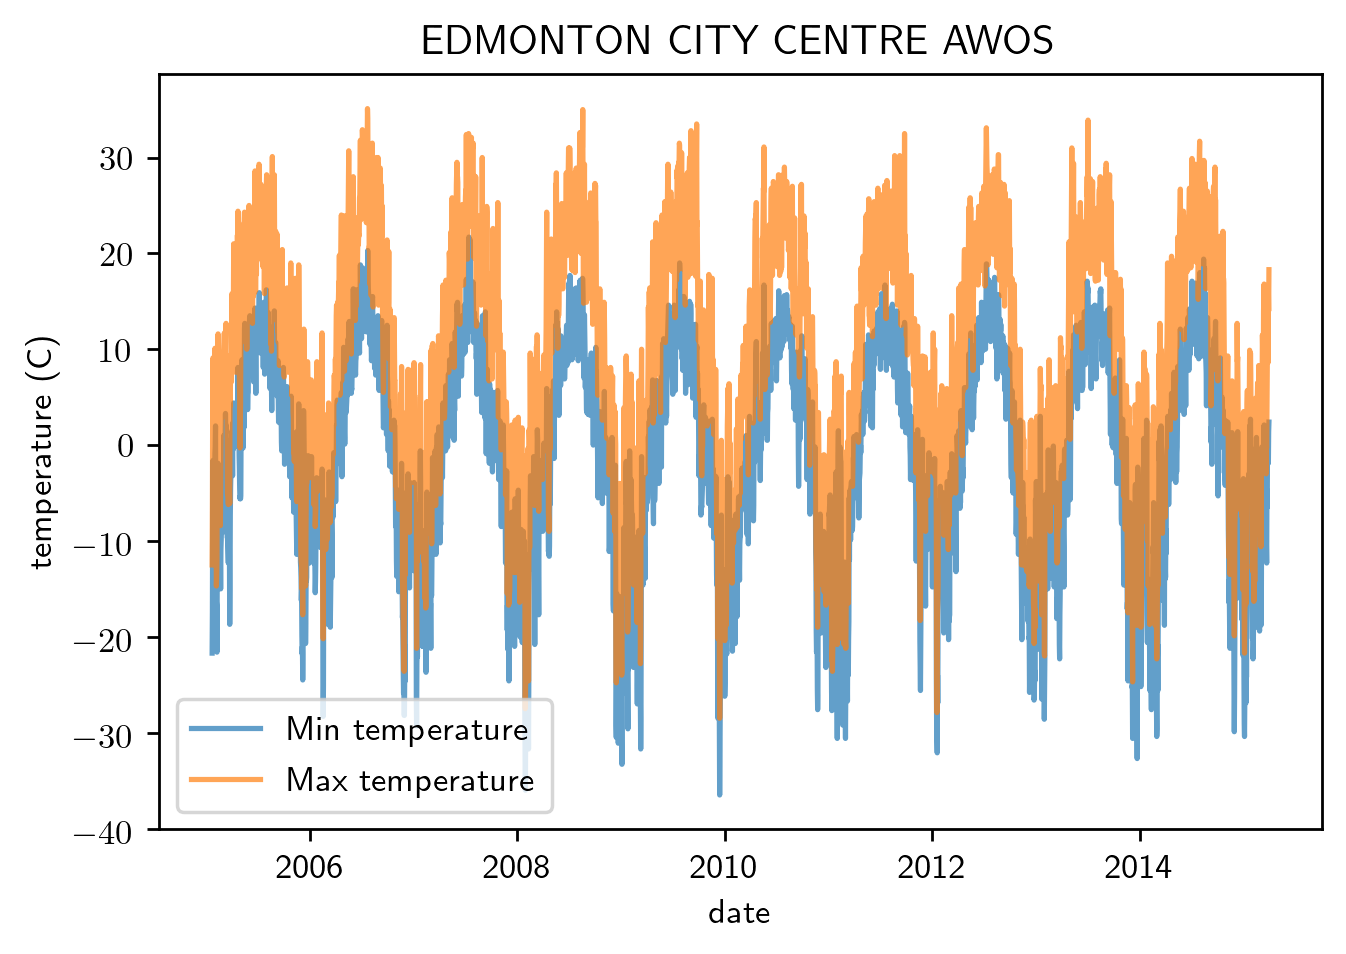

In [141]:
# Solution to Question 1.

# Imports
import matplotlib as mpl 
mpl.rc('figure',dpi=250)
mpl.rc('text',usetex=True)

import matplotlib.pyplot as plt
import numpy as np

def plot_min_max_temperature(station):
    plt.figure()
    plt.plot(station.dates,station.minT, label="Min temperature",alpha=0.7) #Plot the min temperature
    plt.plot(station.dates,station.maxT, label='Max temperature',alpha=0.7) #Plot the max temperature
    plt.title(station.name) #Title
    plt.xlabel('date') #Xlabel
    plt.ylabel('temperature (C)') #Ylabel
    plt.legend() #Legend

plot_min_max_temperature(s[1])

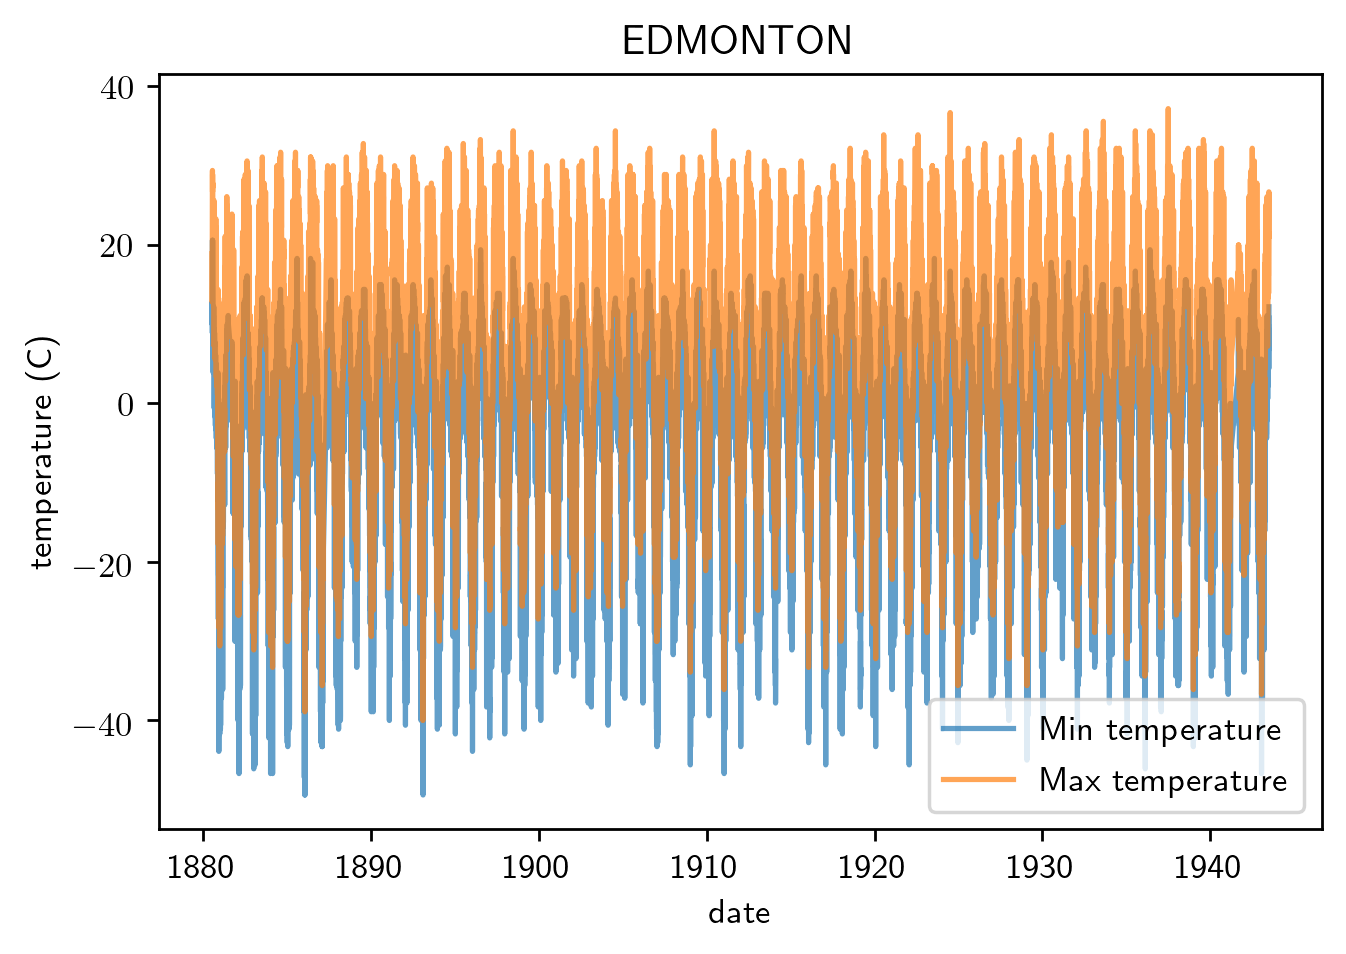

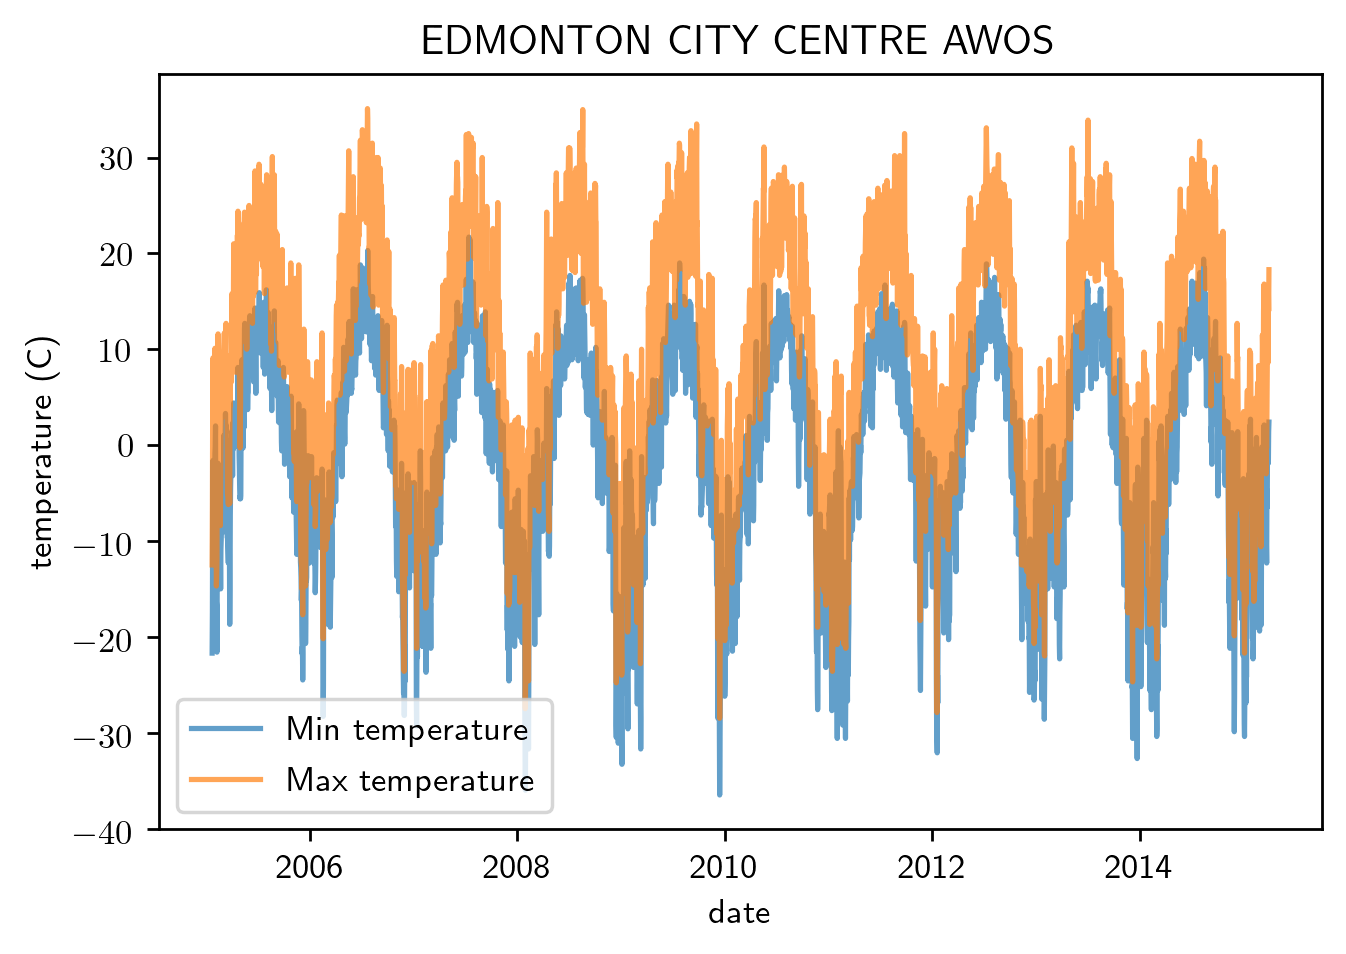

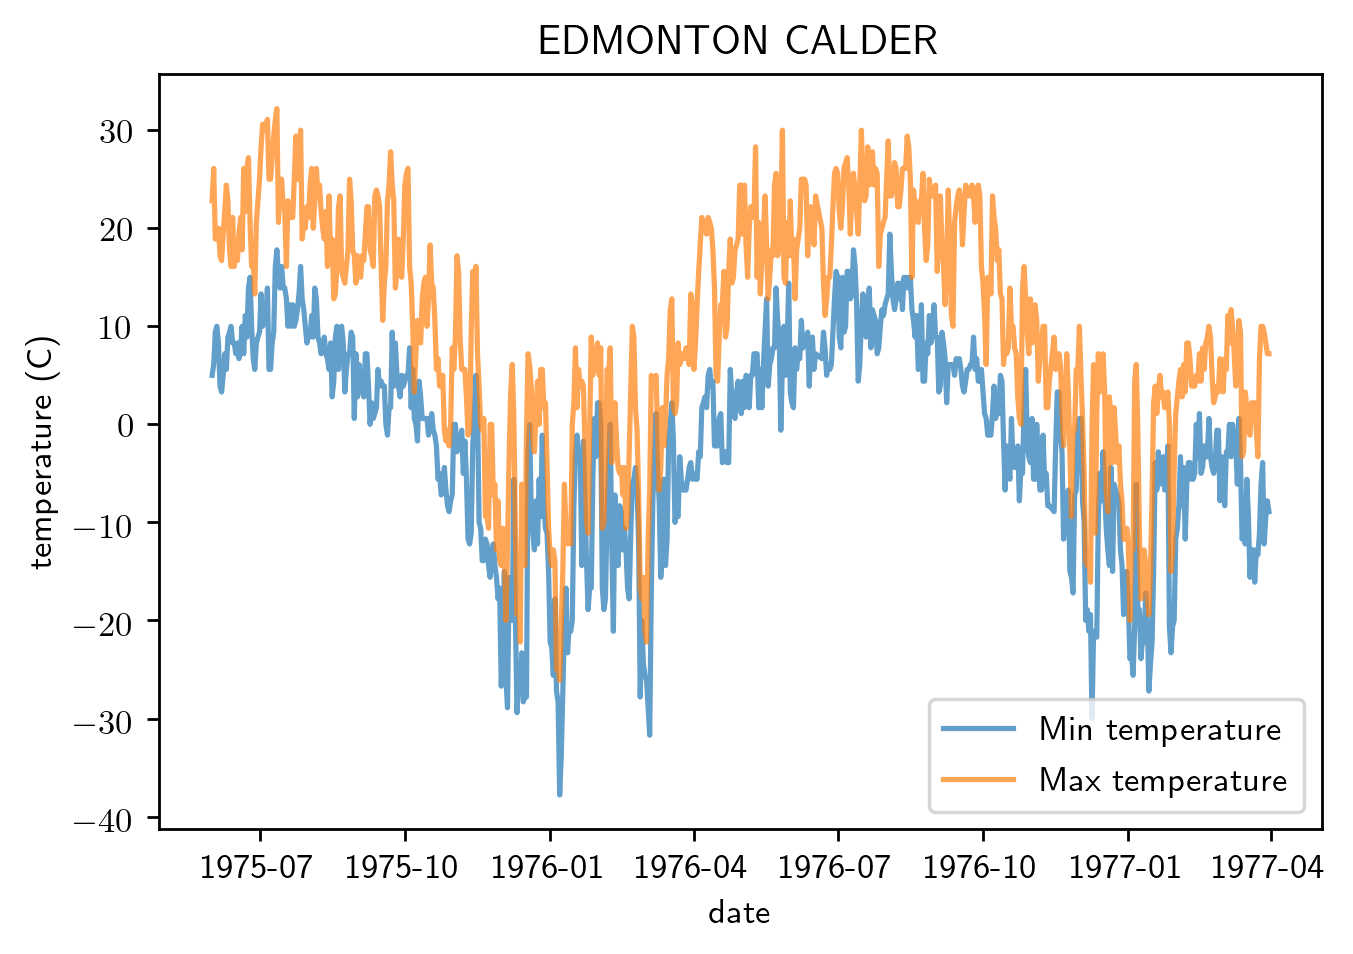

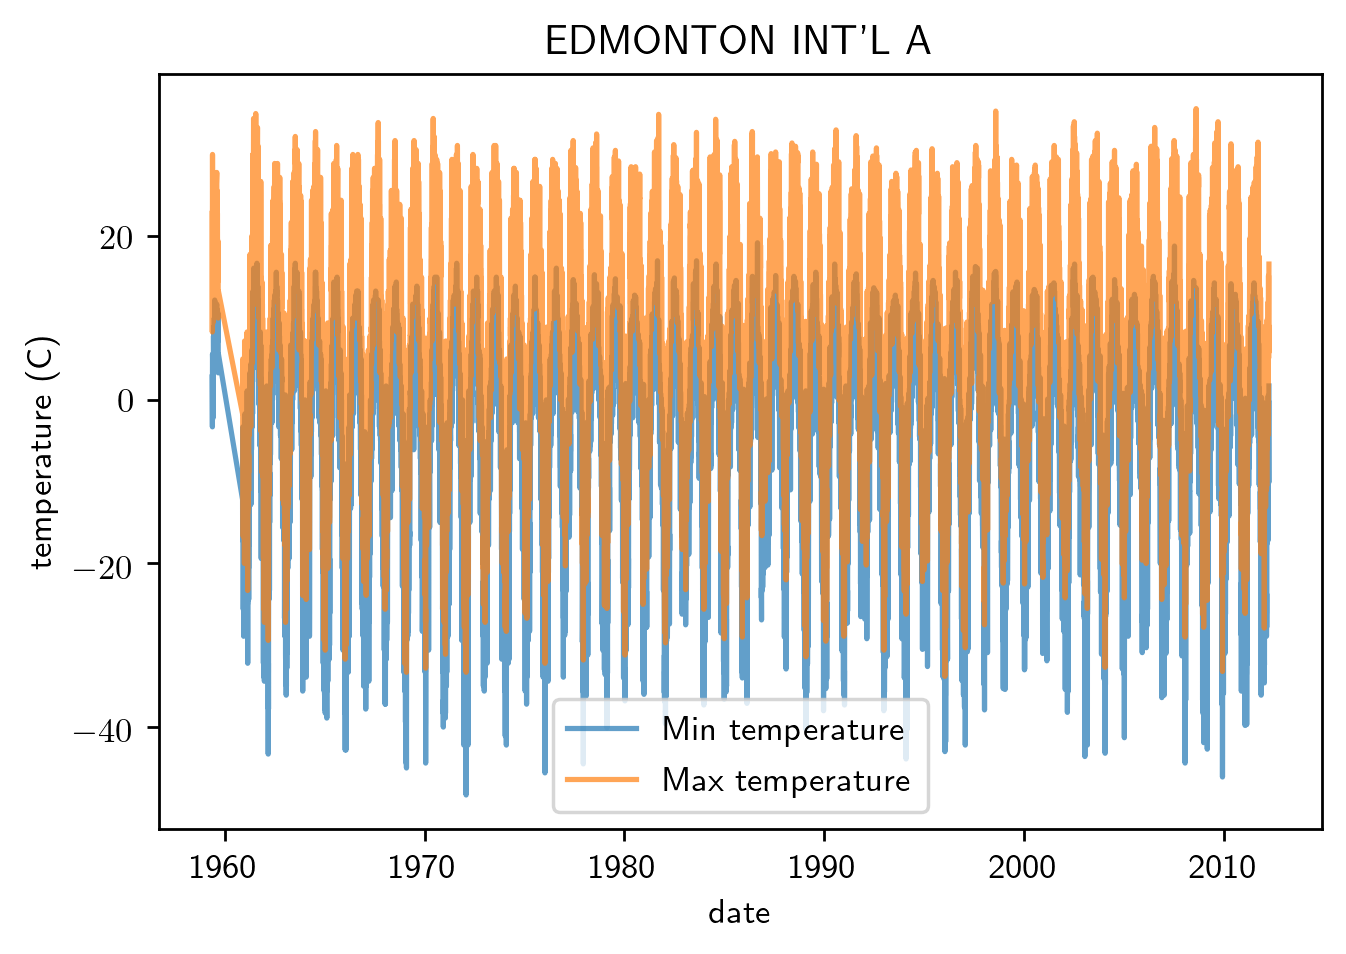

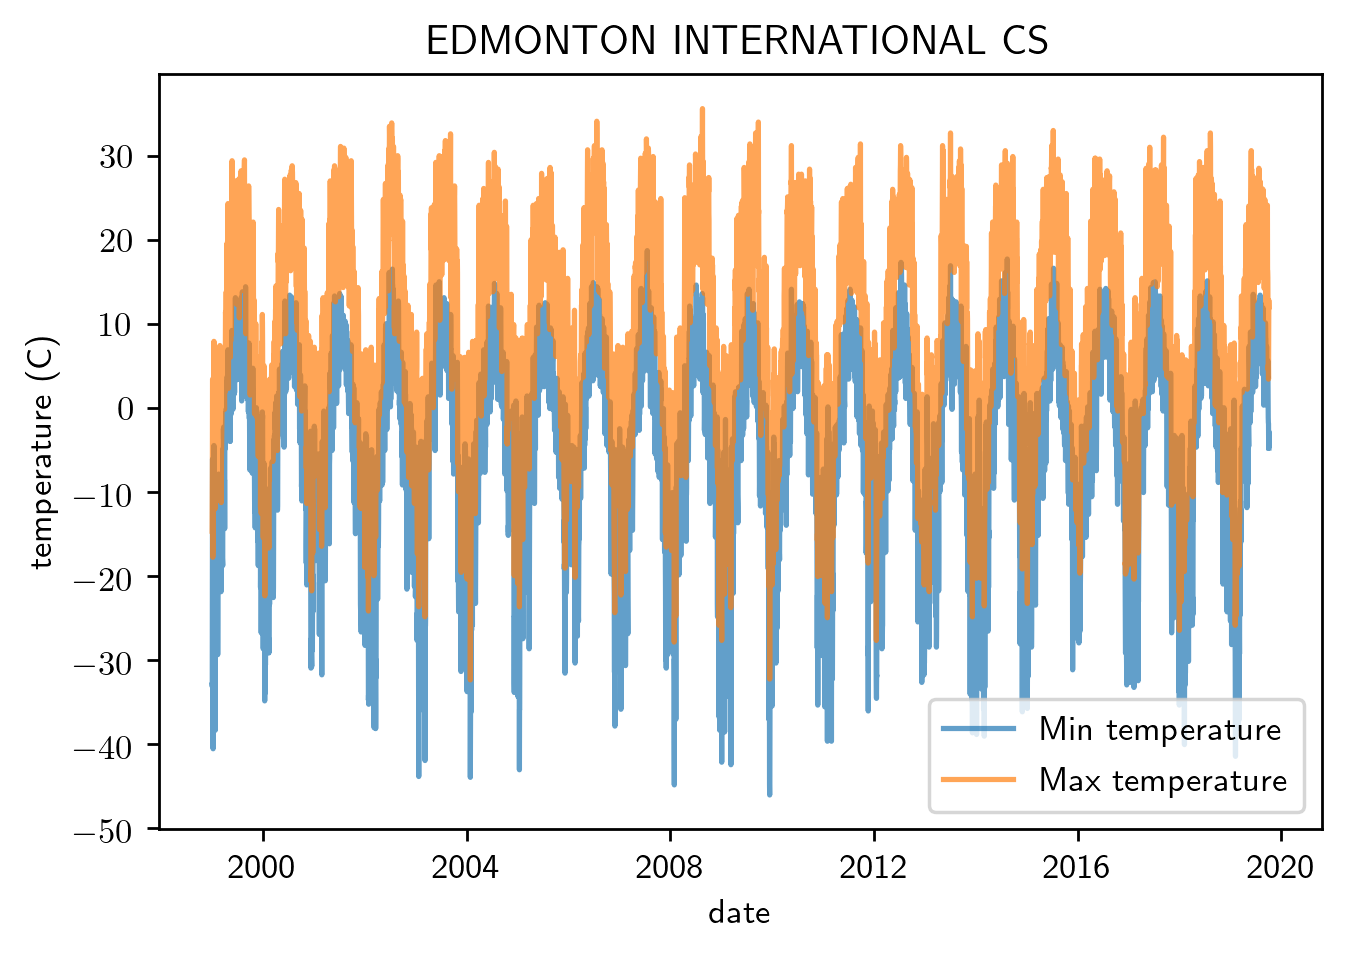

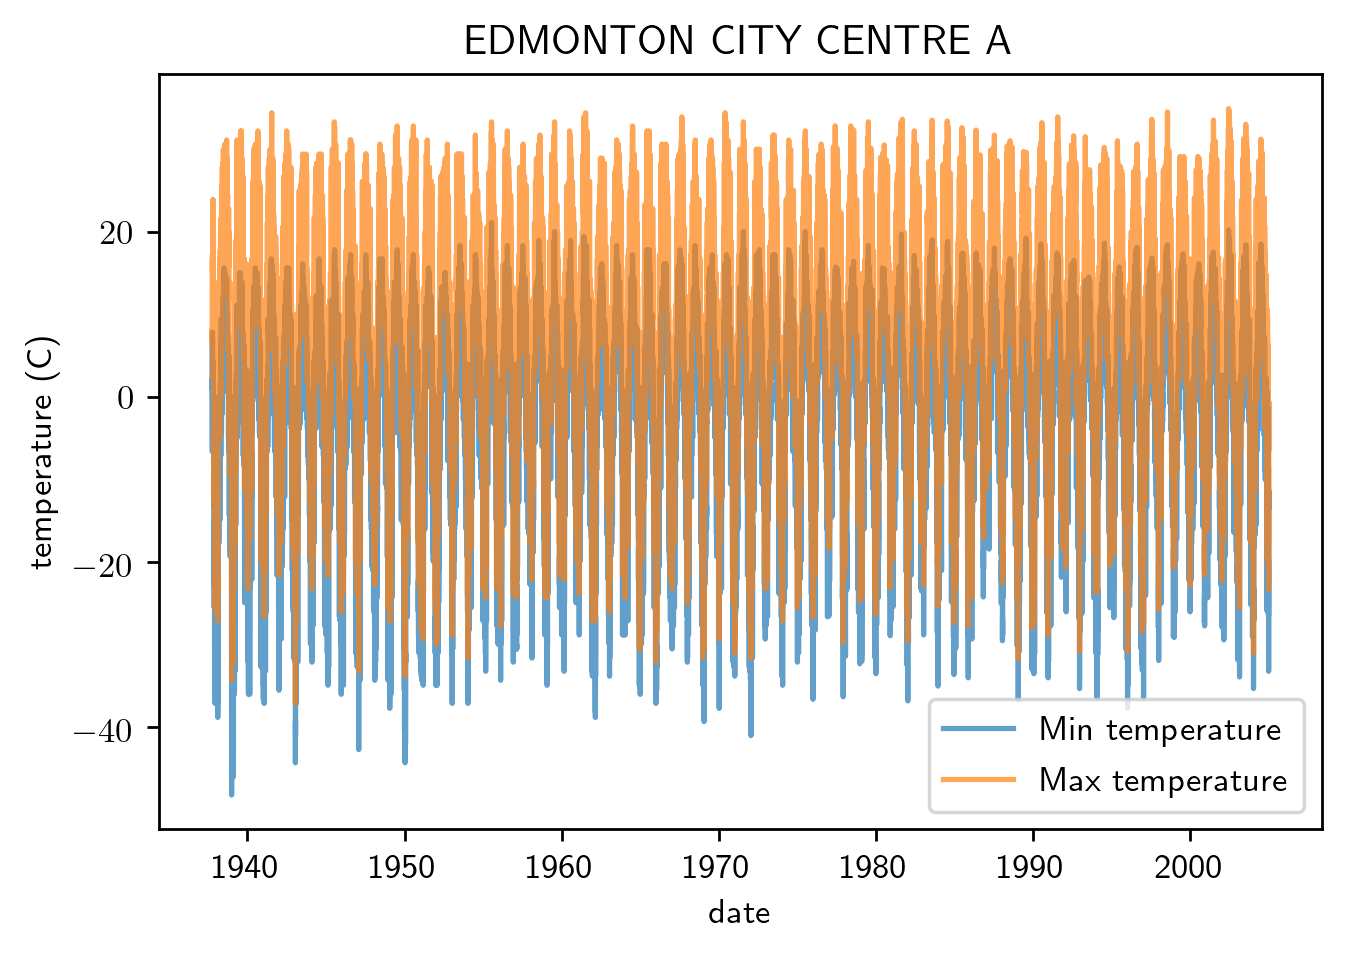

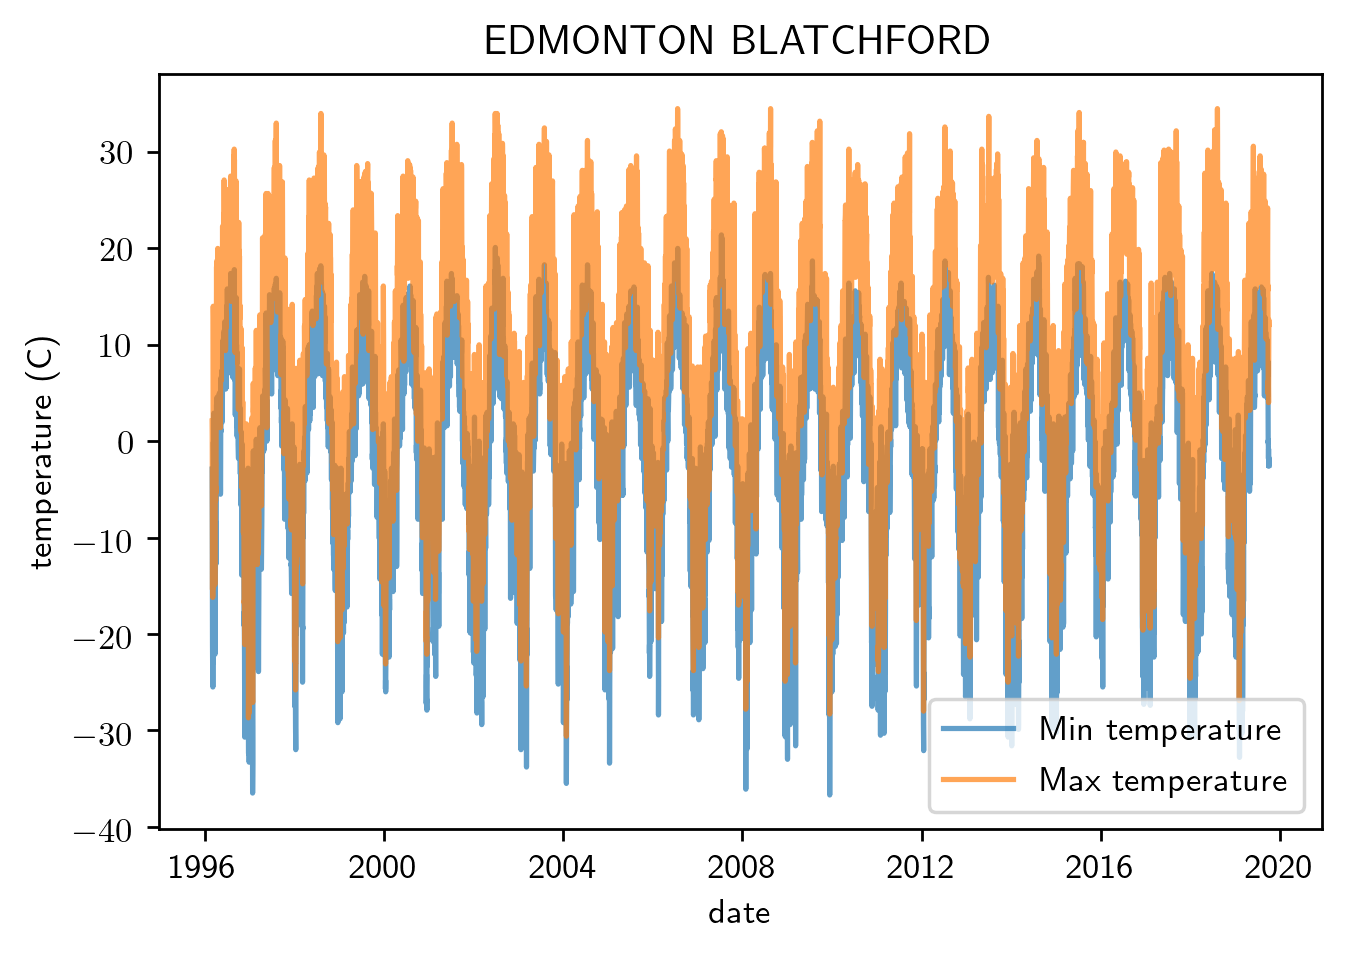

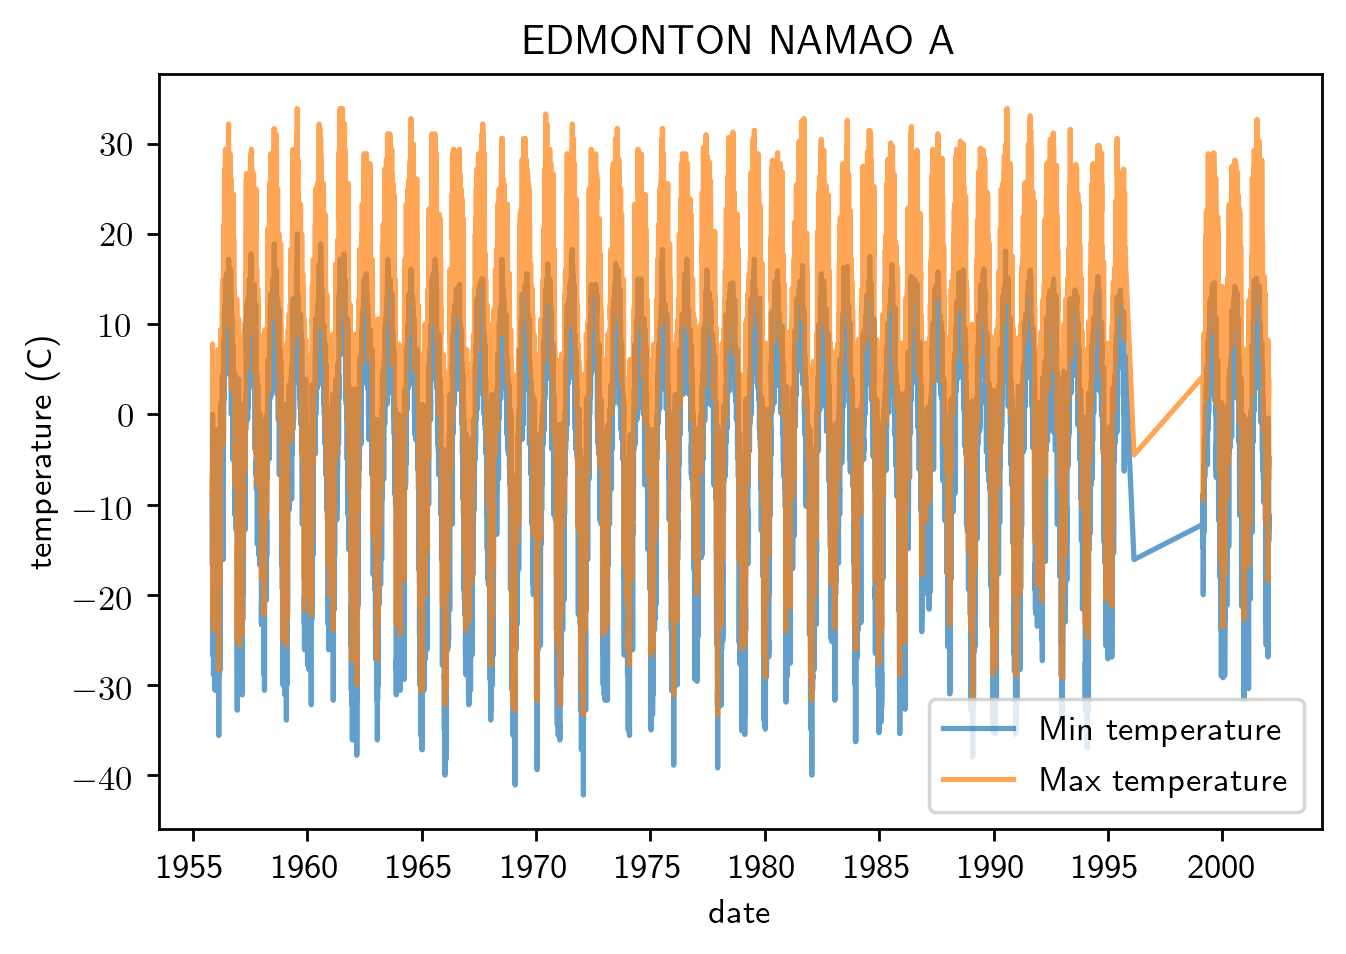

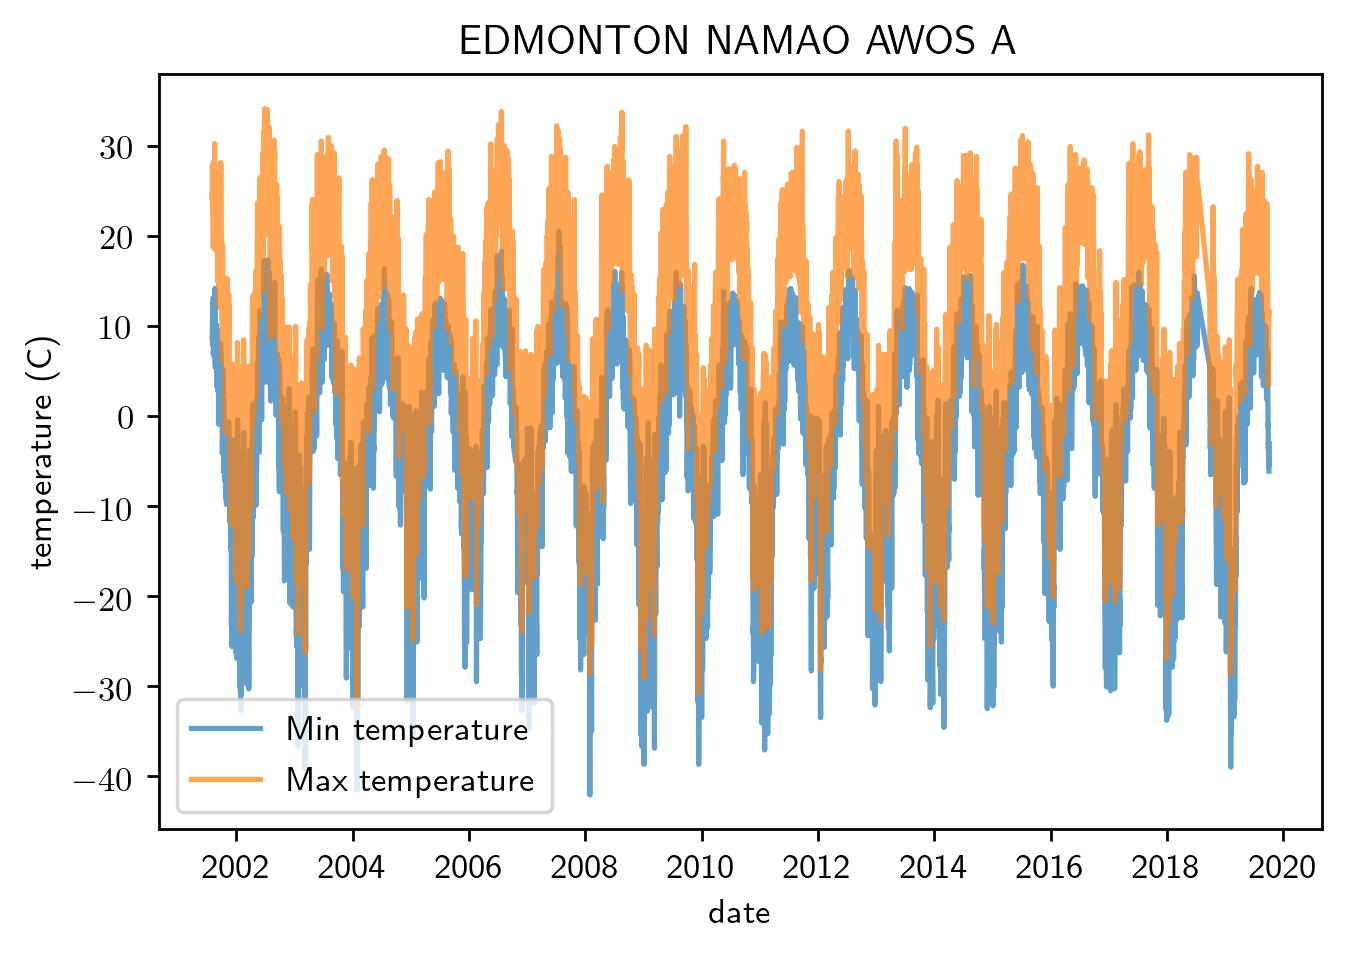

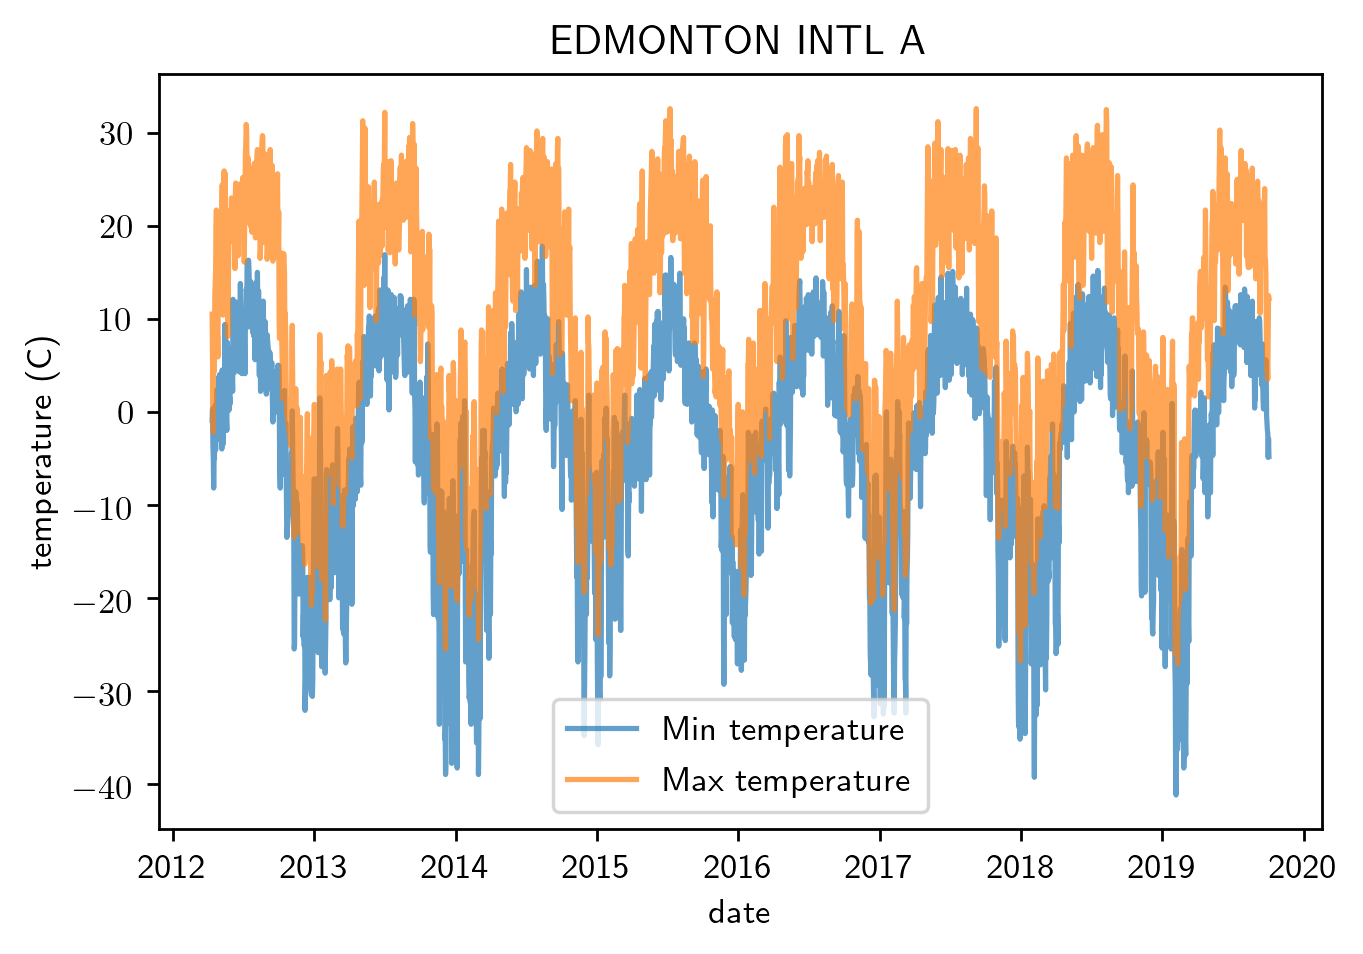

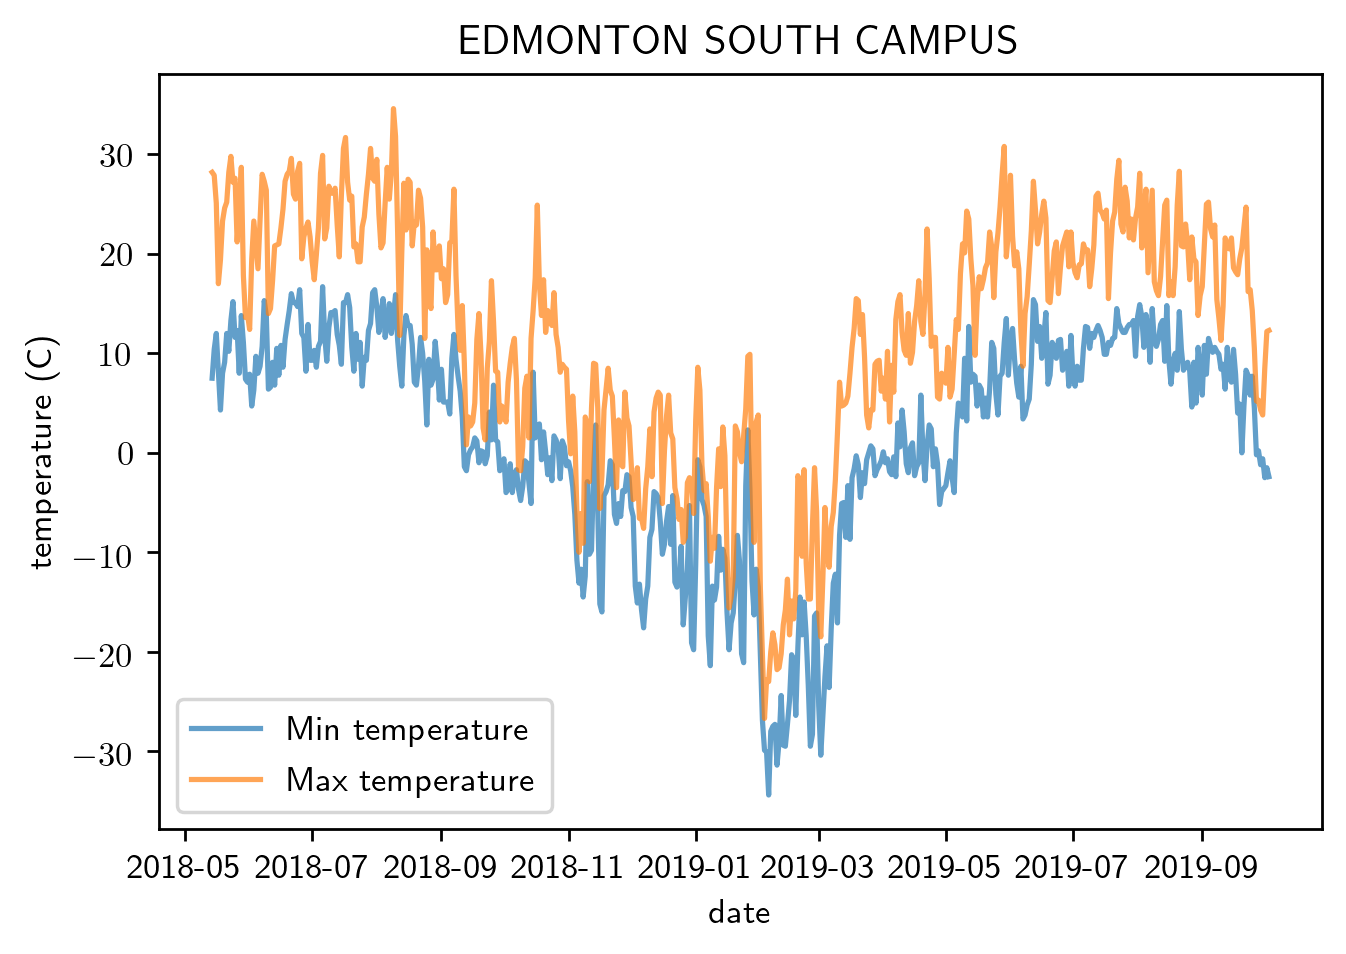

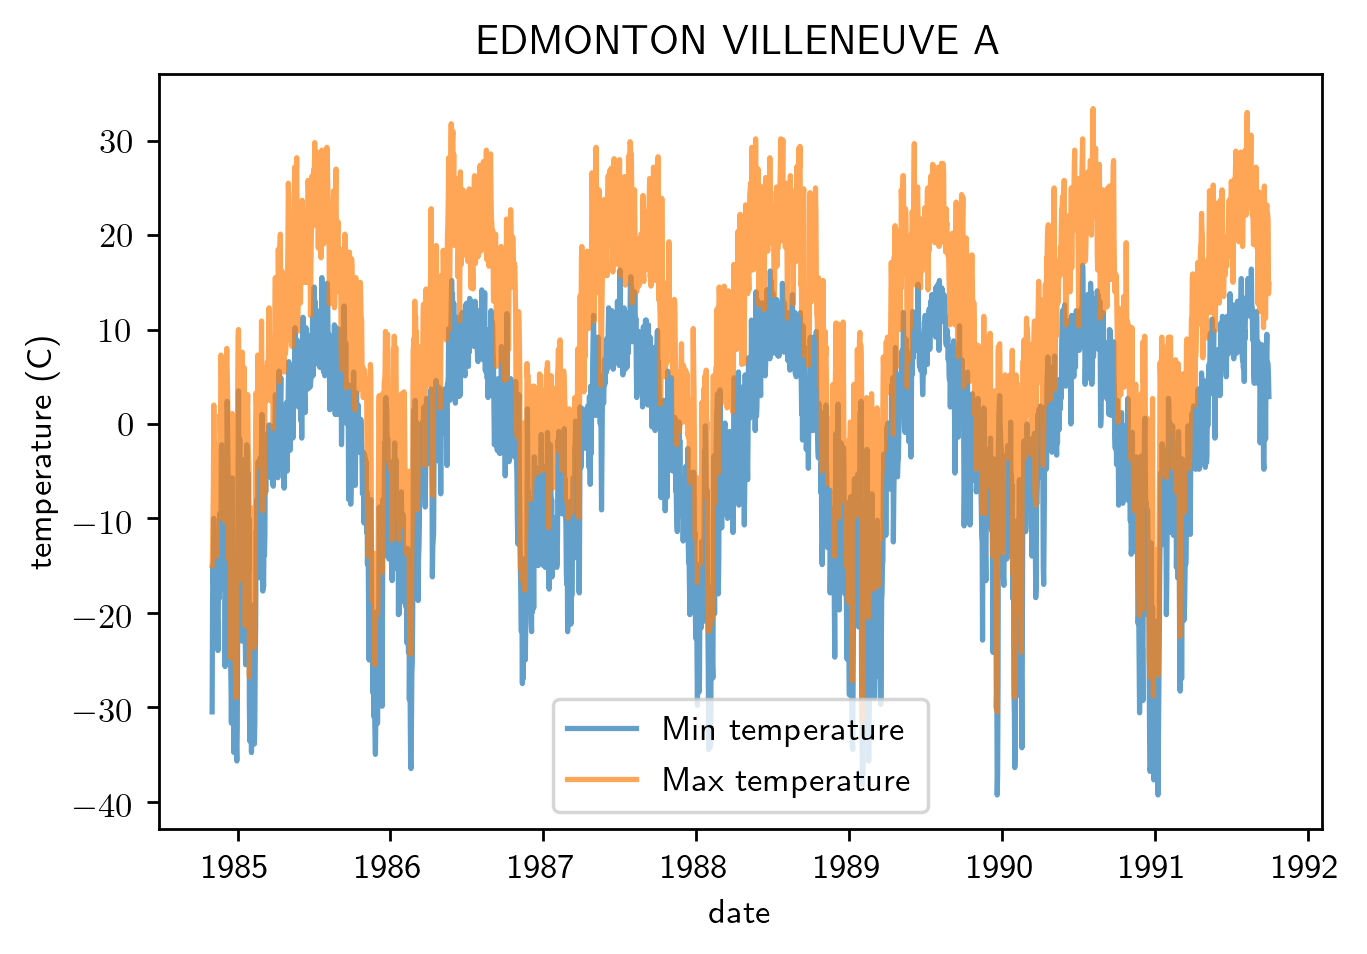

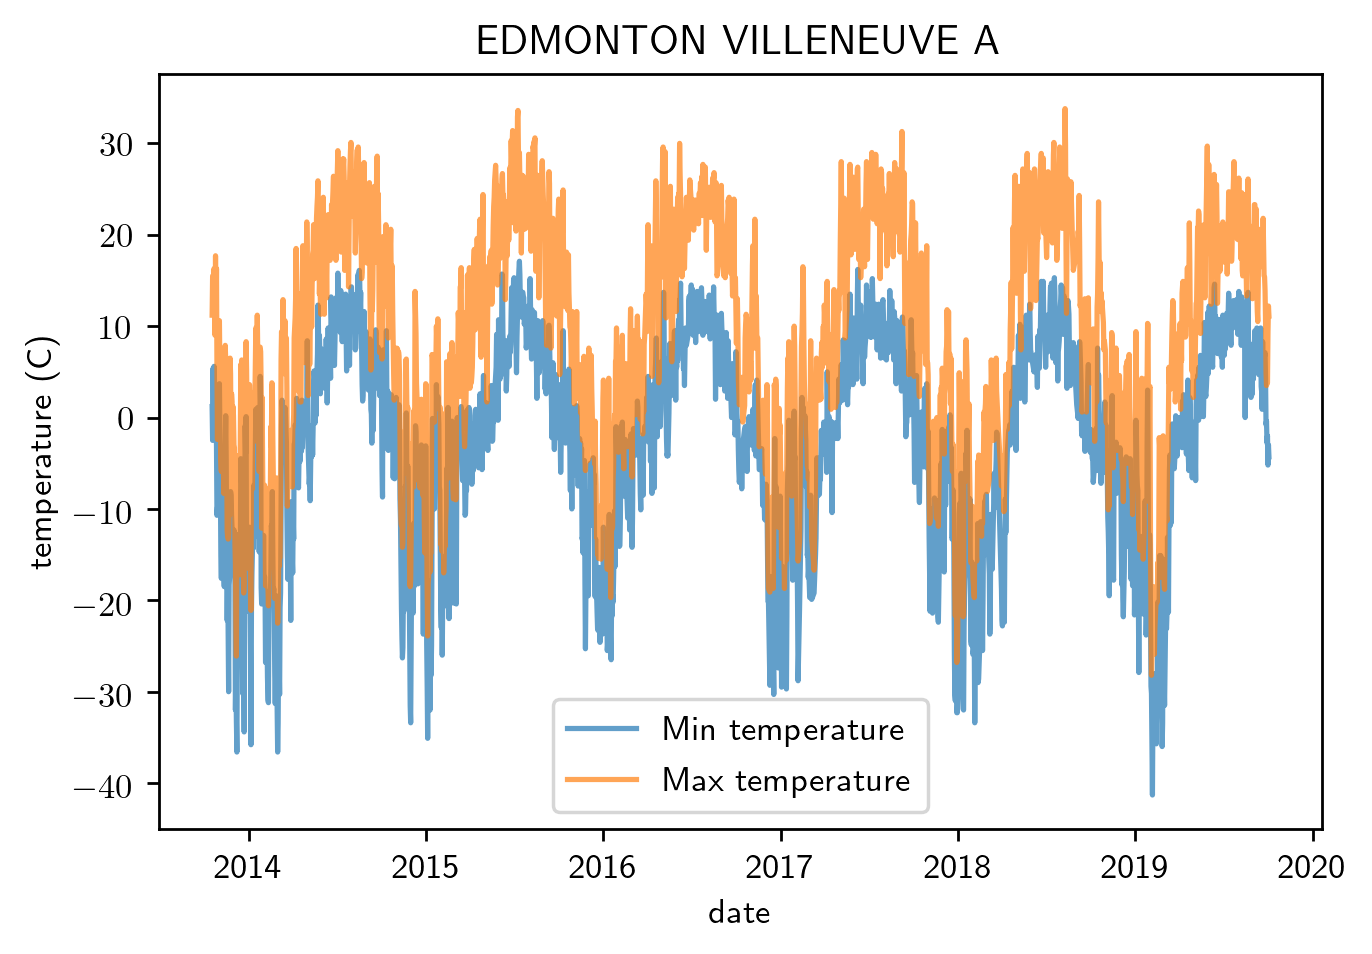

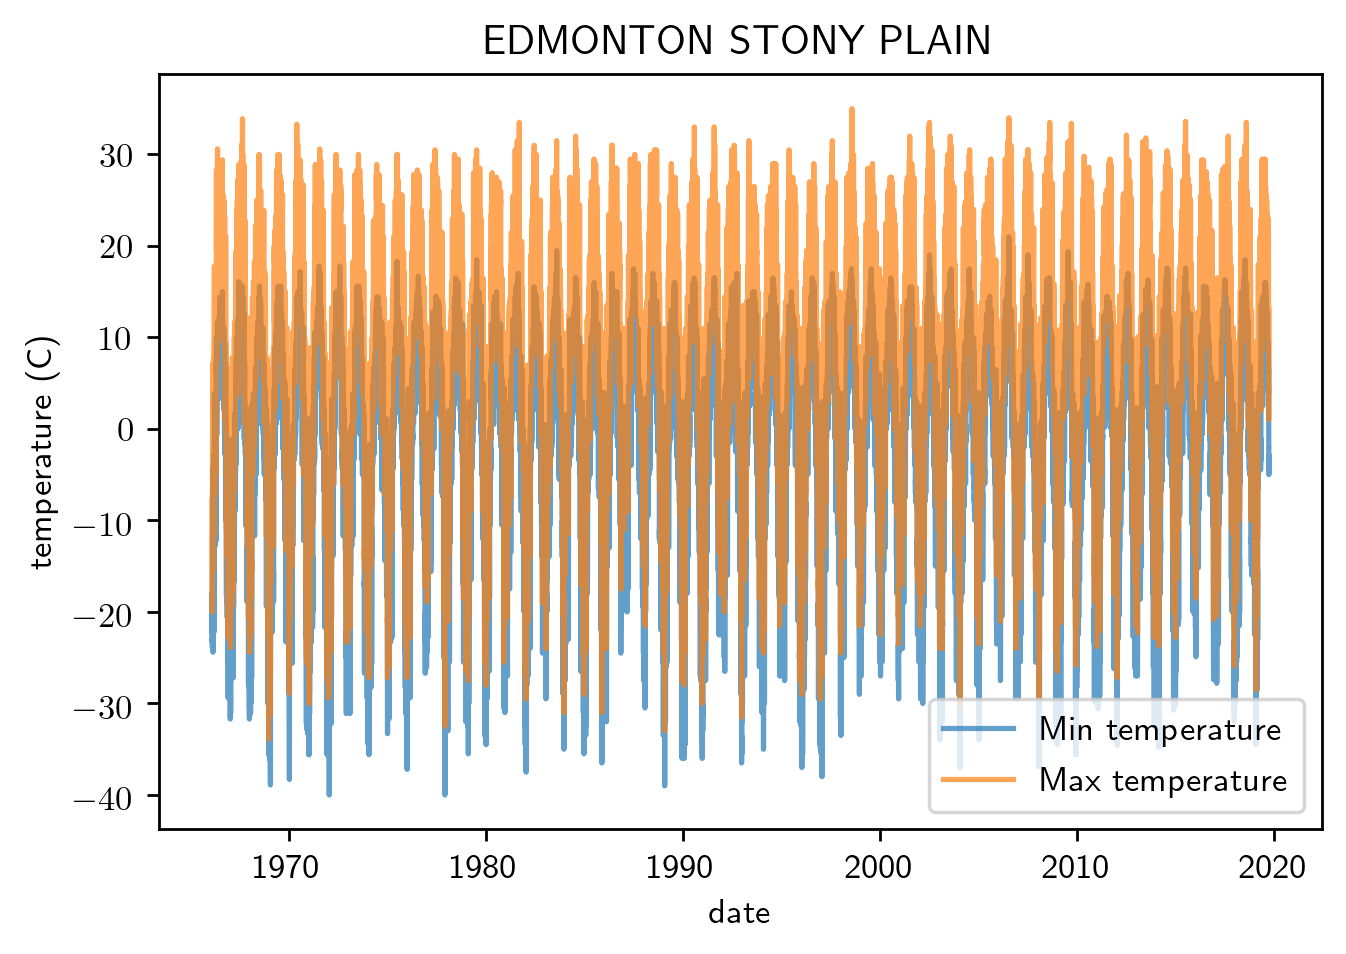

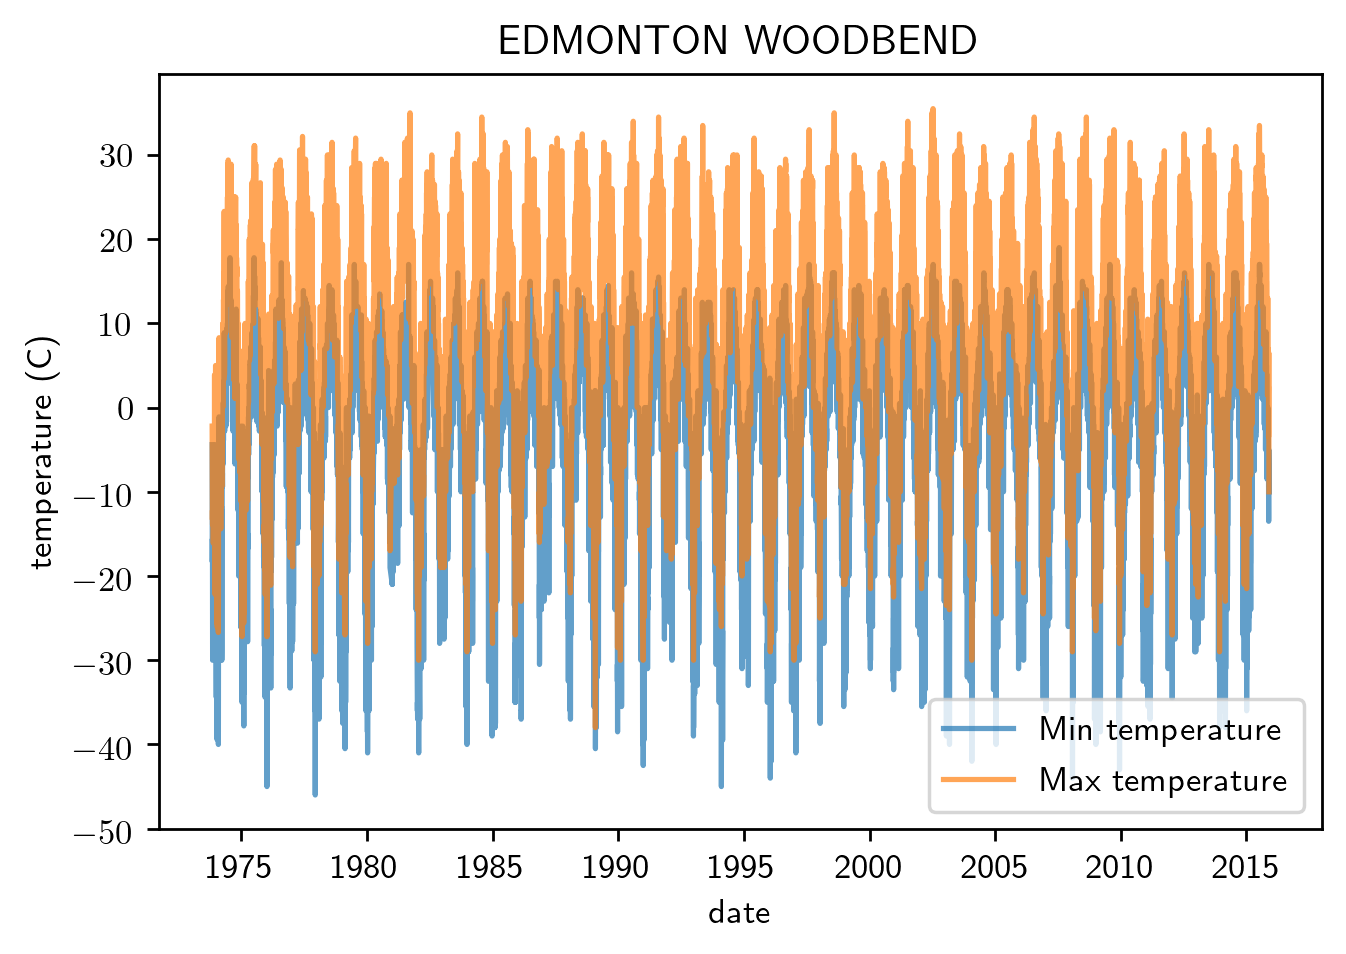

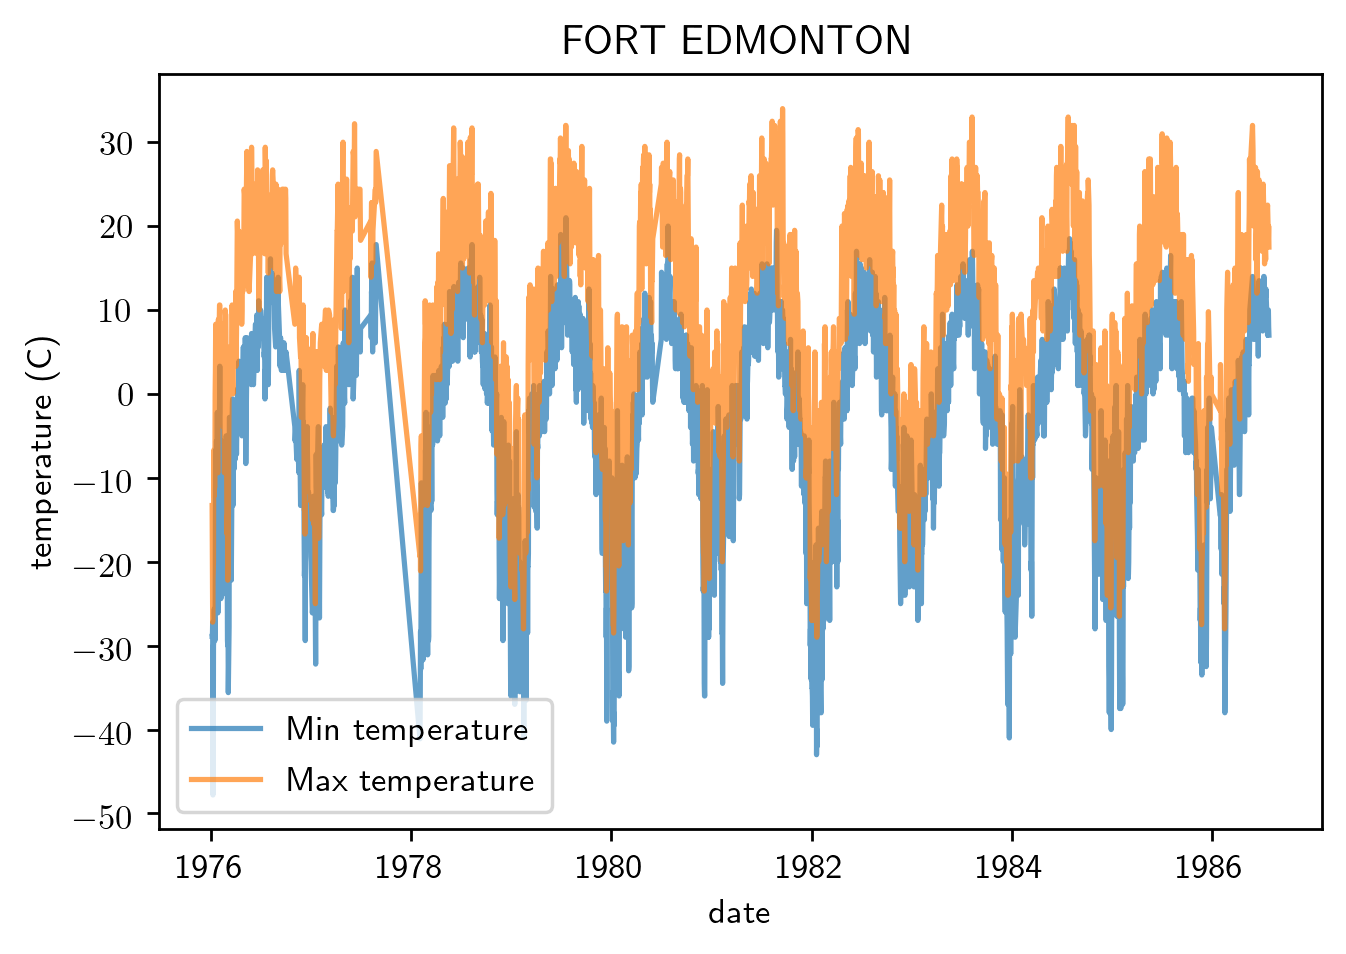

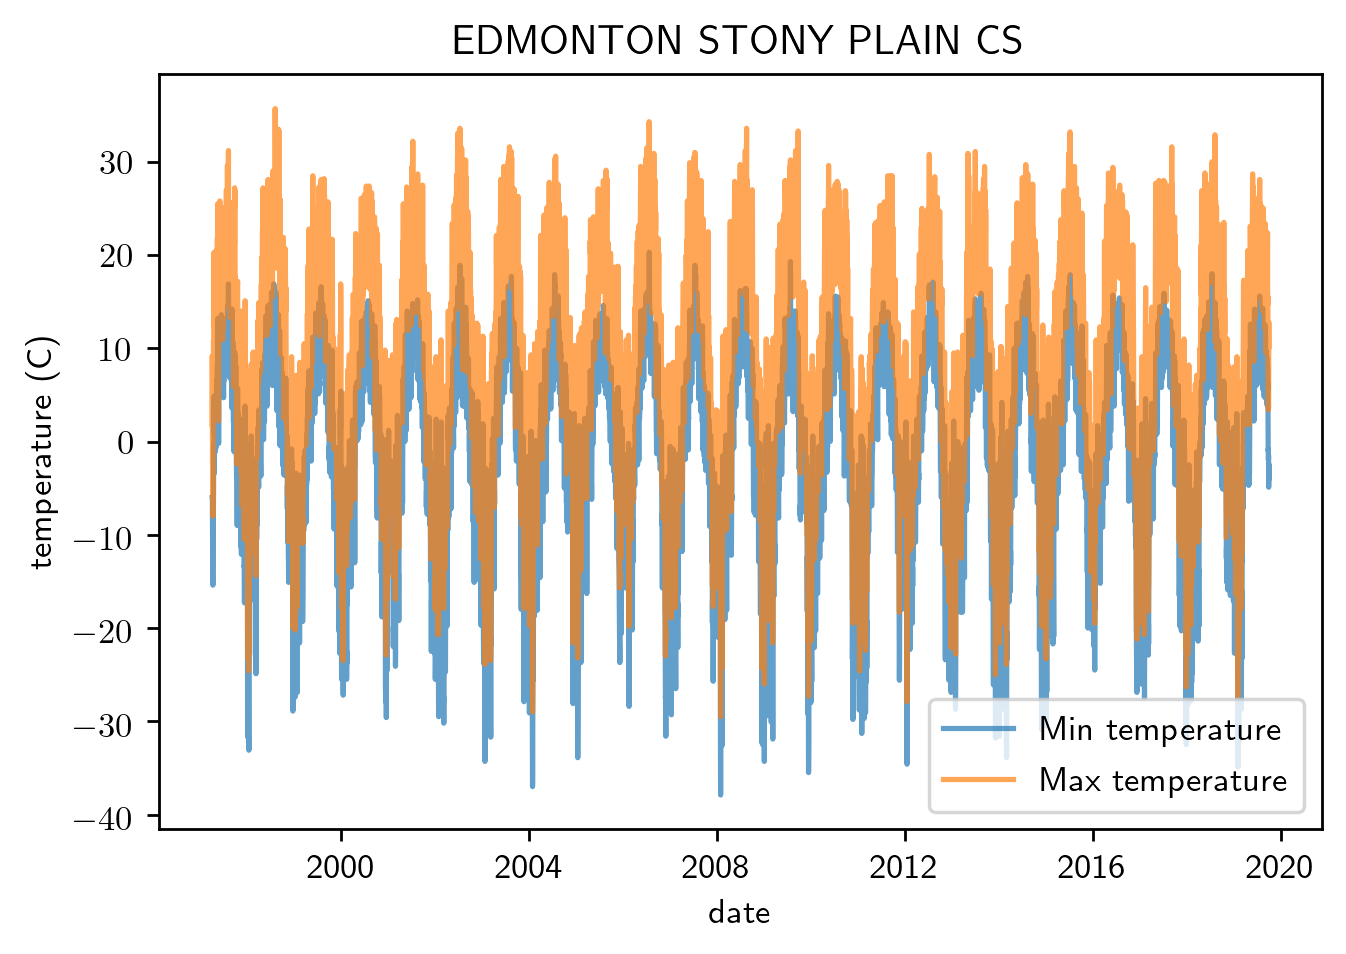

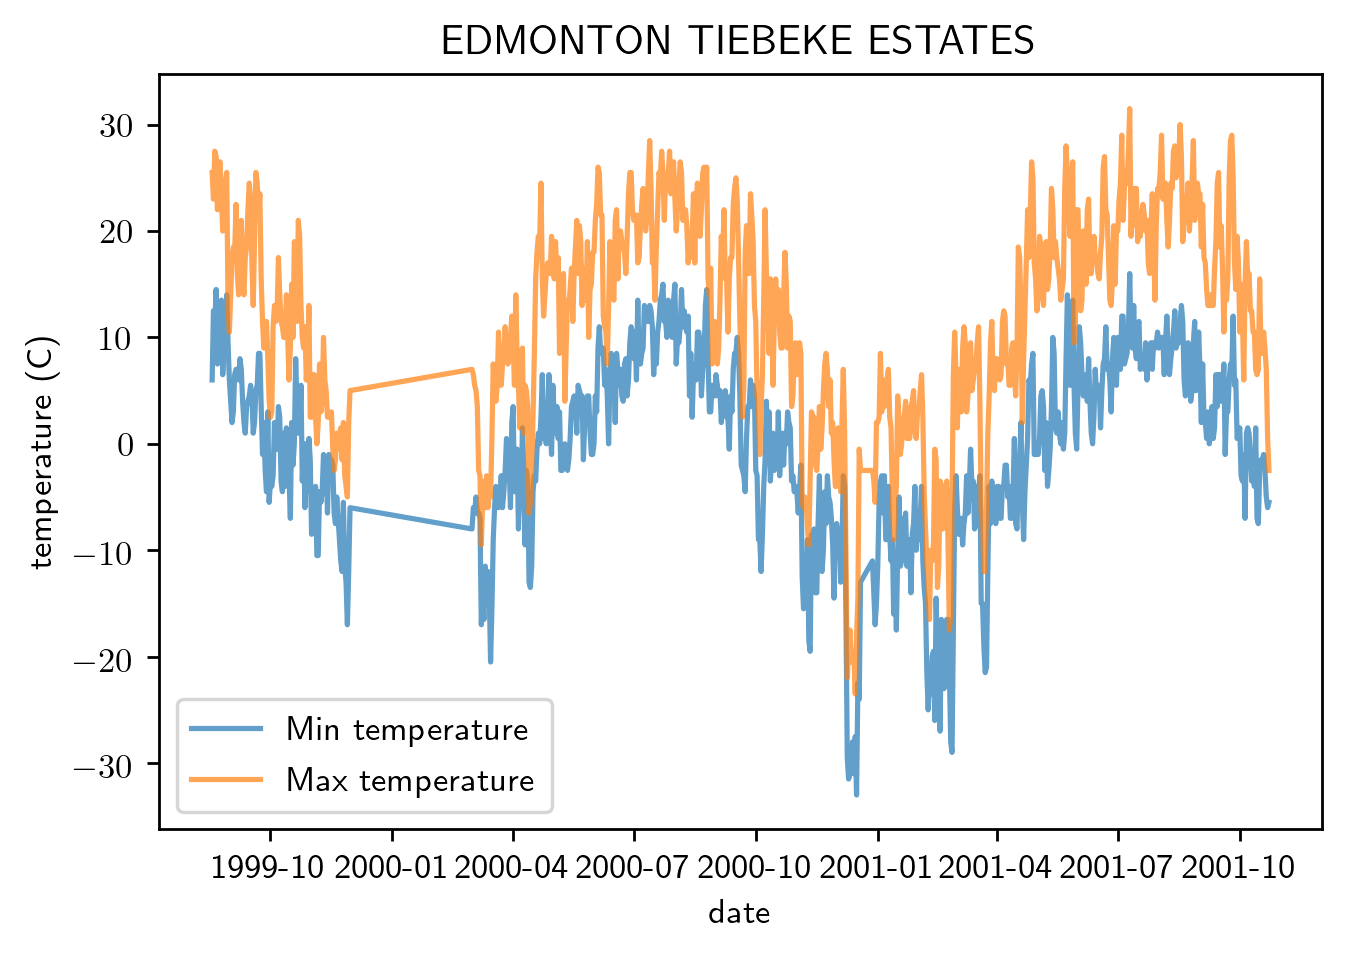

In [142]:
#In the following code, we generate over all stations. 
for stations in s:
    plot_min_max_temperature(stations)

2.  Histogram the max and min temperatures for a single station at a few dates throughout the year. Make sure the histograms have a reasonable number and range for the bins.  

In [143]:
# Solution to Question 2. 

import pandas as pd # Import

def make_dataFrame(station, index=True):
    '''
    This function converts a stations object to a pandas dataframe.
    '''
    df = pd.DataFrame([]) #Construct a pandas dataframe   
    df['minT_'+station.name] = pd.Series(station.minT) #Put the min temperature into a column 
    df['maxT_'+station.name] = pd.Series(station.maxT) #Put the max temperature into a column
    df['dates_'+station.name] = pd.Series(station.dates, dtype='datetime64[ns]') # Put the dates as the index
    df = df.set_index('dates_'+station.name)
    return df

df = make_dataFrame(s[1])
df

minT_EDMONTON CITY CENTRE AWOS  \
dates_EDMONTON CITY CENTRE AWOS                                   
2005-01-21                                                -21.7   
2005-01-22                                                -17.3   
2005-01-23                                                 -6.6   
2005-01-24                                                 -1.6   
2005-01-25                                                 -7.3   
...                                                         ...   
2015-03-27                                                 -0.9   
2015-03-28                                                  1.1   
2015-03-29                                                 -1.9   
2015-03-30                                                  1.4   
2015-03-31                                                  2.4   

                                 maxT_EDMONTON CITY CENTRE AWOS  
dates_EDMONTON CITY CENTRE AWOS                                  
2005-01-21                                                -12.5  
2005-01-22                                                 -6.1  
2005-01-23                                                  4.4  
2005-01-24                                                  9.1  
2005-01-25                                                  6.3  
...                                                         ...  
2015-03-27                                                 15.7  
2015-03-28                                                  8.6  
2015-03-29                                                 16.0  
2015-03-30                                                 14.0  
2015-03-31                                                 18.3  

[3690 rows x 2 columns]

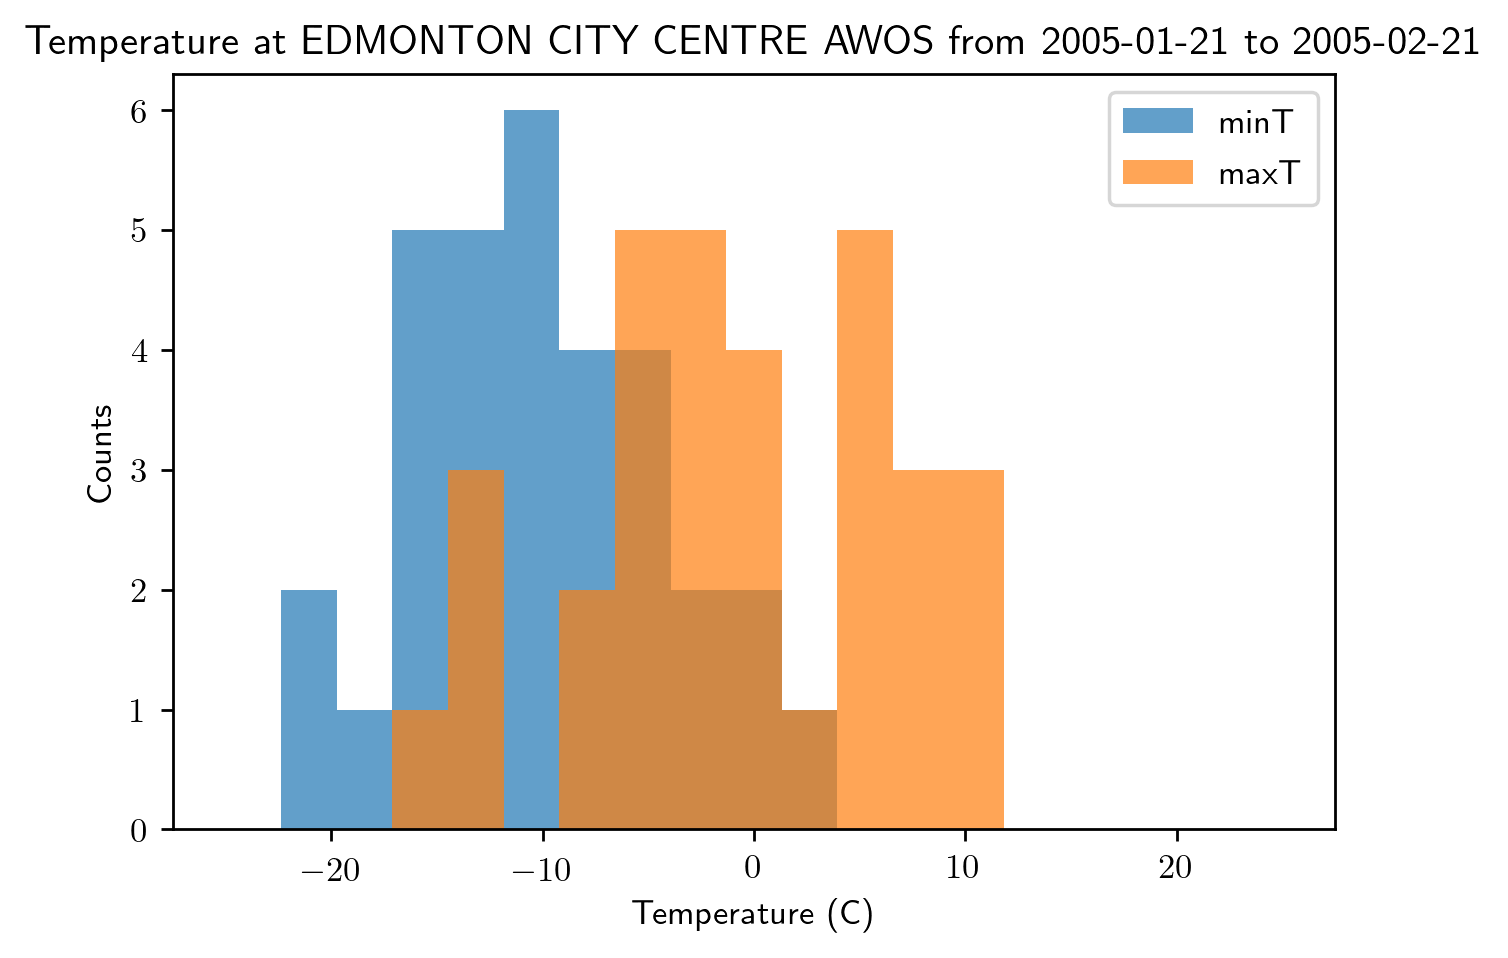

In [144]:
# Solution to Question 2 continued.

def plot_histogram(station):
    df = make_dataFrame(station) #Convert a station into a dataframe.
    df_2005_2006 = df['2005-01-21':'2005-02-21'] #Our few dates will one month
    
    bins = np.linspace(-25,25,num=20) # Bins
    
    plt.figure()
    plt.title('Temperature at '+station.name+' from 2005-01-21 to 2005-02-21')
    plt.ylabel('Counts')
    plt.xlabel('Temperature (C)')
    plt.hist(df_2005_2006['minT_'+station.name],label='minT', alpha=0.7,bins=bins) #Plot the Minimum temperature
    plt.hist(df_2005_2006['maxT_'+station.name],label='maxT', alpha=0.7,bins=bins) #Plot the Maximum temperature
    plt.legend()
    
plot_histogram(s[1])

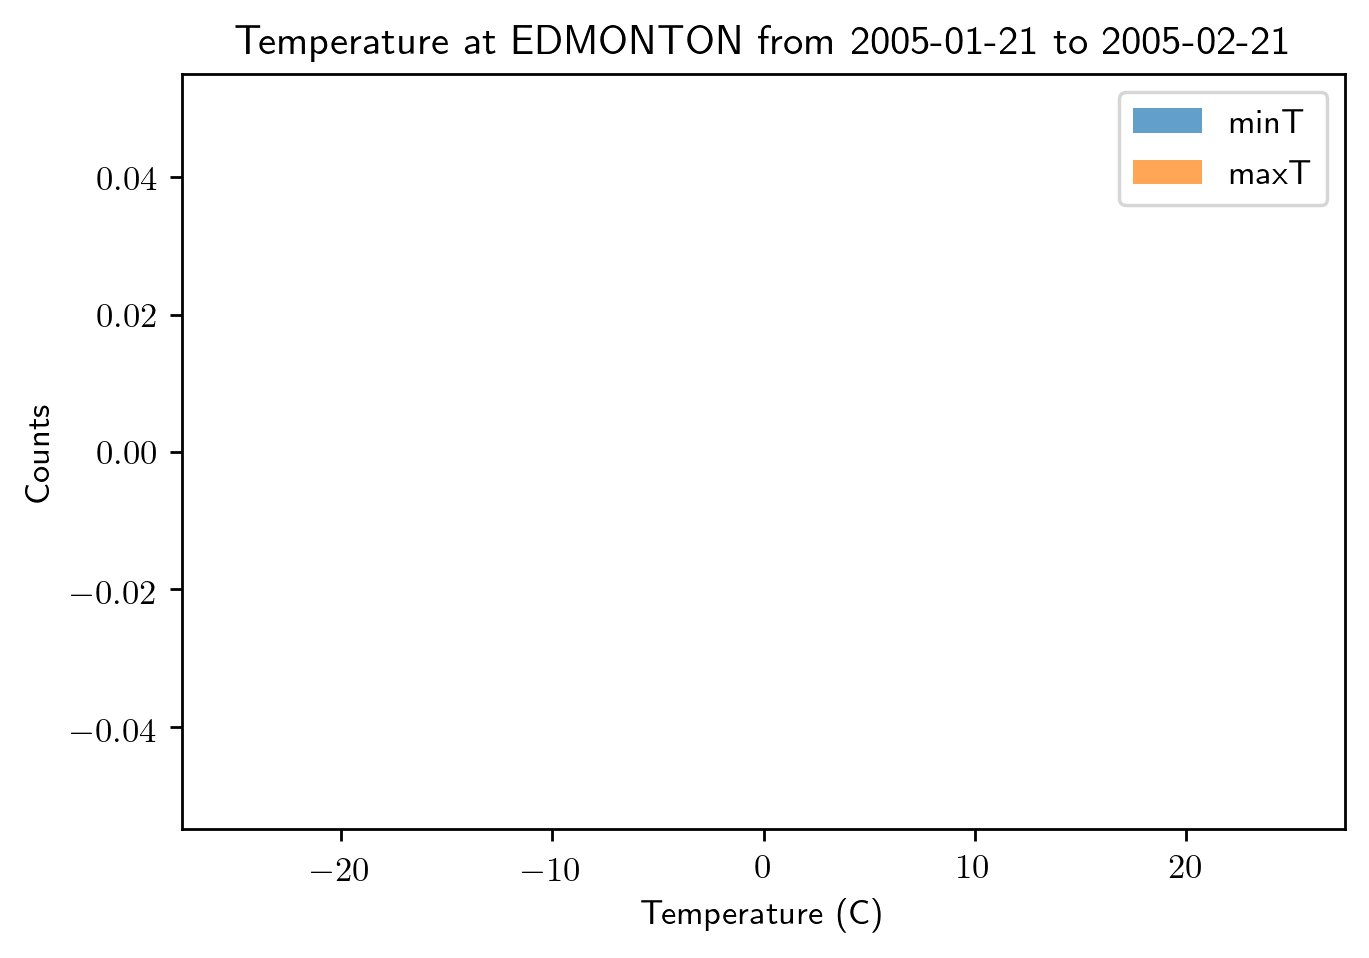

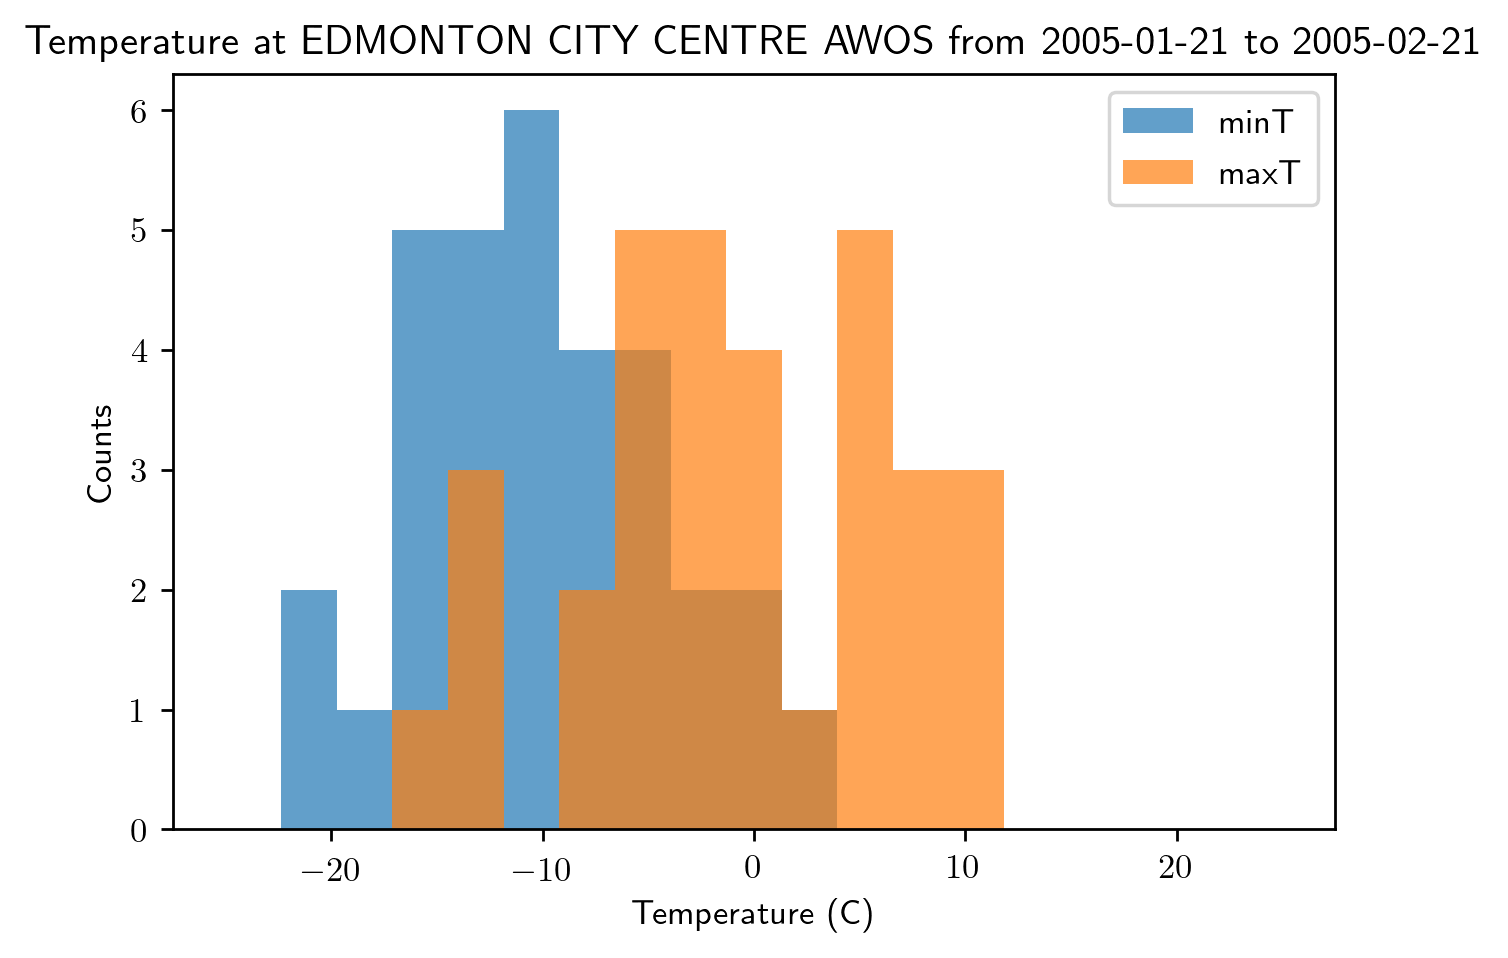

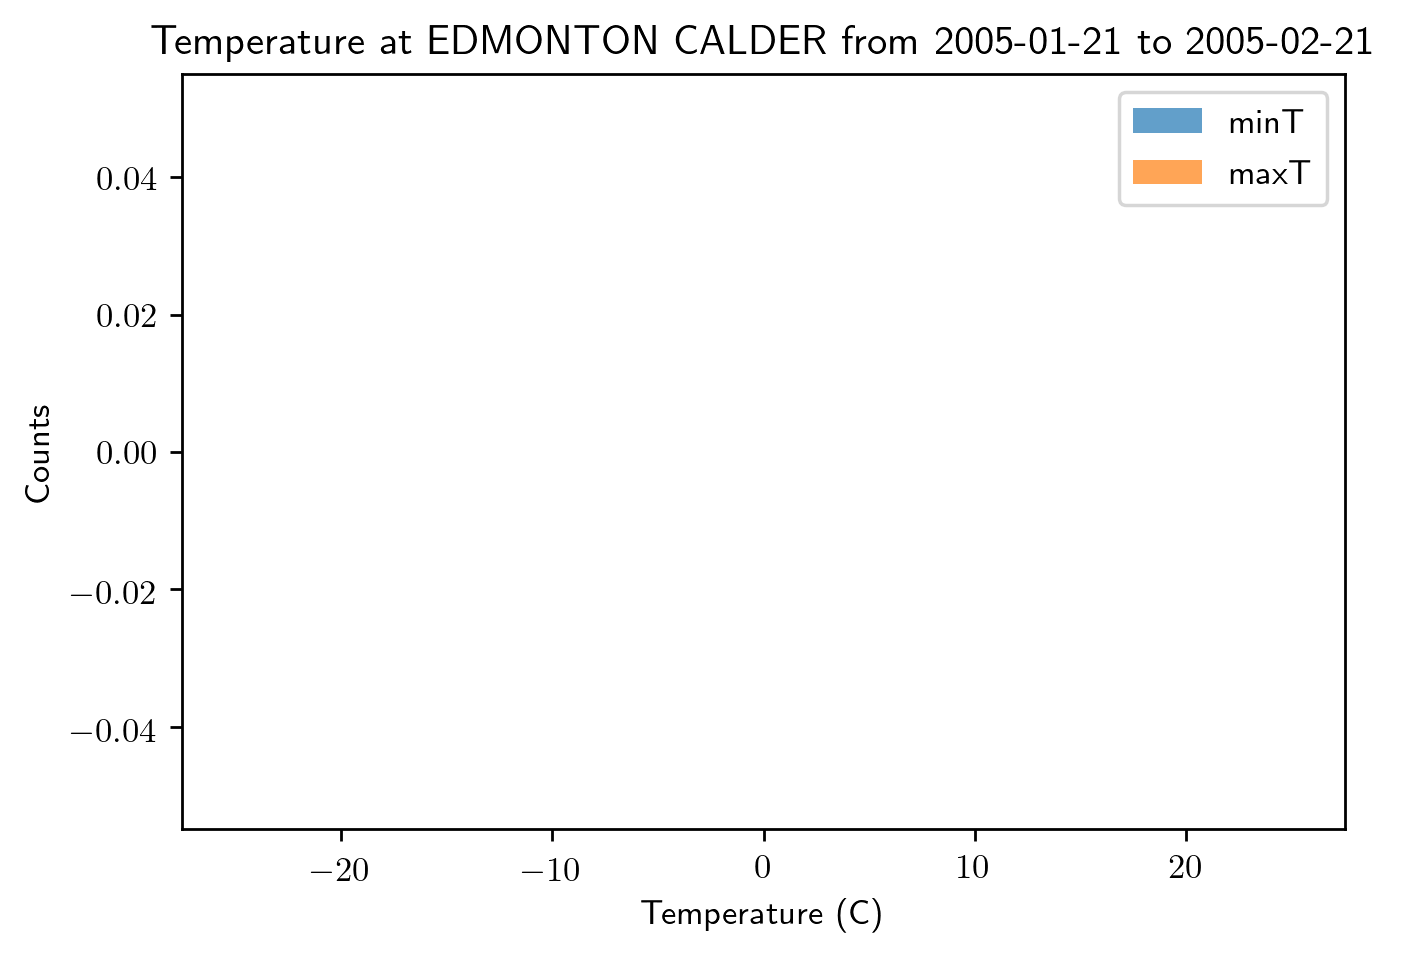

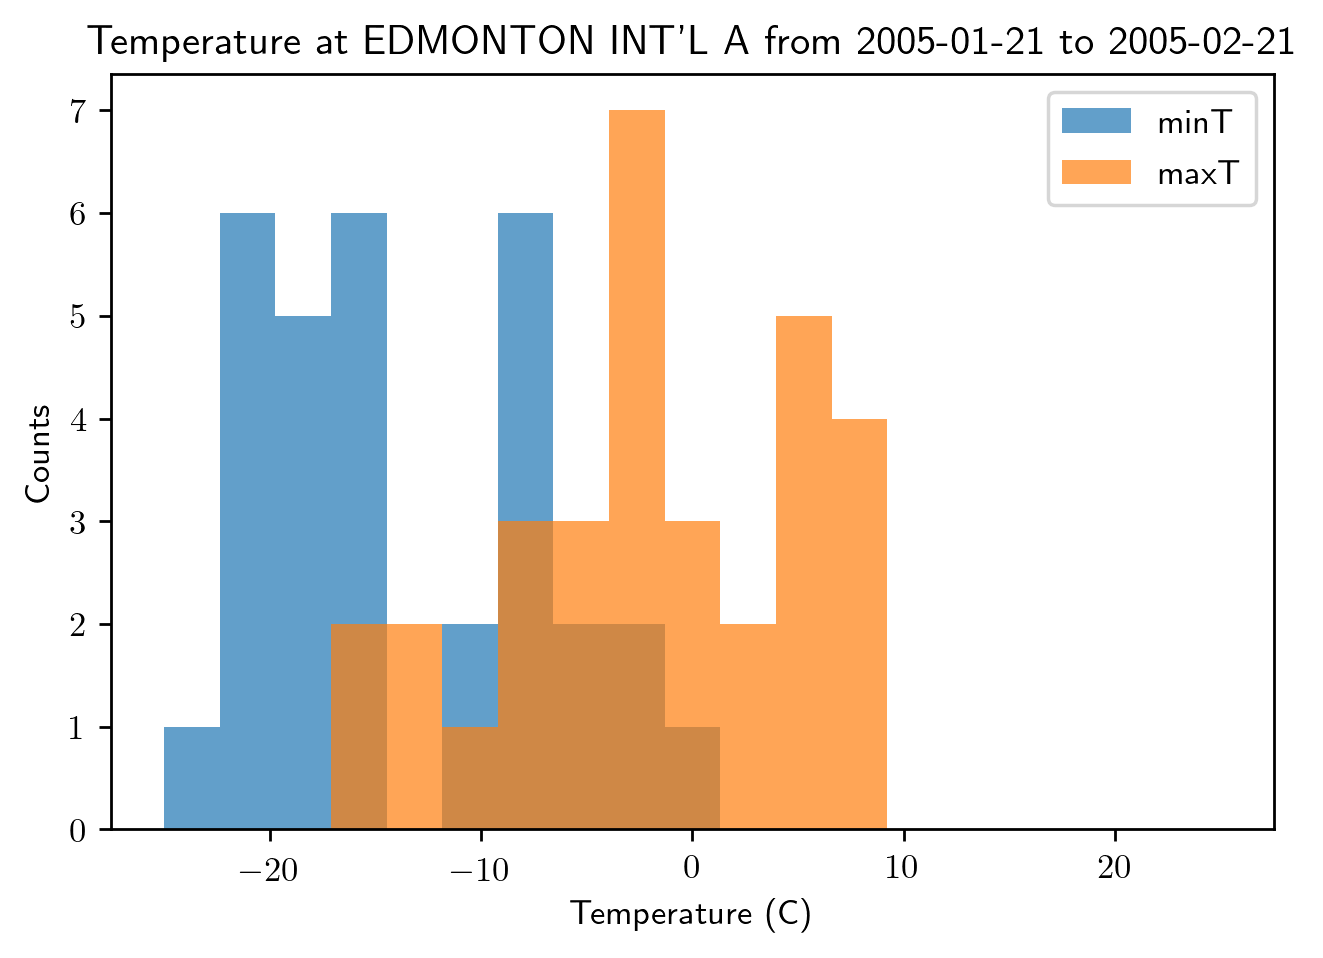

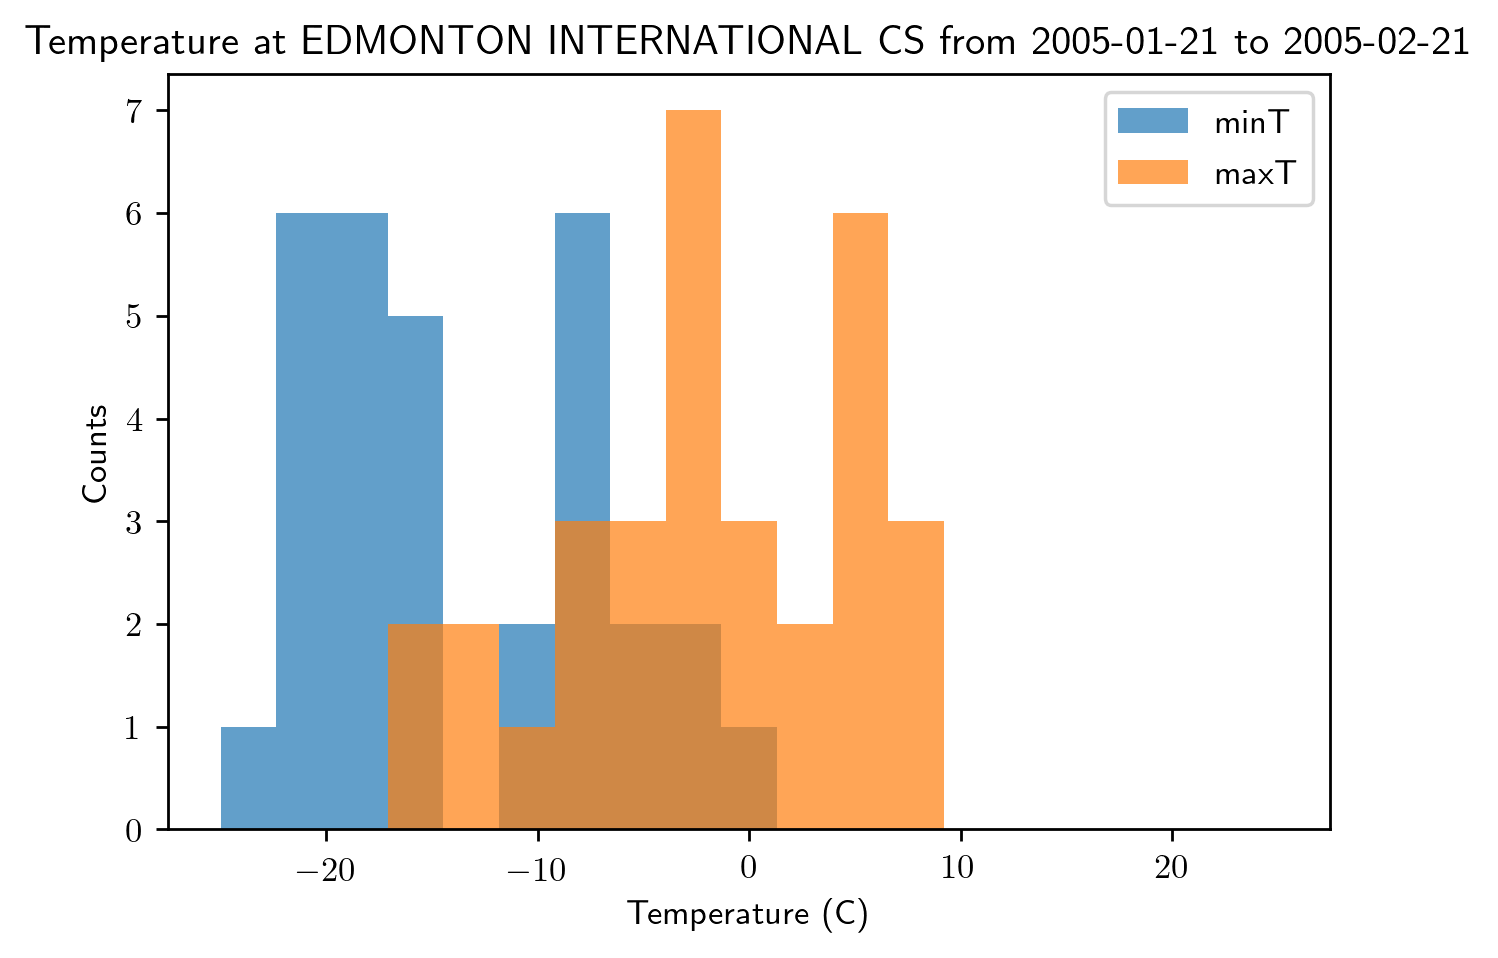

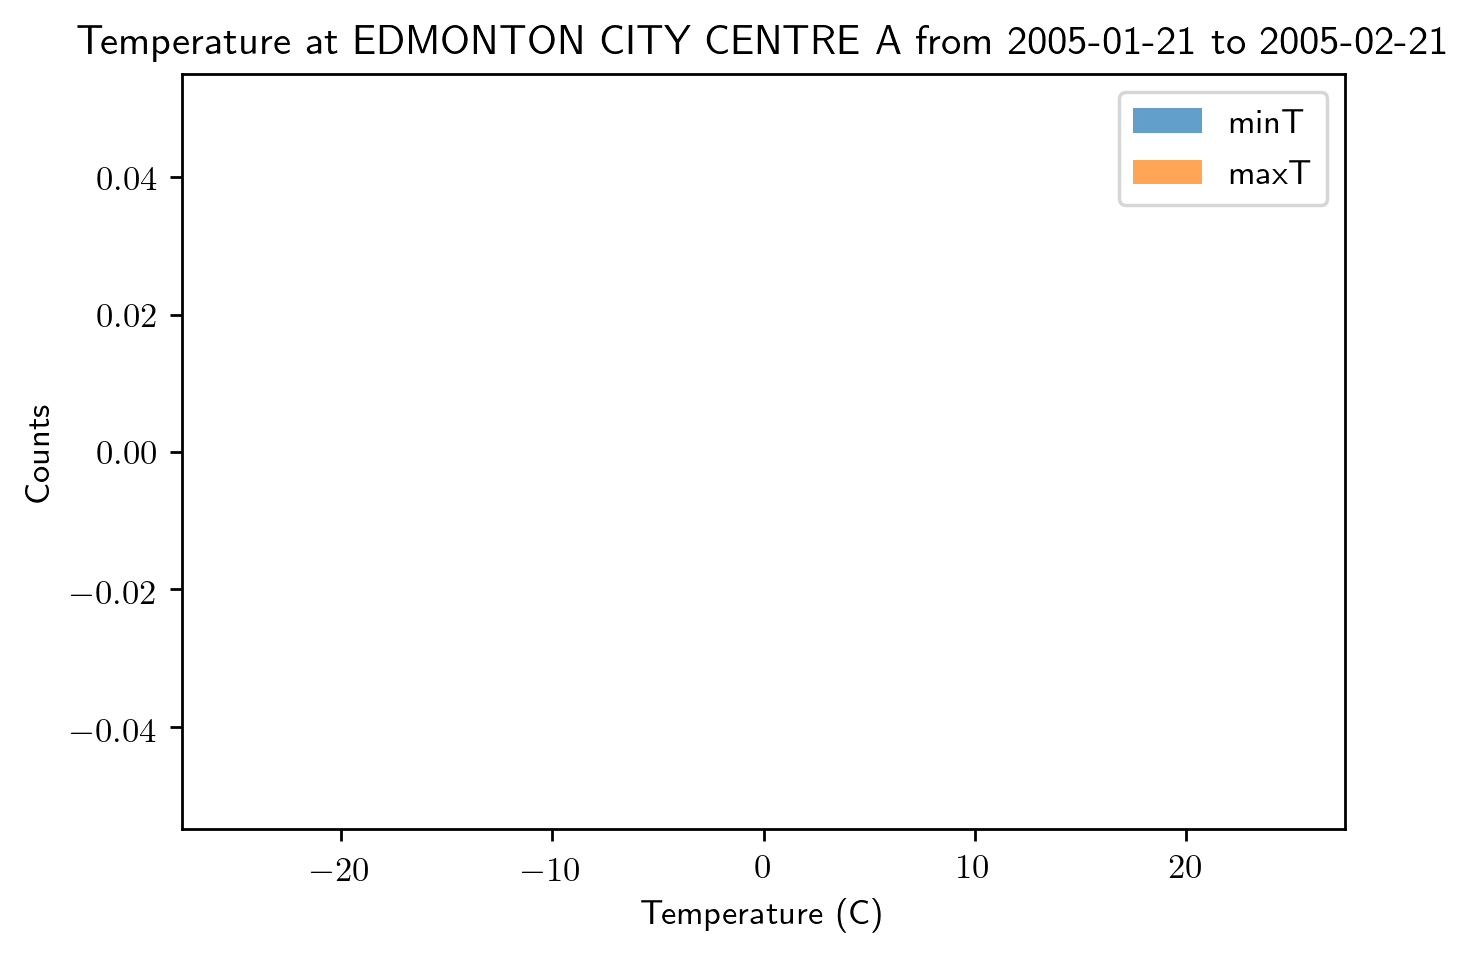

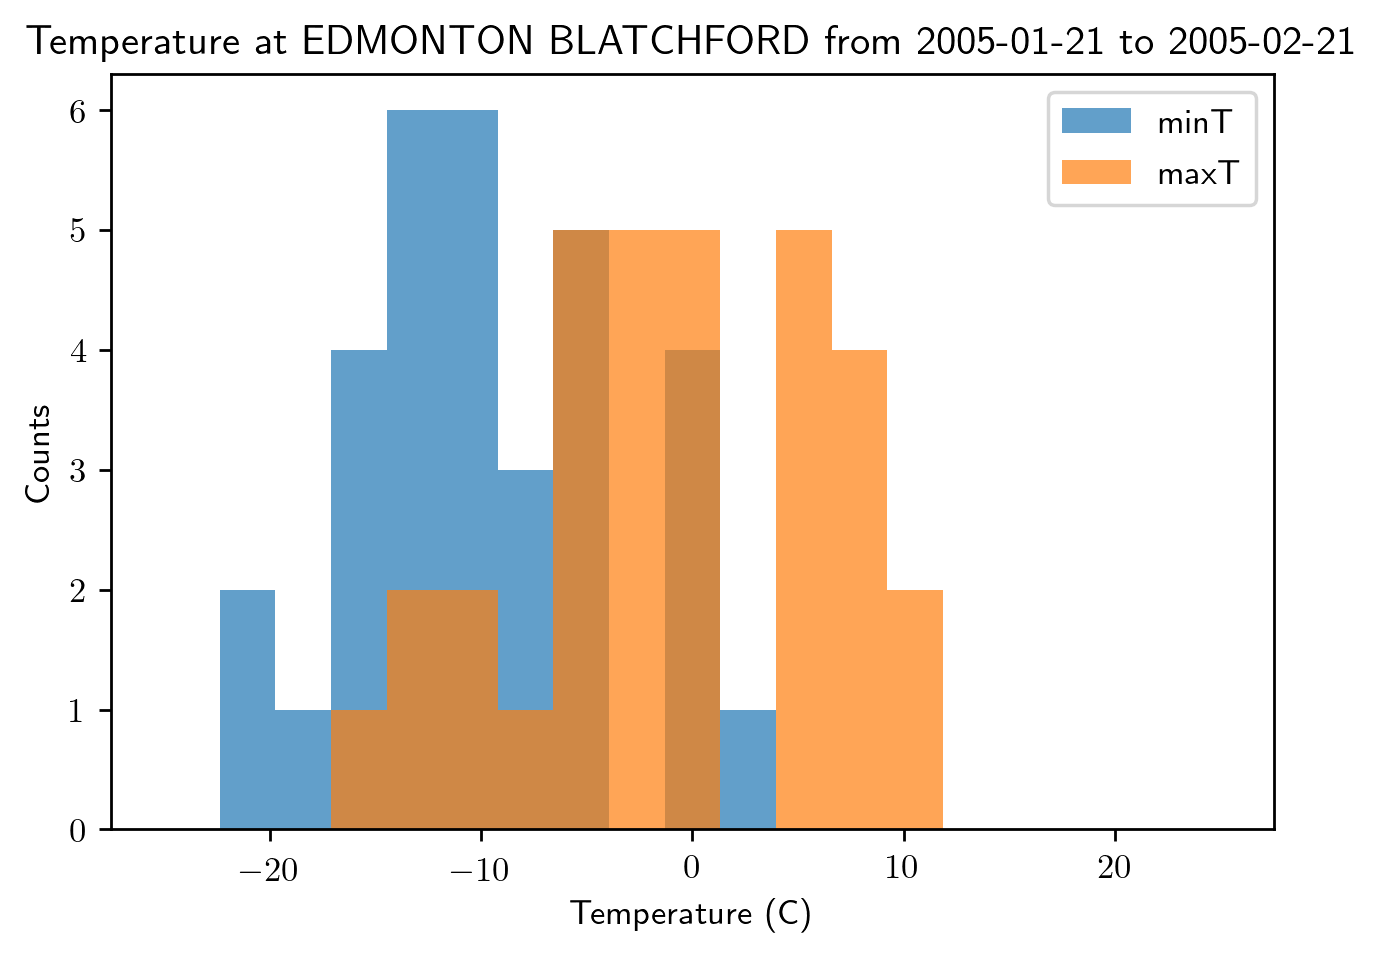

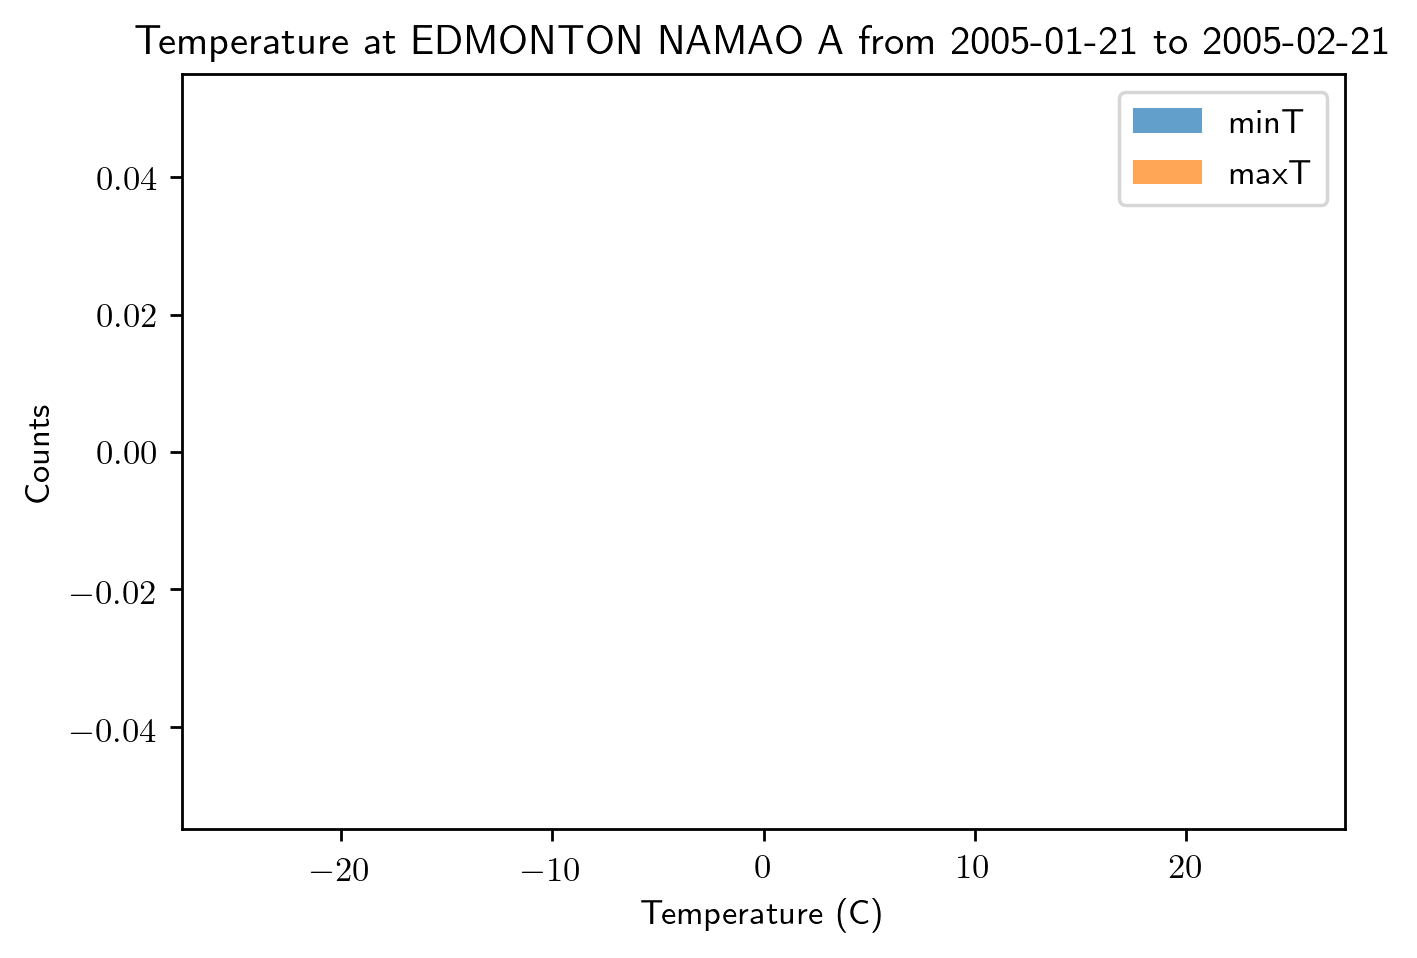

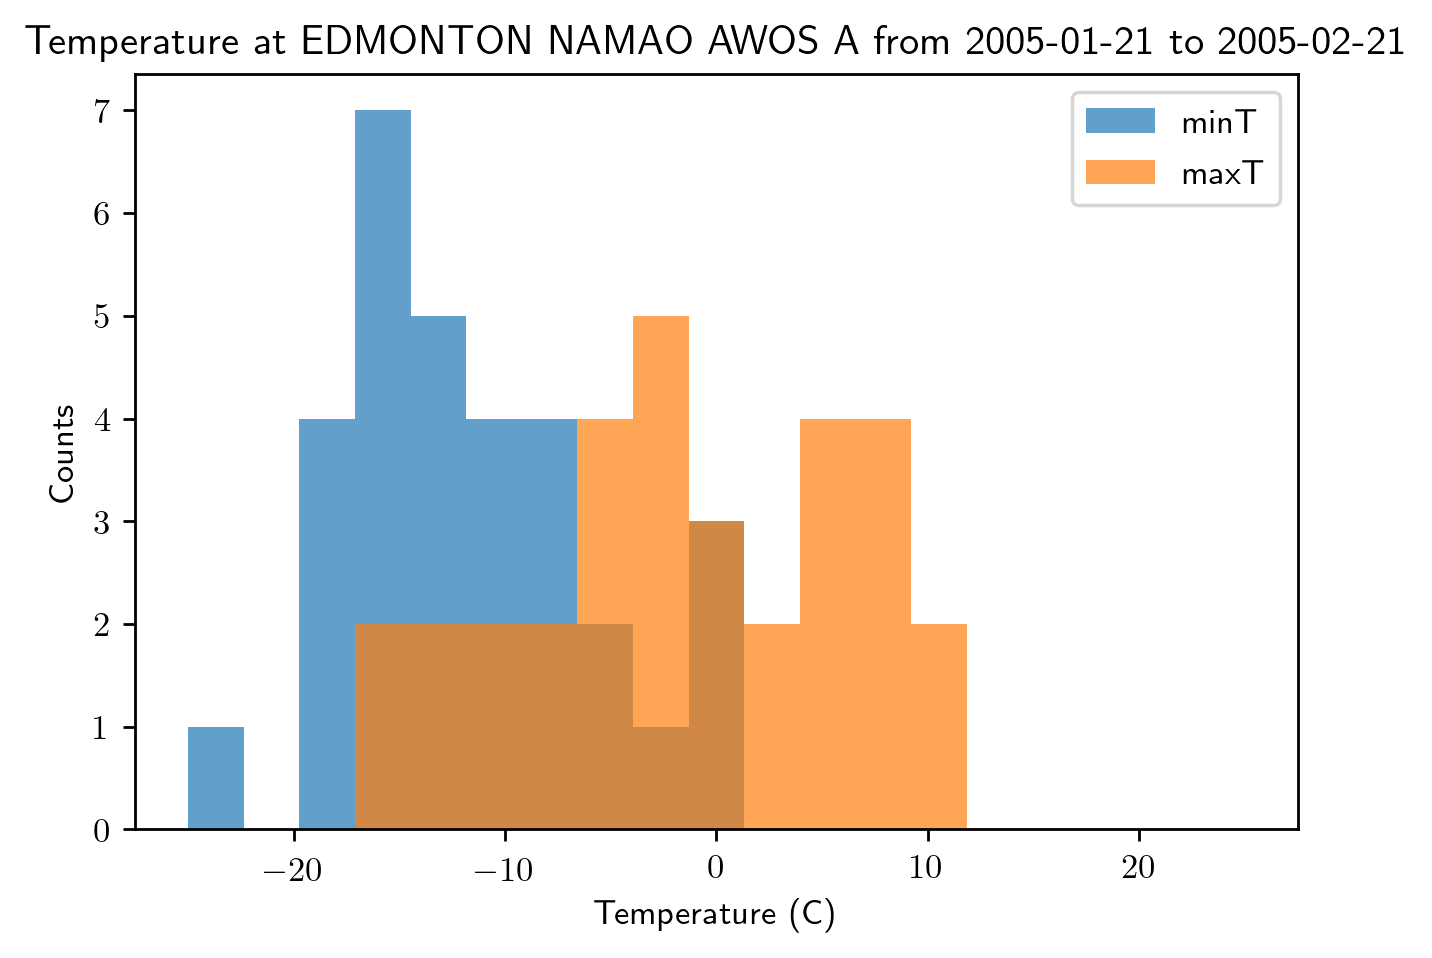

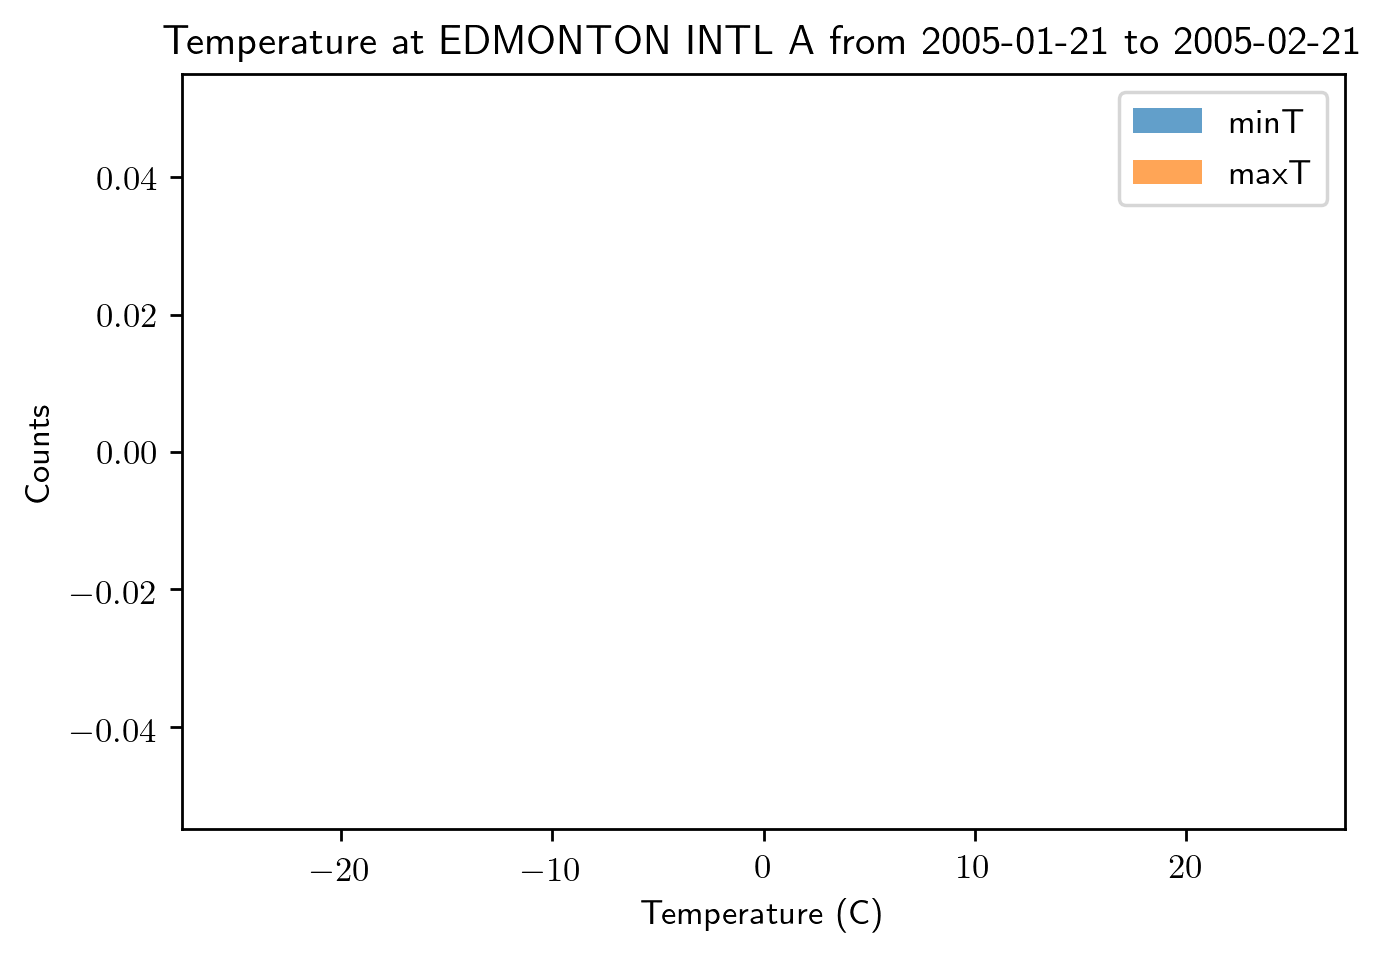

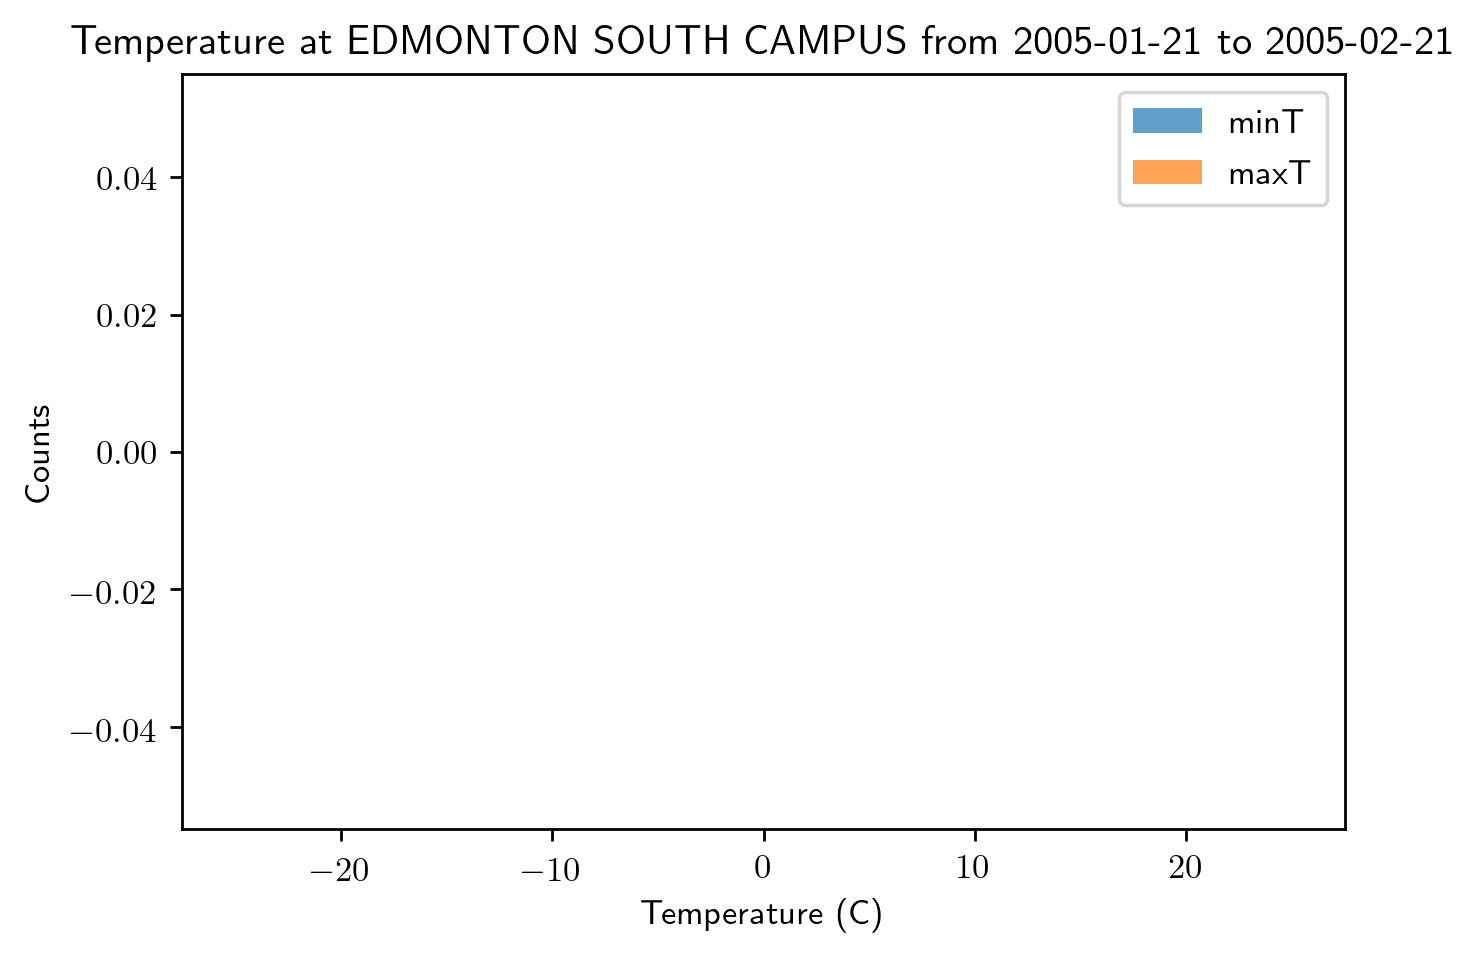

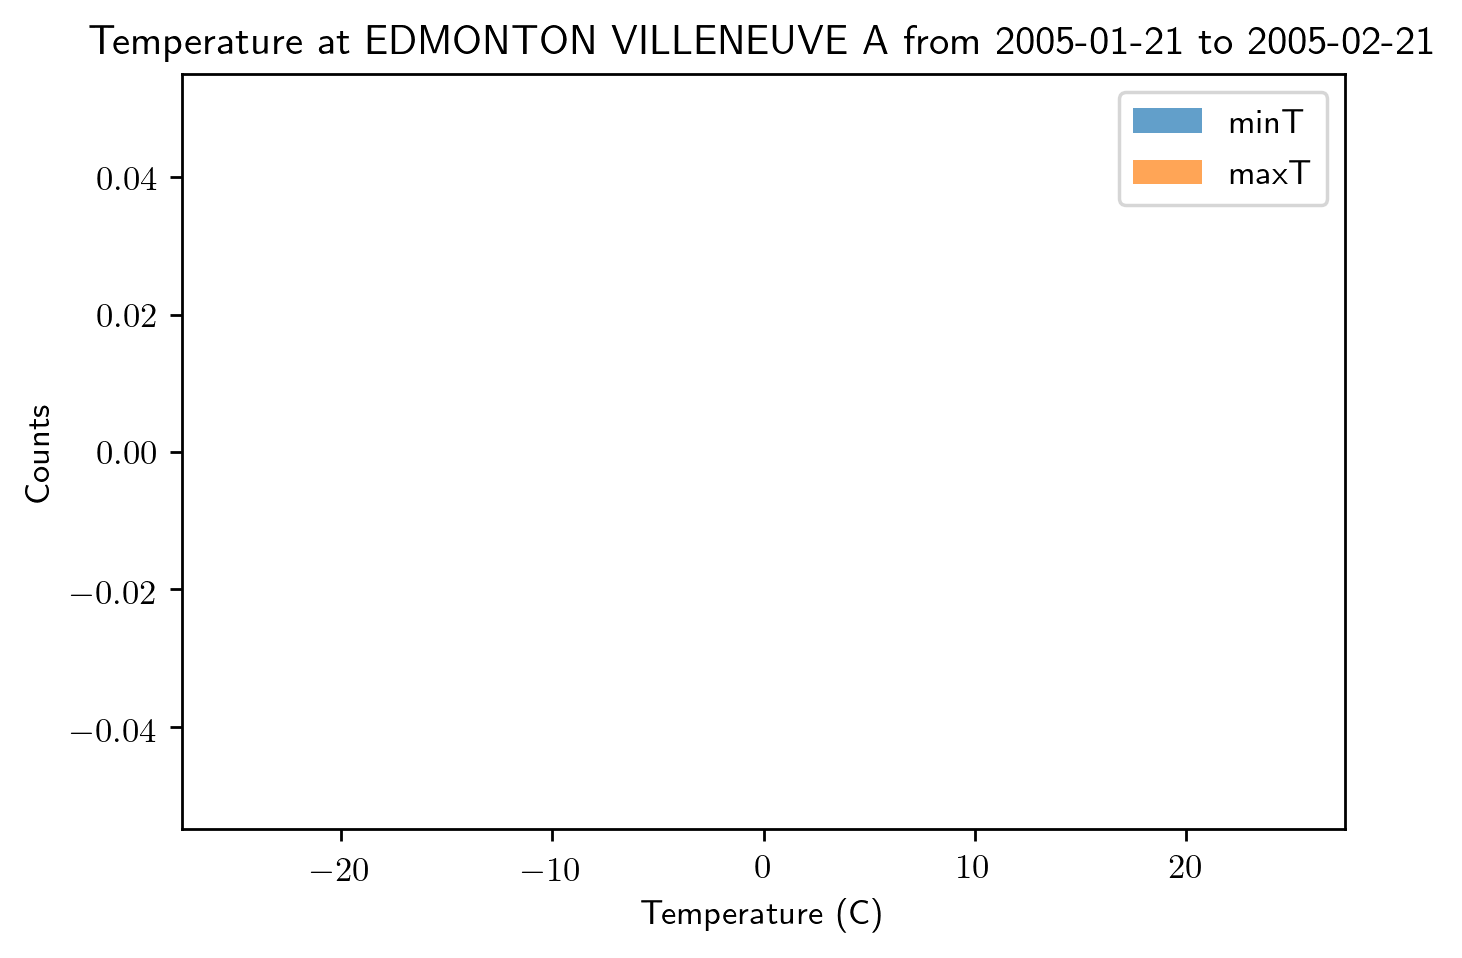

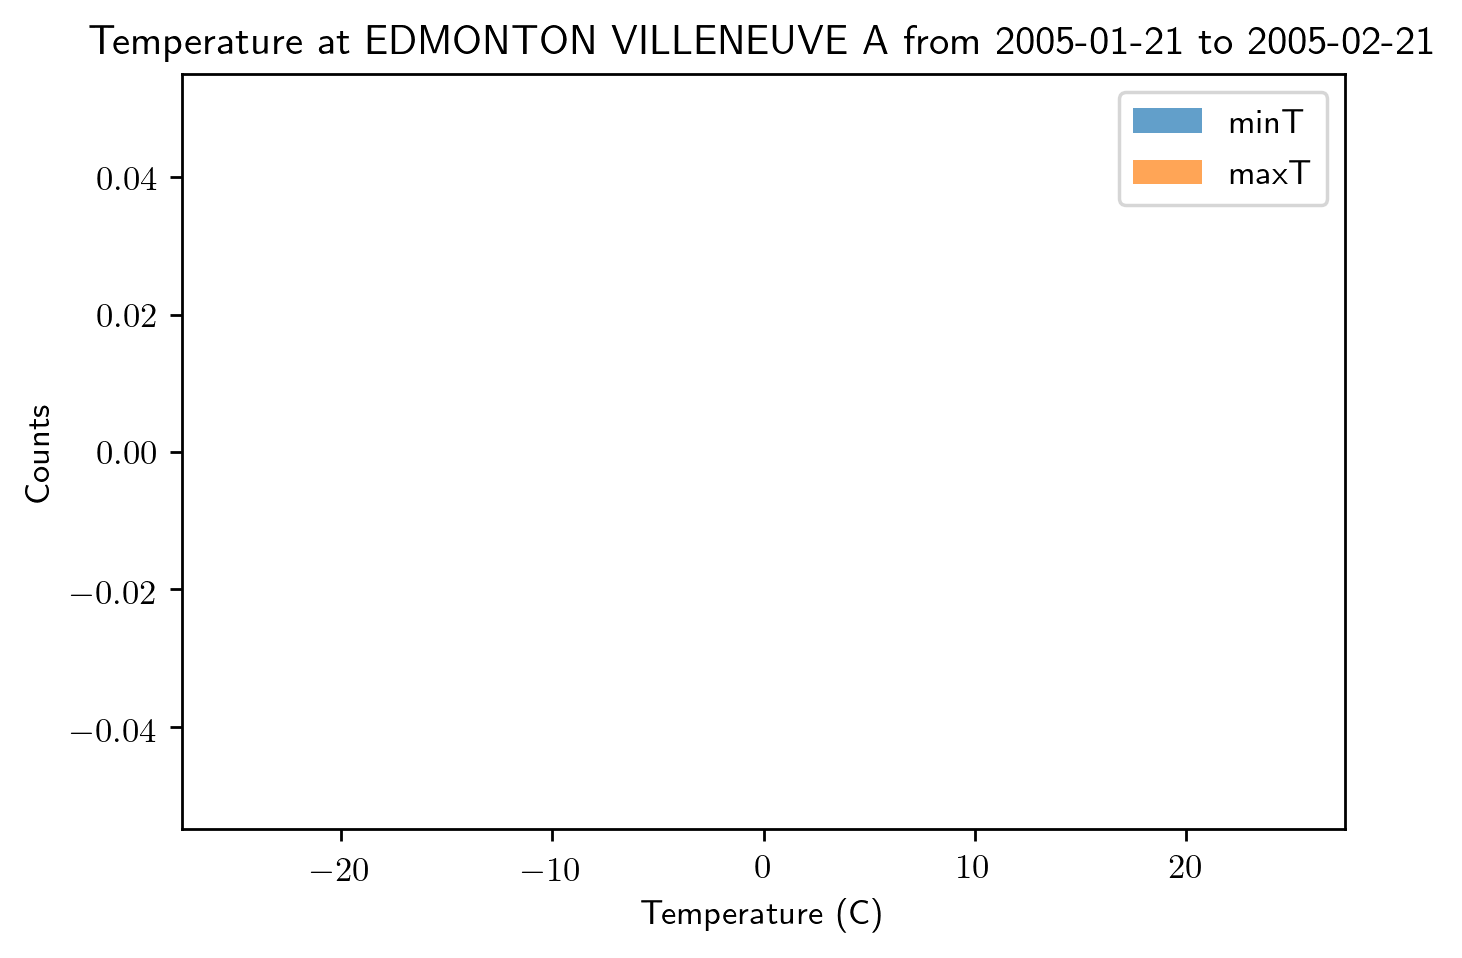

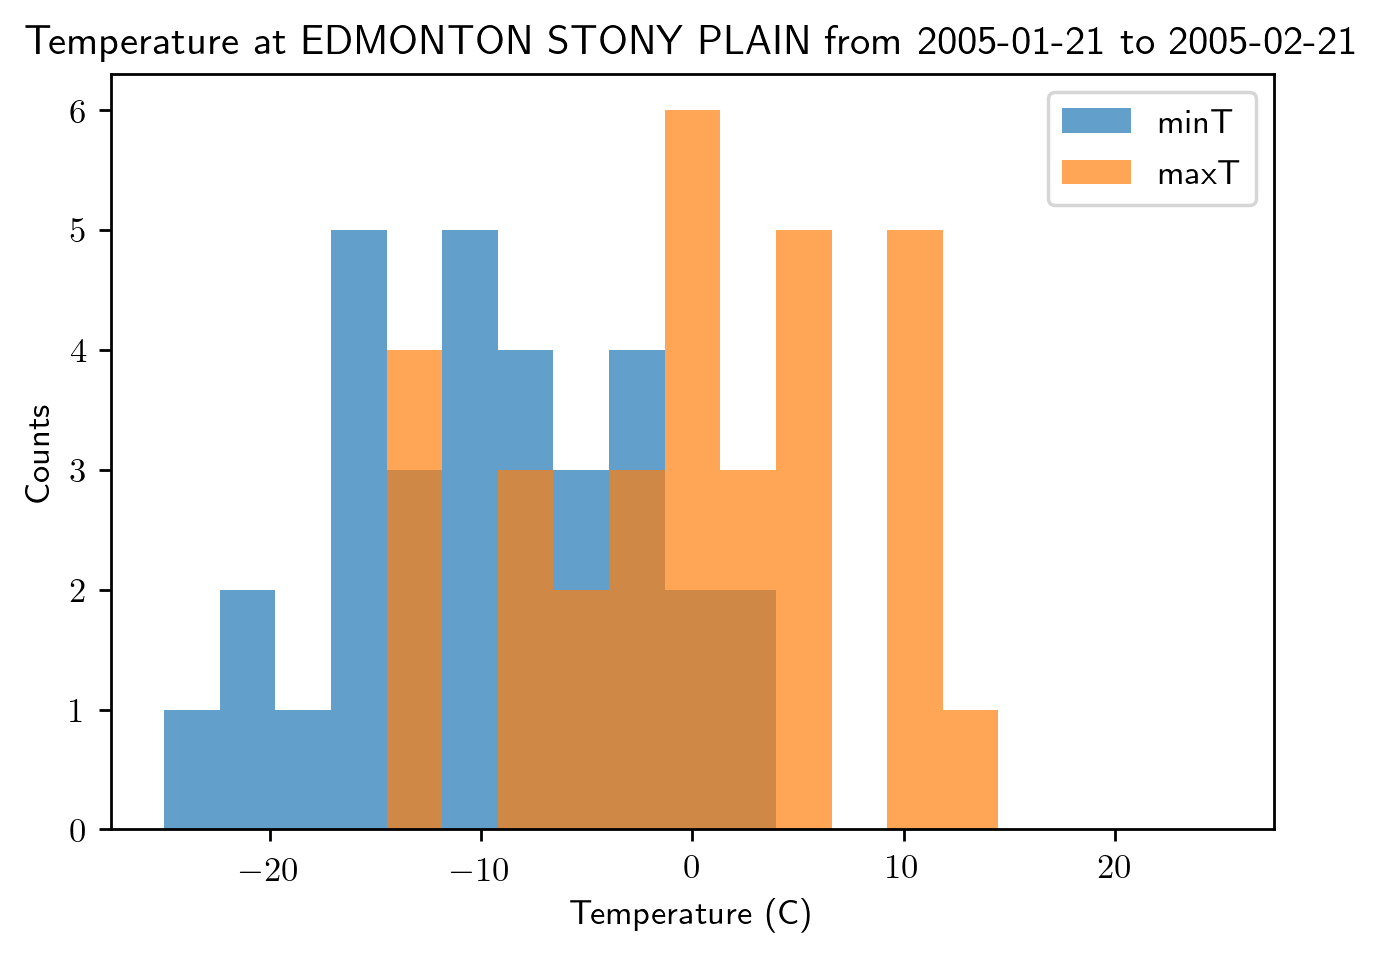

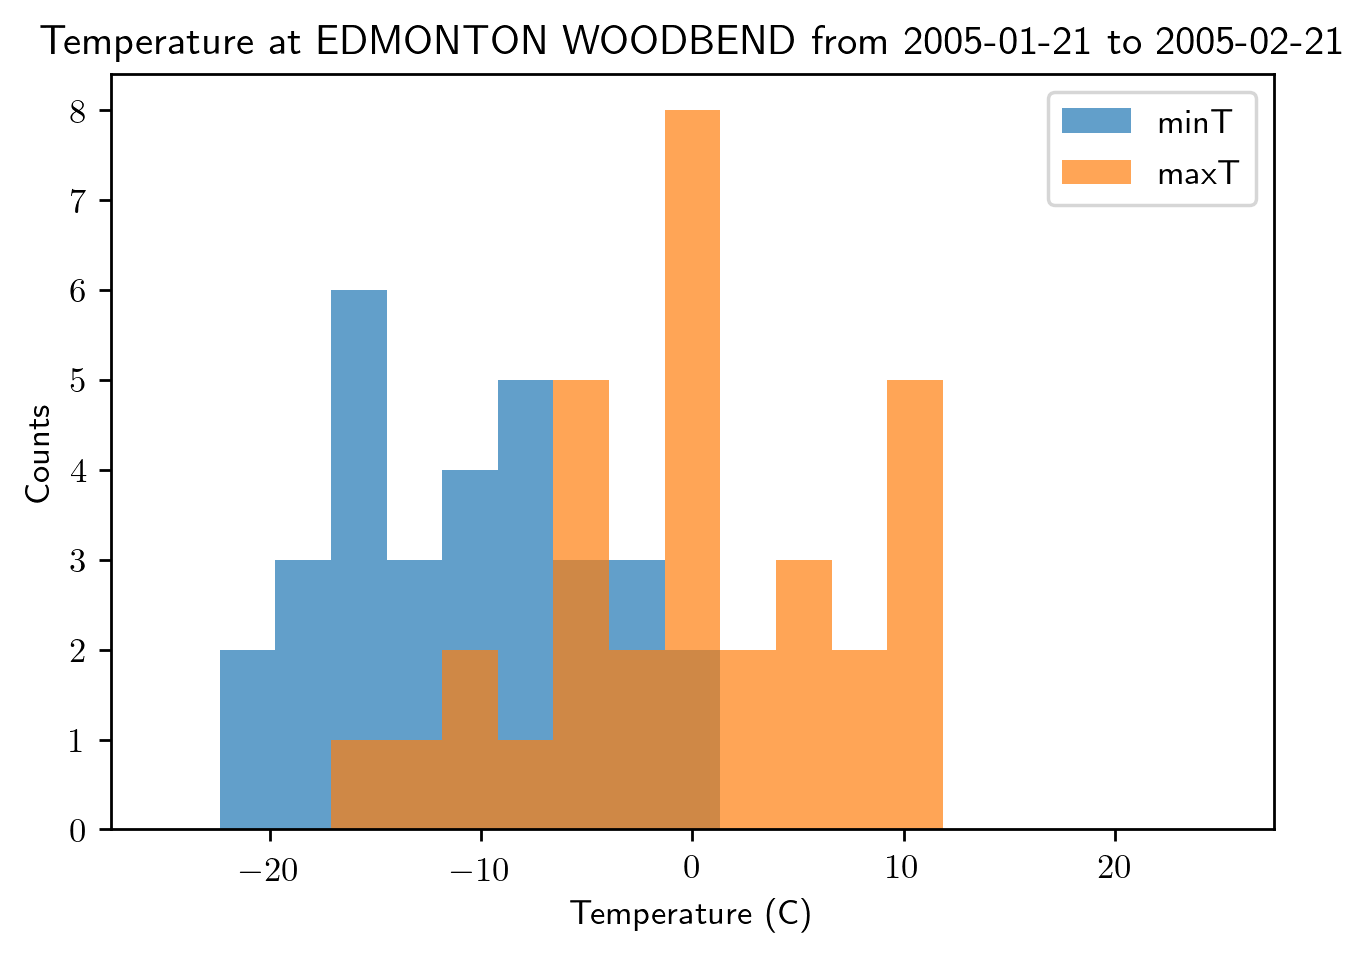

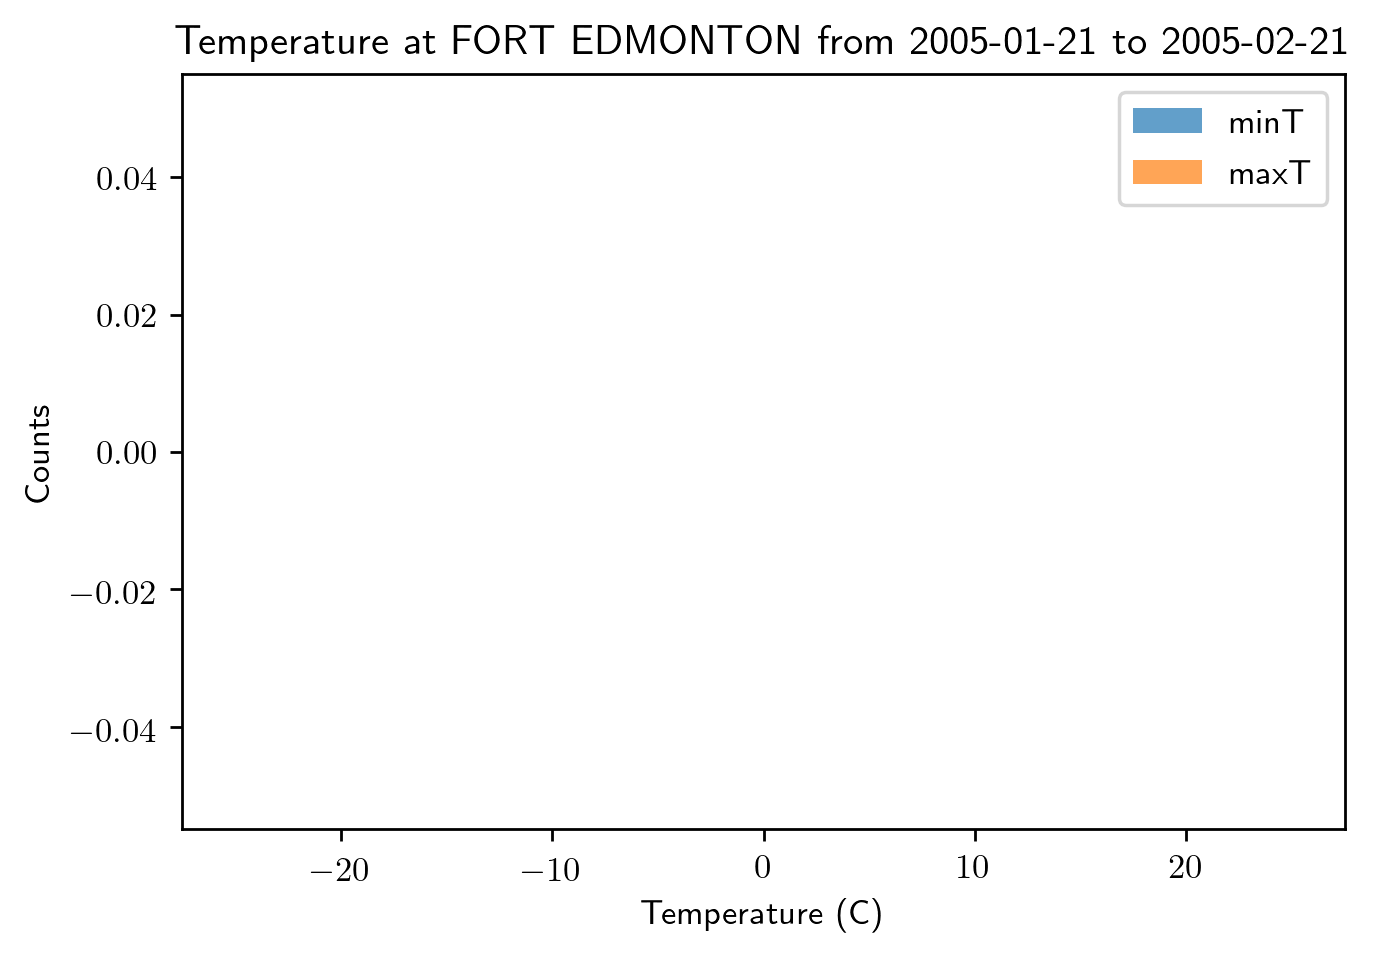

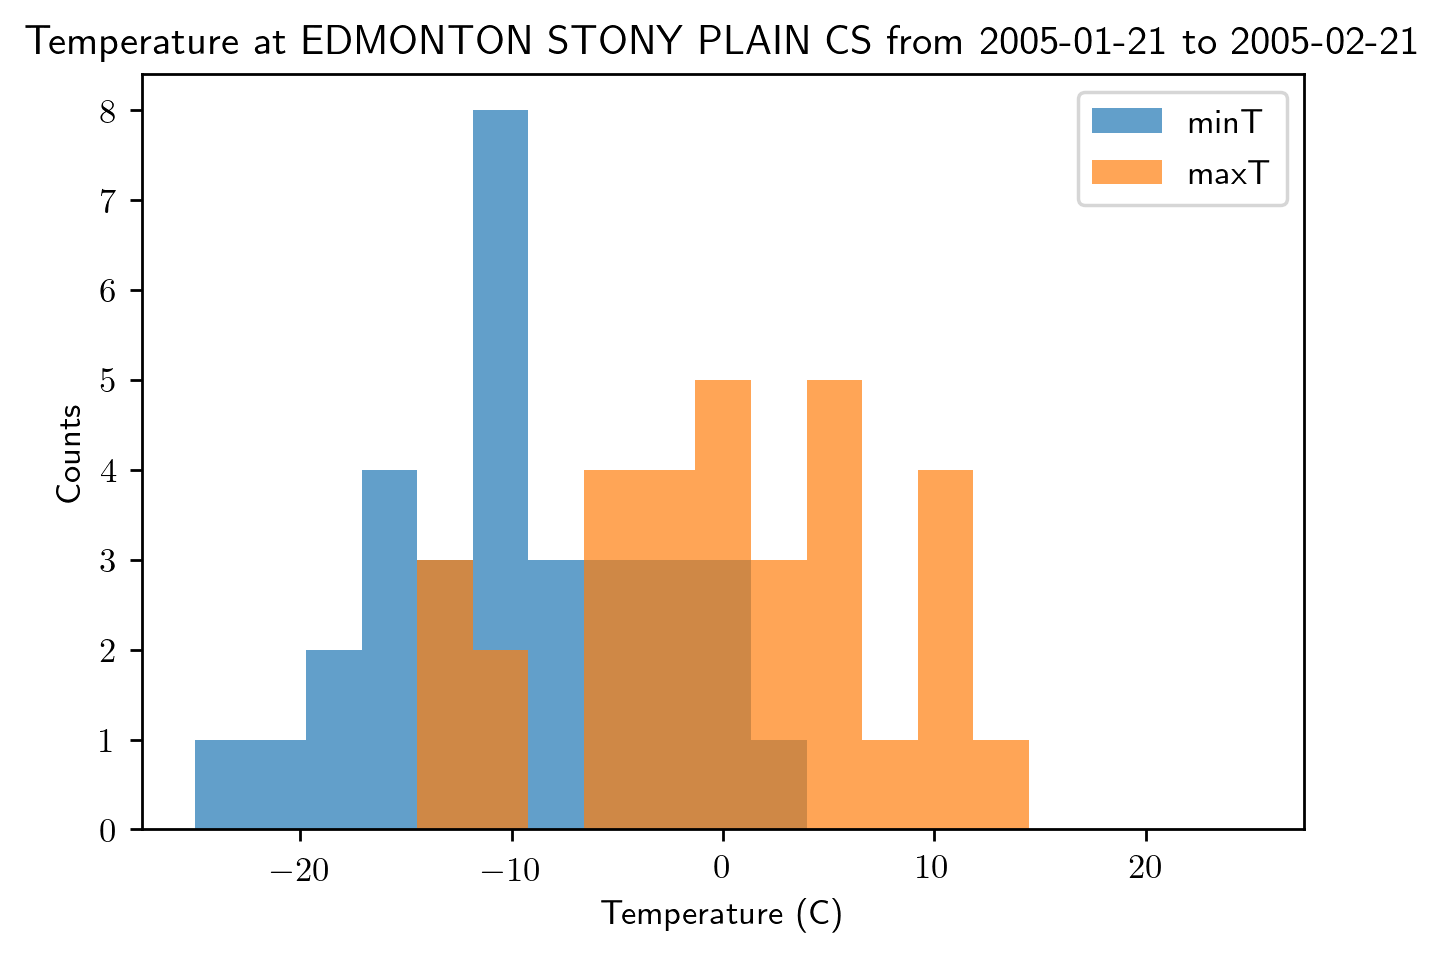

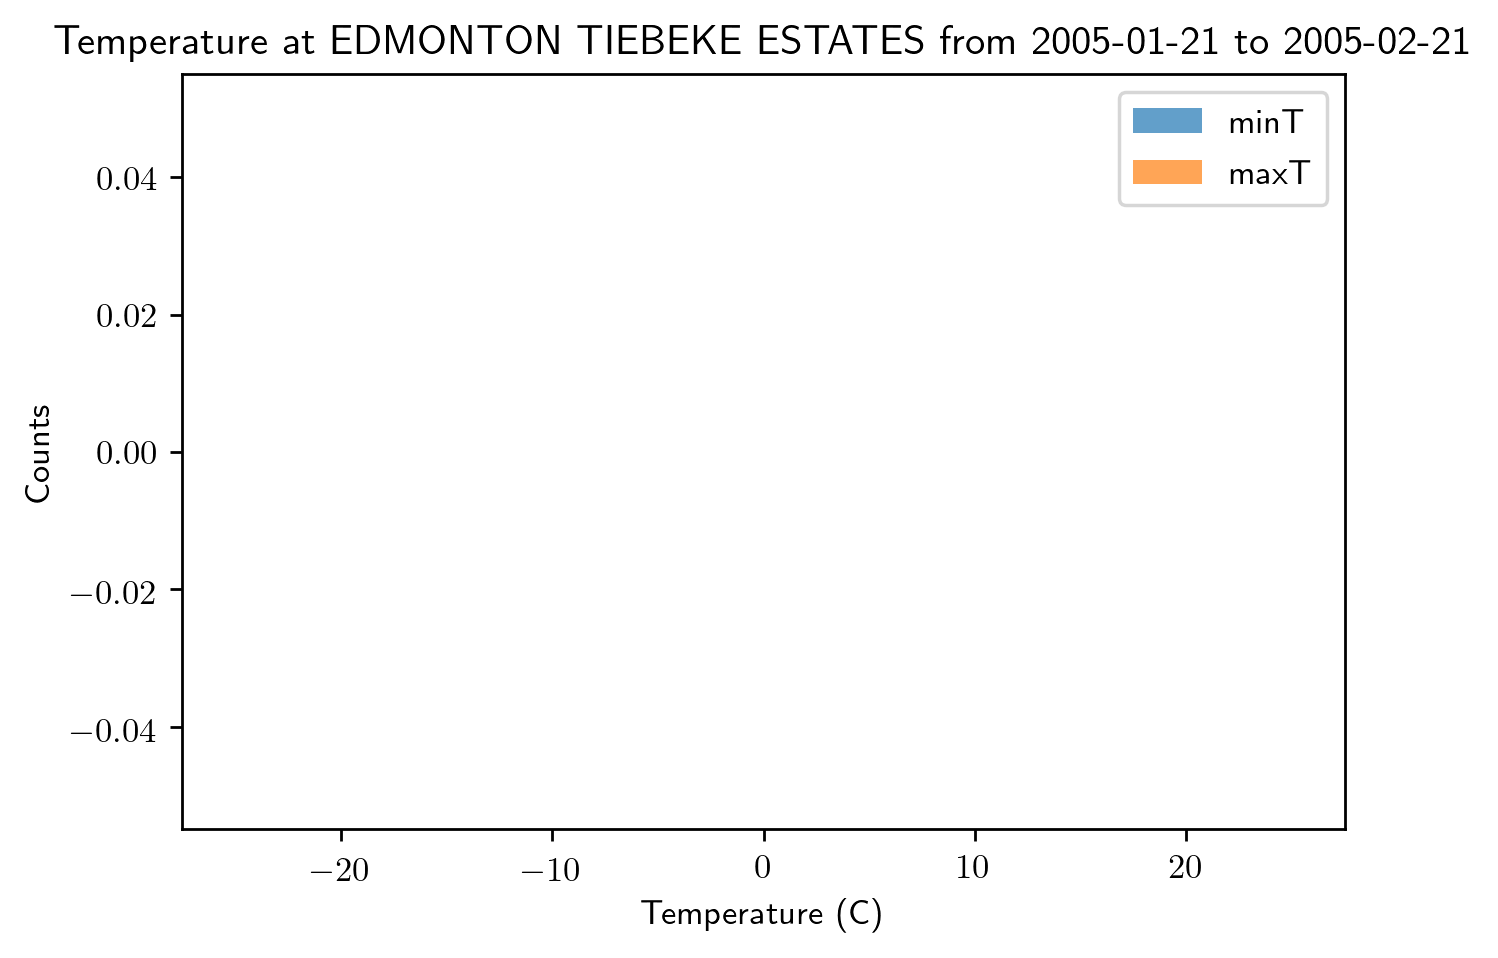

In [145]:
#In the following code, we generate over all stations
for stations in s:
    plot_histogram(stations) #Some plots are empty because there is no data from the period.

3.  For each pair of stations, find the periods of time during which they both measured temperatures.  If there is an overlapping period, find the mean and standard deviation of the differences between the max and min temperatures measured at the two stations for those periods.  Fill out a table with rows:  Name of Station 1, Name of Station 2, number of days that both measured temperatures, Average Difference in max, standard deviation of difference of Max, Average difference in min, standard deviation of difference in min

In [146]:
# Question 3. 

import pprint

def station_compare(station1, station2, table=False, print_table=True):
    
    # Make dataframes for two stations. Then find the time when they both measured temperatures.
    df_2_stations = pd.concat([make_dataFrame(station1),make_dataFrame(station2)], axis=1) 
    df_2_stations = df_2_stations.dropna() #Drop times where one station didn't measure temperatures.
    
    df_2_stations['delta_minT'] = df_2_stations['minT_'+station1.name] - df_2_stations['minT_'+station2.name]
    df_2_stations['delta_maxT'] = df_2_stations['maxT_'+station1.name] - df_2_stations['maxT_'+station2.name]
    
    #All this is already made calling pd.describe(), but I manually made a table if that's the goal of the problem. 
    #If you want my manually made table, then set table==True.
    #Else if you want the auto generated table then set table==False.
    
    
    
    if table==True:
        #We first call the appropiate function in pandas, then we call values to convert that to a numpy array.
        #Then we take the np.mean() of this 1 by 1 array so that it looks nicer when we print it.
        table = {'Name of Station 1': station1.name, #Name
             'Name of Station 2': station2.name,
             'Number of days that both measured temperatures': df_2_stations.count().values.mean(), #Since we dropped all rows containing nan, then we only need to count the size
             'Average Difference in max (C)': df_2_stations[['delta_maxT']].mean().values.mean(),
             'Standard Deviation of difference of Max': df_2_stations[['delta_maxT']].std().values.mean(),
             'Average Difference in min (C)': df_2_stations[['delta_minT']].mean().values.mean(),
             'Standard Deviation of difference in min': df_2_stations[['delta_minT']].std().values.mean(),
        }
        if print_table:
            pprint.pprint(table)
        return df_2_stations
    else:
        if print_table:
            print({'Station 1': station1.name,
                 'Station 2': station2.name})
            print(df_2_stations[['delta_minT','delta_maxT']].describe())
        return df_2_stations

#df_2_stations = station_compare(s[1], s[3]) #Autogenerated table
df_2_stations = station_compare(s[1], s[3], table=True) #Manually made table



{'Average Difference in max (C)': 0.6261977186311788,
 'Average Difference in min (C)': 3.7100760456273765,
 'Name of Station 1': 'EDMONTON CITY CENTRE AWOS',
 'Name of Station 2': "EDMONTON INT'L A",
 'Number of days that both measured temperatures': 2630.0,
 'Standard Deviation of difference in min': 2.4786761169639497,
 'Standard Deviation of difference of Max': 1.2703549964917555}


In [147]:
#In the following code, we simply generate all possible pairs of stations for which we wish to compare.
#Also, some stations have no data in common, and therefore there might be nans/0.
import itertools

for pair in itertools.combinations(s, 2):
    try:
        df_2_stations = station_compare(*pair, table=True) 
    except ValueError: # This error occurs when you have an empty dataframe
        pass

{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON',
 'Name of Station 2': 'EDMONTON CITY CENTRE AWOS',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON',
 'Name of Station 2': 'EDMONTON CALDER',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON',
 'Name of Station 2': "EDMONTON INT'L A",
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': nan,
 'Average Difference in min (

 'Standard Deviation of difference in min': 2.2936003821382522,
 'Standard Deviation of difference of Max': 1.4600556023510864}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON CITY CENTRE AWOS',
 'Name of Station 2': 'EDMONTON SOUTH CAMPUS',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON CITY CENTRE AWOS',
 'Name of Station 2': 'EDMONTON VILLENEUVE A',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': 0.22831683168316827,
 'Average Difference in min (C)': 1.7667326732673267,
 'Name of Station 1': 'EDMONTON CITY CENTRE AWOS',
 'Name of Station 2': 'EDMONTON VILLENEUVE A',
 'Num

{'Average Difference in max (C)': -0.03741735537190082,
 'Average Difference in min (C)': 0.05285123966942148,
 'Name of Station 1': "EDMONTON INT'L A",
 'Name of Station 2': 'EDMONTON INTERNATIONAL CS',
 'Number of days that both measured temperatures': 4840.0,
 'Standard Deviation of difference in min': 0.5183630769846762,
 'Standard Deviation of difference of Max': 0.5037724429749204}
{'Average Difference in max (C)': -0.44617491441020846,
 'Average Difference in min (C)': -2.6594460006224714,
 'Name of Station 1': "EDMONTON INT'L A",
 'Name of Station 2': 'EDMONTON CITY CENTRE A',
 'Number of days that both measured temperatures': 16065.0,
 'Standard Deviation of difference in min': 2.0985512615251625,
 'Standard Deviation of difference of Max': 1.2086215912877567}
{'Average Difference in max (C)': -0.2731135282121006,
 'Average Difference in min (C)': -3.3480285520054385,
 'Name of Station 1': "EDMONTON INT'L A",
 'Name of Station 2': 'EDMONTON BLATCHFORD',
 'Number of days that b

 'Standard Deviation of difference of Max': 1.4265091362447722}
{'Average Difference in max (C)': -0.20949920508744035,
 'Average Difference in min (C)': -3.3931240063593004,
 'Name of Station 1': 'EDMONTON INTERNATIONAL CS',
 'Name of Station 2': 'EDMONTON STONY PLAIN',
 'Number of days that both measured temperatures': 7548.0,
 'Standard Deviation of difference in min': 3.0282953667697887,
 'Standard Deviation of difference of Max': 1.7615856214827195}
{'Average Difference in max (C)': -0.4315099901735997,
 'Average Difference in min (C)': -1.4233540779561087,
 'Name of Station 1': 'EDMONTON INTERNATIONAL CS',
 'Name of Station 2': 'EDMONTON WOODBEND',
 'Number of days that both measured temperatures': 6106.0,
 'Standard Deviation of difference in min': 2.6837622481936427,
 'Standard Deviation of difference of Max': 1.8037769763720406}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON INTERNATIONAL CS',
 'Name of Station 2':

 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': 0.5959278350515463,
 'Average Difference in min (C)': 1.9725773195876288,
 'Name of Station 1': 'EDMONTON BLATCHFORD',
 'Name of Station 2': 'EDMONTON VILLENEUVE A',
 'Number of days that both measured temperatures': 1940.0,
 'Standard Deviation of difference in min': 1.9048296578639554,
 'Standard Deviation of difference of Max': 1.2420428176828937}
{'Average Difference in max (C)': 0.12116235732587936,
 'Average Difference in min (C)': 0.2119496855345912,
 'Name of Station 1': 'EDMONTON BLATCHFORD',
 'Name of Station 2': 'EDMONTON STONY PLAIN',
 'Number of days that both measured temperatures': 8586.0,
 'Standard Deviation of difference in min': 1.6936310158166297,
 'Standard Deviation of difference of Max': 1.4786236418241114}
{'Average Difference in max (C)': -0.26724958030218243,
 'Average Differ

 'Standard Deviation of difference in min': 2.7821361615283164,
 'Standard Deviation of difference of Max': 1.8042573131445898}
{'Average Difference in max (C)': nan,
 'Average Difference in min (C)': nan,
 'Name of Station 1': 'EDMONTON NAMAO AWOS A',
 'Name of Station 2': 'FORT EDMONTON',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': -0.22679666614247523,
 'Average Difference in min (C)': -1.655716307595534,
 'Name of Station 1': 'EDMONTON NAMAO AWOS A',
 'Name of Station 2': 'EDMONTON STONY PLAIN CS',
 'Number of days that both measured temperatures': 6359.0,
 'Standard Deviation of difference in min': 2.014706456622694,
 'Standard Deviation of difference of Max': 1.4439531173953732}
{'Average Difference in max (C)': -0.047619047619047526,
 'Average Difference in min (C)': 0.2833333333333333,
 'Name of Station 1': 'EDMONTON NAMAO AWOS A',
 'Na

 'Name of Station 2': 'EDMONTON TIEBEKE ESTATES',
 'Number of days that both measured temperatures': 0.0,
 'Standard Deviation of difference in min': nan,
 'Standard Deviation of difference of Max': nan}
{'Average Difference in max (C)': -0.279948717948718,
 'Average Difference in min (C)': -1.7527692307692309,
 'Name of Station 1': 'EDMONTON VILLENEUVE A',
 'Name of Station 2': 'EDMONTON STONY PLAIN',
 'Number of days that both measured temperatures': 1950.0,
 'Standard Deviation of difference in min': 2.367786639266445,
 'Standard Deviation of difference of Max': 1.437792689077032}
{'Average Difference in max (C)': -0.03097463284379175,
 'Average Difference in min (C)': 0.032576769025367165,
 'Name of Station 1': 'EDMONTON VILLENEUVE A',
 'Name of Station 2': 'EDMONTON WOODBEND',
 'Number of days that both measured temperatures': 749.0,
 'Standard Deviation of difference in min': 2.9631031227567184,
 'Standard Deviation of difference of Max': 2.1907808135194764}
{'Average Difference 

4.  For a few of the pairs which have significant differences, make a 2d color histogram of Ta-Tb versus Ta, where Ta and Tb refer to the measurements at the two stations. 

{'Station 1': 'EDMONTON CITY CENTRE AWOS', 'Station 2': "EDMONTON INT'L A"}
        delta_minT   delta_maxT
count  2630.000000  2630.000000
mean      3.710076     0.626198
std       2.478676     1.270355
min      -7.700000    -9.000000
25%       1.800000    -0.100000
50%       3.800000     0.500000
75%       5.400000     1.100000
max      13.100000     8.200000


minT_EDMONTON CITY CENTRE AWOS  maxT_EDMONTON CITY CENTRE AWOS  \
2005-01-21                           -21.7                           -12.5   
2005-01-22                           -17.3                            -6.1   
2005-01-23                            -6.6                             4.4   
2005-01-24                            -1.6                             9.1   
2005-01-25                            -7.3                             6.3   
...                                    ...                             ...   
2012-04-07                            -6.6                             5.3   
2012-04-08                            -4.7                             2.7   
2012-04-09                            -6.0                             7.6   
2012-04-10                            -0.9                            12.1   
2012-04-11                             3.6                            16.8   

            minT_EDMONTON INT'L A  maxT_EDMONTON INT'L A  delta_minT  \
2005-01-21                  -21.4                  -12.9        -0.3   
2005-01-22                  -17.4                   -5.3         0.1   
2005-01-23                   -8.2                    4.6         1.6   
2005-01-24                   -3.0                    7.6         1.4   
2005-01-25                  -14.8                    5.9         7.5   
...                           ...                    ...         ...   
2012-04-07                   -8.7                    9.1         2.1   
2012-04-08                   -7.5                    5.8         2.8   
2012-04-09                  -10.1                    8.4         4.1   
2012-04-10                   -3.4                   13.1         2.5   
2012-04-11                    1.7                   16.6         1.9   

            delta_maxT  
2005-01-21         0.4  
2005-01-22        -0.8  
2005-01-23        -0.2  
2005-01-24         1.5  
2005-01-25         0.4  
...                ...  
2012-04-07        -3.8  
2012-04-08        -3.1  
2012-04-09        -0.8  
2012-04-10        -1.0  
2012-04-11         0.2  

[2630 rows x 6 columns]

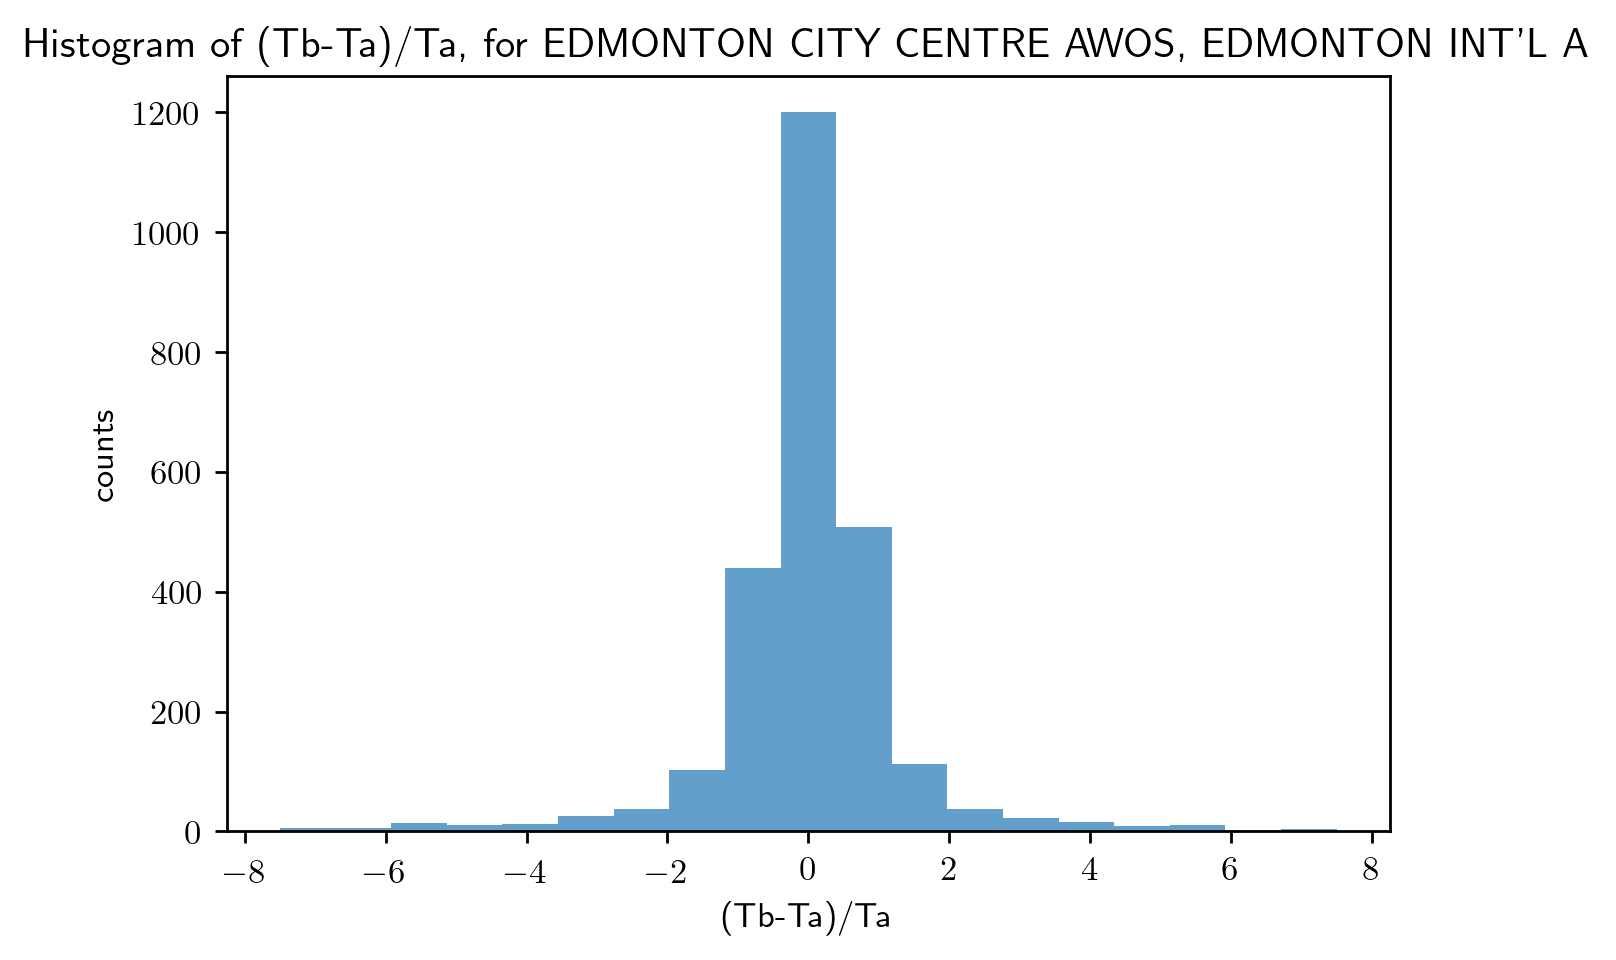

In [163]:
# Solution to Question 4. A histogram is only one variable along the axis, 
# so I decided to histogram the ratio (Ta-Tb)/Tb. 
# Also, it doesn't make sense to cherry pick "significant dates", so I just histogrammed all the dates.

def plot_histogram2(station1, station2):
    df_2_stations = station_compare(station1,station2) #Get the dataframe of the two stations

    Tb_Ta = df_2_stations['delta_minT']/df_2_stations['minT_'+station1.name] #Take Ta-Tb and divide by Tb
    Tb_Ta = Tb_Ta.replace([np.inf, -np.inf], np.nan) # get rid of bad data
    Tb_Ta = Tb_Ta.dropna() # get rid of nan
    
    bins = np.linspace(-7.5,7.5,num=20) #Bins
    
    plt.title(f'Histogram of (Tb-Ta)/Ta, for {station1.name}, {station2.name}')
    plt.ylabel('counts')
    plt.xlabel('(Tb-Ta)/Ta')
    plt.hist(Tb_Ta , alpha=0.7,bins=bins) #histogram the data
    
    return df_2_stations

#Compute this histogram. Like before, we can generalize this to loop over any 2 stations
df_2_stations = plot_histogram2(s[1], s[3]) 
df_2_stations

In [157]:
# Solution to Question 4 continued. 
# If we really want a Tb-Ta plot vs. Ta, then we should not use a histogram and just plot normally

def plot_2(station1, station2):
    df_2_stations = station_compare(station1,station2) #Get the dataframe of the two stations
    
    plt.title(f'{station1.name} vs. {station2.name}, (Tb-Ta) vs. Ta')
    plt.ylabel('(Tb-Ta)')
    plt.xlabel('Ta')
    plt.scatter(df_2_stations['minT_'+station1.name], df_2_stations['delta_minT'] , alpha=0.7) 
    return df_2_stations

#df_2_stations = plot_2(s[1], s[3])
#df_2_stations

5. Combine all the data from the different stations into an average max and min for each each day of the year. To do this, you will to pick one station as the standard, and correct each of the others by its average difference. Keep the data as an np.array. Plot averages for the year.

Text(0.5, 1.0, 'Dates for which the station has data')

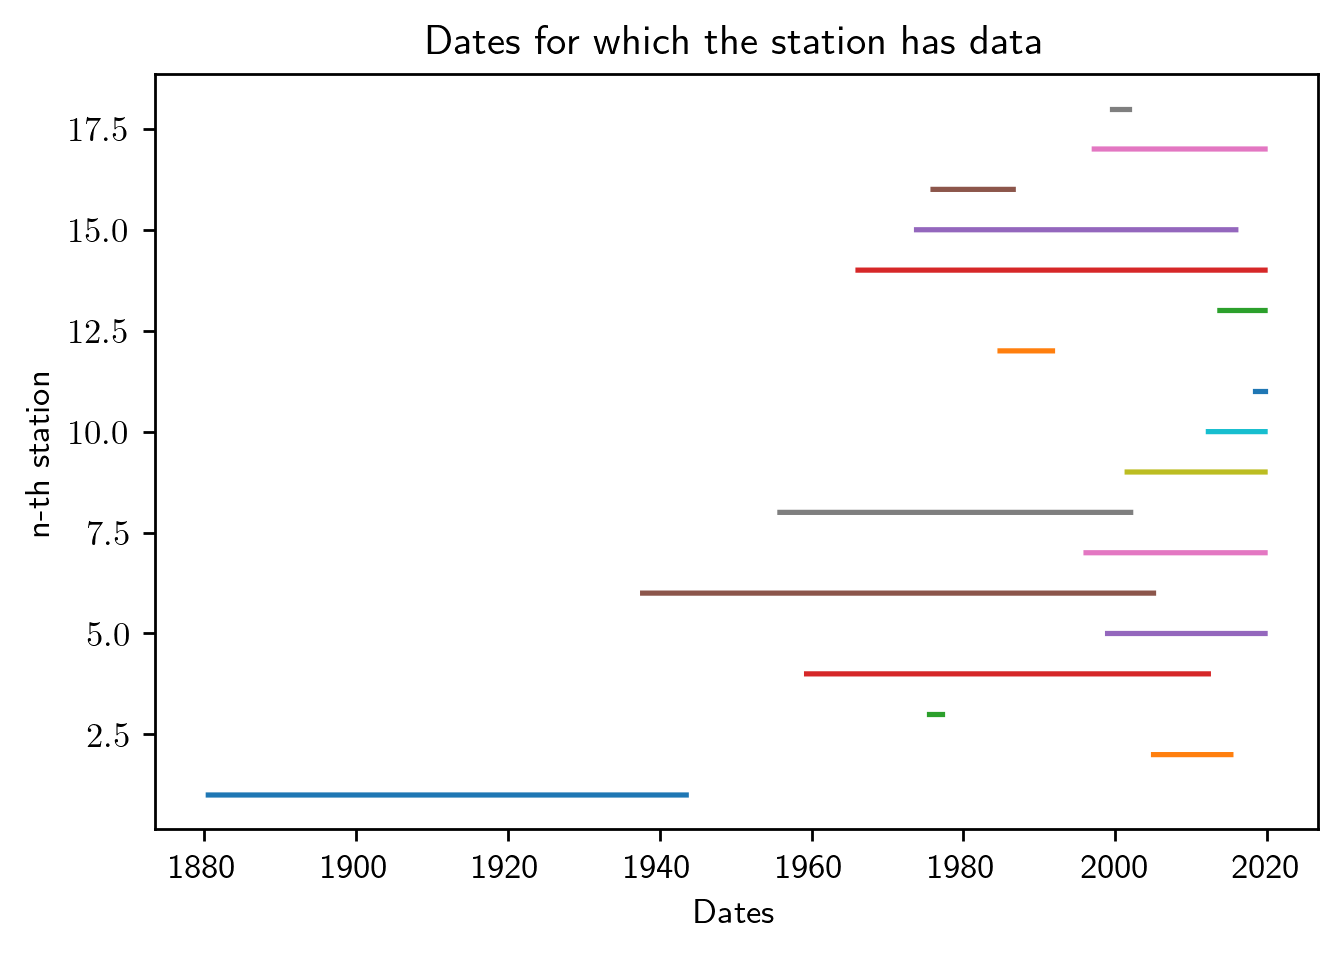

In [150]:
# Solution to Question 5.
for i, stations in enumerate(s):
    plt.plot(stations.dates, np.ones(len(stations.doy))+i)
    
plt.xlabel('Dates')
plt.ylabel('n-th station')
plt.title('Dates for which the station has data')

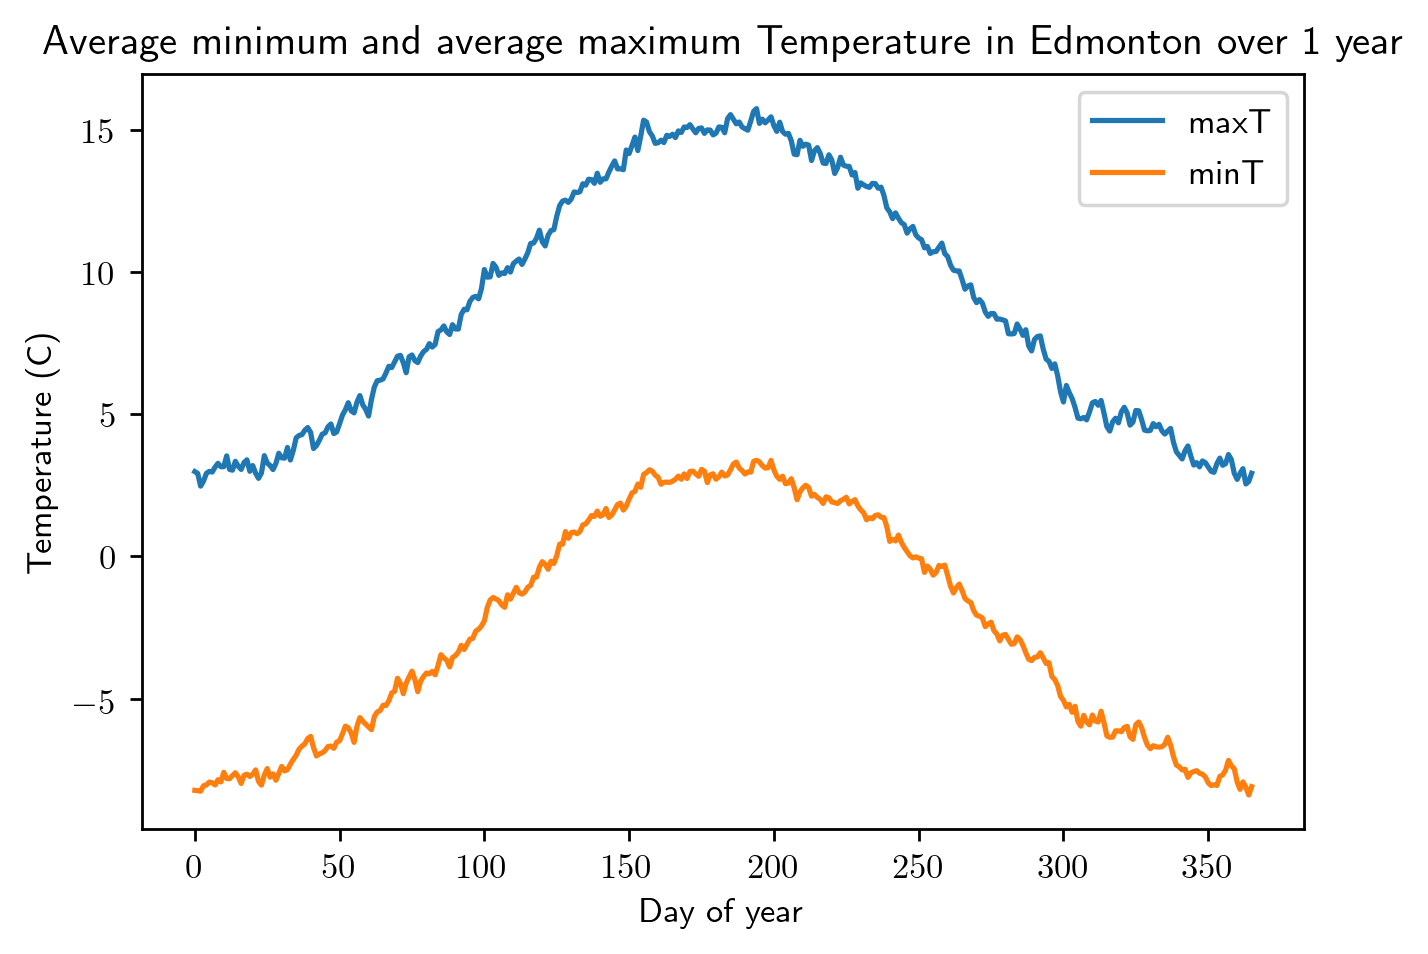

In [151]:
# Solutions to question 5 continued.

minT_all_stations = np.zeros(366) #initalize arrays
maxT_all_stations = np.zeros(366)

for day in range(0, 366):
    today_minT = [] #grab all minT for a single day.
    today_maxT = [] #grab all maxT for a single day.

    for stations in s: #Loop over all stations, and all days 
        for index, doy in enumerate(stations.doy): 
            if ((index-9)%366) == day:
                today_minT.append(stations.minT[index])
                today_maxT.append(stations.maxT[index])
    #print(day)
    minT_all_stations[day] = np.mean(np.array(today_minT)) #compute the mean for a single day and save the variables
    maxT_all_stations[day] = np.mean(np.array(today_maxT))
    
#Plot the average minimum and average maximum Temperature in Edmonton over 1 year, averaged over all stations
plt.title('Average minimum and average maximum Temperature in Edmonton over 1 year')

plt.plot(range(0, 366), maxT_all_stations, label='maxT')
plt.plot(range(0, 366), minT_all_stations, label='minT')
plt.xlabel('Day of year')
plt.ylabel('Temperature (C)')
plt.legend()

## No-atmosphere model of heating and cooling

The atmosphere plays a critical role in weather and climate, but modelling it is difficult.  Anyone who has watched the weather forecast sees weather systems move into and out of regions and winds/fronts/ high and low pressure regions- all atmospheric phenomena.  However, we are going to see whether we can fit the data with a "no-atmosphere" model.  If there were no atmosphere, the the only source of heat would be solar radiation, and the only cooling would be from black body radiation.  We incorporate this as an ordinary differential equation.  

\begin{equation} \frac {dT}{dt}=\alpha F(t) - \beta T^4 \end{equation}

Here $T$ is the (absolute!)temperature since $T^4$ is the Stefan-Boltzman law, $t$ the time, $F$ the solar flux (in Watts/m$^2$) and $\alpha$ and $\beta$ are the parameters of the model that we will allow to fit.  If we were to calculate from first principles, $\alpha$ would include the reflectivity of the surface and the clouds , as well as the heat capacity per square meter of the layer of the earth/atmosphere that heat up and cool down.  Similarly, $\beta$ includes the Stefan-Boltzman constant, the emissivity of the earth, and the heat capacity.  So this model is quite simple.

However, it is still interesting to see how well such a simple average model can work.  Since everything in the model is independent of time (except for the orbit) our model does not allow any differences year to year or any difference between locations at the same latitude.  

To start the problem, I have modified the earth-sun solution from Problem Set 2 to include the rotation of the earth, which is important to calculate the solar flux at Edmonton.    This involves adding the vector from the center of the earth to Edmonton, $\vec{x_{Ed}}$ and solving the differential equation 
\begin{equation} \frac{d\vec{x_{Ed}}}{dt}=\vec{\omega} \times \vec{x_{Ed}}\end{equation} where $\vec{\omega}$ in the constant rotation vector of the earth.  

We start by finding the "north pole vector", which we know is aligned with the earth-sun vector on June 21 and December 21st.  If we look at the Horizon web page for Dec 22, we see that X~0, Y=1 at the solstice, and that the axial tilt (obliquity) is 23.4392911 degrees.  Thus $$\hat{n}=(0,\sin(23.4392911),\cos(23.4392911))\approx(0,0.398,0.918)$$ and $$\vec{\omega}=\frac{2\pi\hat{n}}{24\times 3600 \times 365.2425/366.2425}$$
(Notice here the factor 365.2425/366.2425- which converts from normal days to "sidereal days"; which take into account the fact that the earths revolution around the sun means noon-noon is a little longer than one rotation).

We pick $\vec{x_{Ed}}=\cos(53.55)(1,0,0)+\sin(53.55)\hat{n}$ at the solstice. (Only the latitude matters- in principle we need to set longitude as well, but in our model the longitude doesn't really matter).


We run the code below to generate the inputs to the flux calcuation- the sun-earth vector and the Edmonton vector.  We pick t to cover the year, with say 48 bins per day.

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import datetime as dt
import time

GM=132712440041.93938e9 #m^3/s^2
GMEarth=398600.435436e9 #m^3/s^2
MEarth=5.97219e24 #kg
MSun=GM/GMEarth*MEarth  #  this keeps the mass ratio right, with most precise GM values!
AU=149597870700.0 #m (exactly)
D=24*3600.0 #s

#  Factors from Horizon web site at 2458839.916666667 = A.D. 2019-Dec-22 10:00:00.0000 TDB 
#  This is picked to be at the hour closest to the solstice- notice that the x position of earth is very small
x0=np.array([4.858434307587728E-04 *AU, 9.836920738092132E-01 *AU, -4.745398623388847E-05 *AU])
v0=np.array([-1.749013293502635E-02 *AU/D,-5.128449611745279E-05 *AU/D,  4.120640971206839E-07 *AU/D])
tilt=23.4392911/180*np.pi
n=np.array([0, np.sin(tilt),np.cos(tilt)])  # vector of earth's axis
omega=2*np.pi/(D*365.2425/366.2425)*n  #rotation axis
latitude=53.55/180*np.pi  # latitude of the "Edmonton" weather station
radius=6.37e6  #Earth's radius=6370 km from Horizons
x_ed0=radius*(np.array([np.cos(latitude),0,0])+np.sin(latitude)*n)  #Edmonton location at solstice (at least for some year!)
factor=(MSun+MEarth)/MSun  # to convert xe to earth-sun distance
xsun=np.array([0,0,0]) 

solarConstant=1367.6 #W/m**2 from Horizons.  At 1 AU

cm=MEarth*x0/(MEarth+MSun)
x=x0-cm #  x is distance wrt to the cm

vcm=MEarth*v0/(MEarth+MSun)  #velocity of CM
v=v0-vcm


def dvdt(xvArgument,t):
    xv=xvArgument.reshape(3,3)
    xearth_sun=factor*xv[0] #position wrt sun
    distance=np.sqrt(np.dot(xearth_sun,xearth_sun))
    v_ed=np.cross(omega,xv[2])  # velocity of Edmonton is omega x x_ed
    return np.array([xv[1],-GM/distance**3*xearth_sun,v_ed]).reshape(9)

spy=365.2425*24*3600
t=np.linspace(0,380*24*3600,380*48)  # 48 bins per day, starting December 22.  Go 380 days to cover whole next year
y0=np.array([x,v,x_ed0]).reshape(9)

run=False
if run:
    cpuT0=time.process_time()
    ephemeris = odeint(dvdt, y0, t,rtol=1e-12)
    print("CPU Time=",time.process_time()-cpuT0)
    np.save('problem3',ephemeris)
else:
    ephemeris=np.load('problem3.npy')



Write a function to calculate the Flux at any instant of time, from the output of this calculation.  To do this you will need to interpolate ephemeris (since it is only returned at discrete times).  

Ephemeris contains three vectors- the position of the earth wrt to CM, the velocity of the earth wrt CM, and the position of Edmonton with respect to the center of the earth.  

Once we have the three vectors, the flux is
\begin{equation} F(t)=\begin{cases}\phi_0 \frac{\vec{x_{Ed}} \cdot (\vec {x_s}-\vec{x_e})}{|\vec{x_{Ed}}| |\vec {x_s}-\vec{x_e}|} & \text{if } \vec{x_{Ed}} \cdot (\vec {x_s}-\vec{x_e})>0\\0 & \text{if } \vec{x_{Ed}} \cdot (\vec {x_s}-\vec{x_e})<0
\end{cases} \end{equation}

Plot your function versus date (for one year)



Text(0.5, 1.0, 'Solar flux in Edmonton for 1 year')

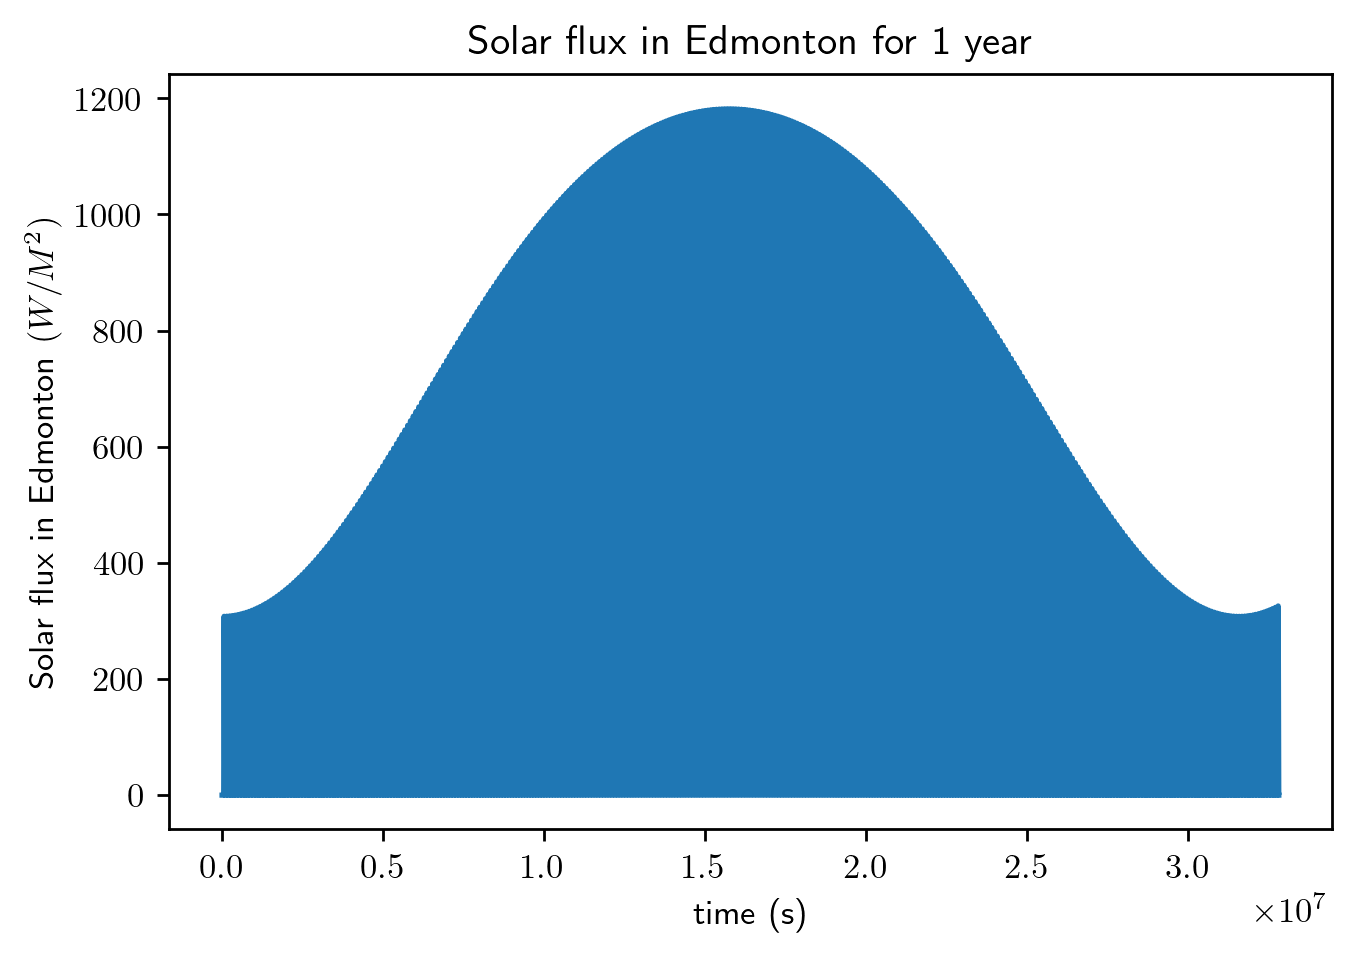

In [164]:
# Original plot

t = np.linspace(0,380*24*3600,380*48) 

# Flux function as defined above.
def flux(pos_earth_sun, pos_edmonton):    
    if np.dot(pos_earth_sun, pos_edmonton) > 0:
        return solarConstant*(np.dot(pos_earth_sun, pos_edmonton))/(np.linalg.norm(pos_earth_sun)*np.linalg.norm(pos_edmonton))
    else:
        return 0

#compute the flux for the discrete values of t.
flux_vals = []
for i,time in enumerate(t):
    pos_earth_sun = -ephemeris[i, 0:3] #Grab the position of the earth and sun. The negative sign is there to make sure in december, the temperature is minimum
    pos_edmonton = ephemeris[i, 6:9] #grab the position of edmonton
    flux_vals.append(flux(pos_earth_sun, pos_edmonton)) #compute the flux and save it.

#Plot the discretized flux
plt.plot(t, np.array(flux_vals))
plt.xlabel('time (s)')
plt.ylabel('Solar flux in Edmonton $(W/M^2)$')
plt.title('Solar flux in Edmonton for 1 year')

Text(0.5, 1.0, 'Interpolated solar flux in Edmonton for 1 year')

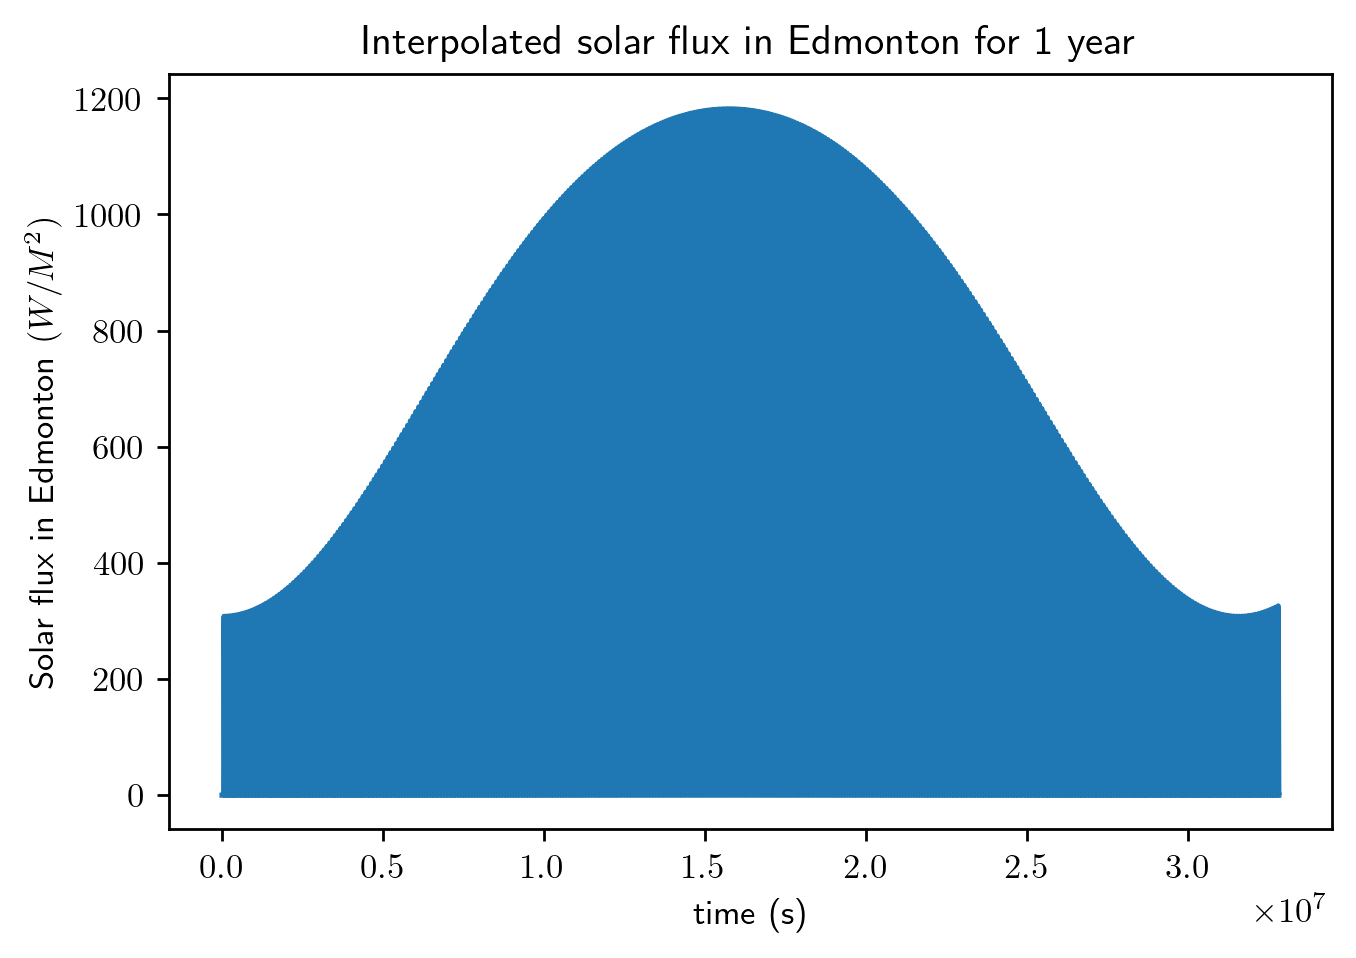

In [154]:
# Interpolated 

from scipy.interpolate import CubicSpline

t=np.linspace(0,380*24*3600,380*48)

#Interpolate using a cubic spline
flux_spline = CubicSpline(t, flux_vals)

#Plot the intepolated flux
plt.plot(t, flux_spline(t))
plt.xlabel('time (s)')
plt.ylabel('Solar flux in Edmonton $(W/M^2)$')
plt.title('Interpolated solar flux in Edmonton for 1 year')

Text(0.5, 1.0, 'Interpolated solar flux in Edmonton for a day in June 2019')

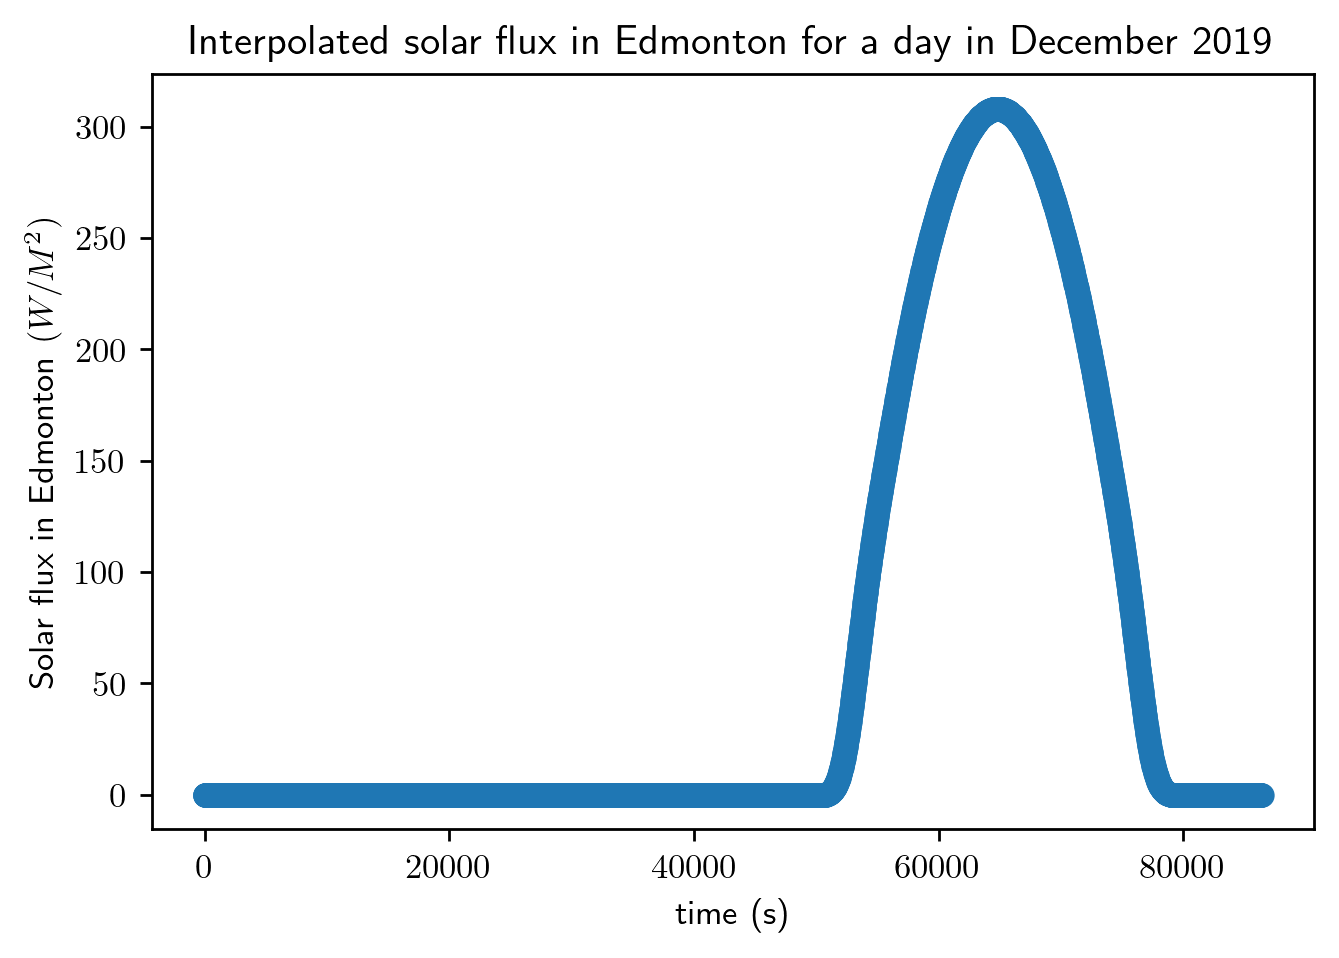

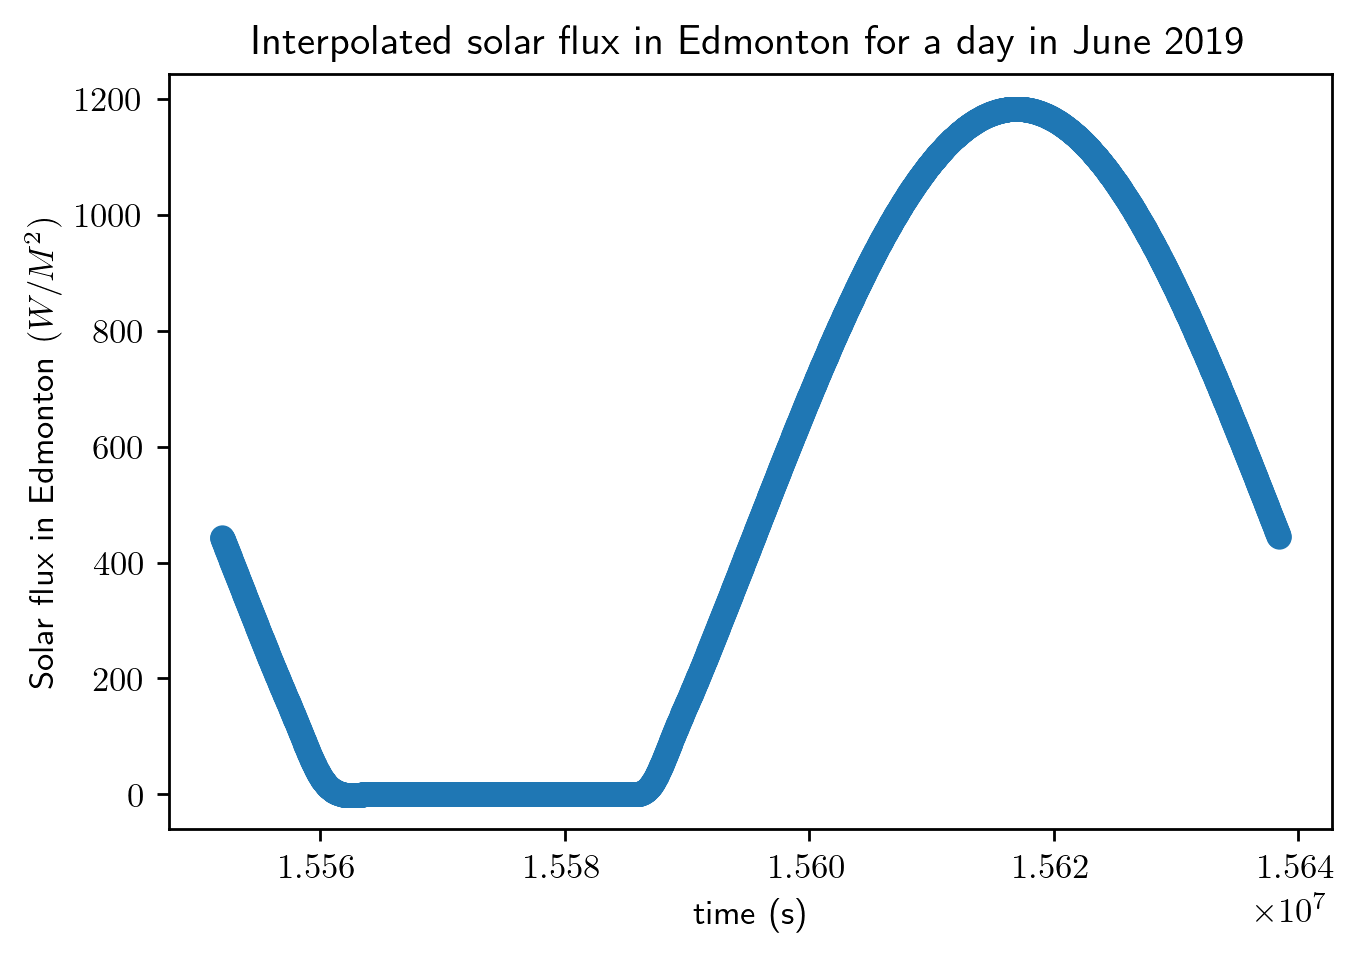

In [162]:
# Test out the interpolation by checking two days. One in decemeber and one in june.

plt.figure()

t_day = np.linspace(0, 24*3600, 24*200)

plt.scatter(t_day, flux_spline(t_day))
plt.xlabel('time (s)')
plt.ylabel('Solar flux in Edmonton $(W/M^2)$')
plt.title('Interpolated solar flux in Edmonton for a day in December 2019')

t_day = np.linspace(180*24*3600, 180*24*3600+24*3600, 24*200)

plt.figure()
plt.scatter(t_day, flux_spline(t_day))
plt.xlabel('time (s)')
plt.ylabel('Solar flux in Edmonton $(W/M^2)$')
plt.title('Interpolated solar flux in Edmonton for a day in June 2019')

Now write a model that integrates the ordinary differential equation:

\begin{equation} \frac {dT}{dt}=\alpha F(t) - \beta T^4 \end{equation}

using F(t) from the calculation of ephemeris.  

You will need to experiment to find values of $\alpha$ and $\beta$ that are semi-reasonable.  

Find the maximum and minimum temperature for each day from this model, and calculate the difference between this model and the data.

Fit the model to the data.  Plot the residuals.  Comment on the reasonableness of the fit.



loss is 4308989.4189754985


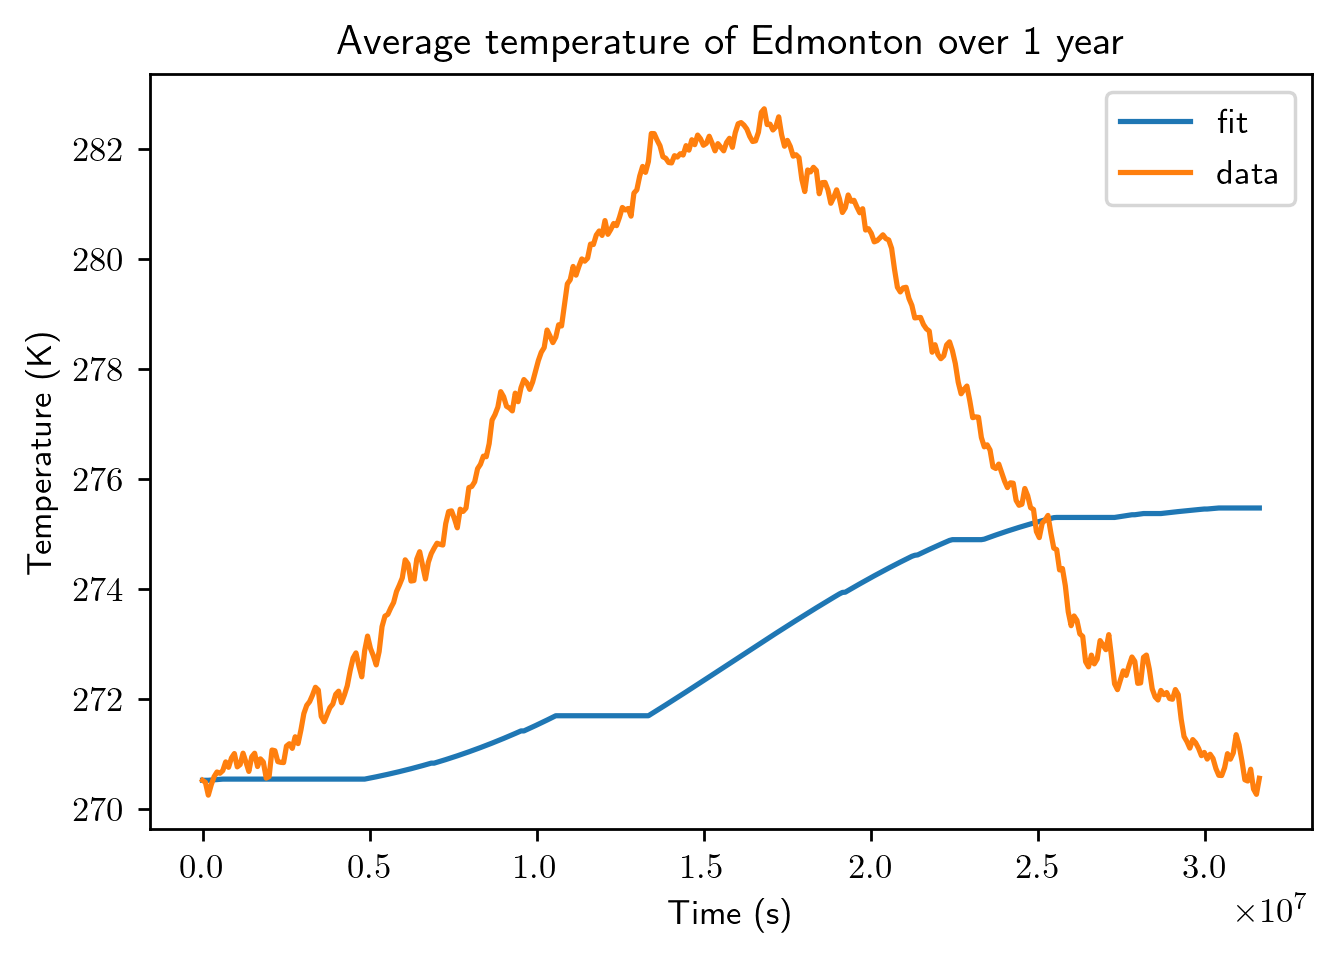

In [161]:
# Plot the graph for some alpha/beta

from tqdm import tqdm_notebook as tqdm

t=np.linspace(0,366*24*3600,366) #Change the number of points to 366 to better fit the data. 
averageT_Kelvin = (maxT_all_stations + minT_all_stations)/2 +273.15 #Compute the average Temperature for the data, in Kelvin
T0 = averageT_Kelvin[0] #First point of data

alpha, beta = np.array([7.99731445e-10, 5.42450055e-24]) #Fitted parameters

#Ode to integrate
def dTdt(T,t):    
    return alpha*flux_spline(t) - beta*T**4

T = odeint(dTdt, T0, t) #Solve ode
print(f'loss is {np.linalg.norm(T - averageT_Kelvin)**2}')

plt.title('Average temperature of Edmonton over 1 year')
plt.plot(t, T, label='fit')
plt.plot(t, averageT_Kelvin, label='data')
plt.ylabel('Temperature (K)')
plt.xlabel('Time (s)')
plt.legend()

In [65]:
# Guess and Check

t = np.linspace(0,366*24*3600,366) #Change T to 366 days to match array shapes.
good_alpha = []
previous_loss = np.infty

for alpha in tqdm(np.logspace(-20, 3, num=50)):
    for beta in tqdm(np.logspace(-10, -6, num=50)):
        
        T = odeint(dTdt, T0, t) #Integrate T for some alpha beta
        loss = np.linalg.norm(T - averageT_Kelvin)**2 #Compute the least squares between data
        
        if loss < previous_loss: #If a better fit is found, keep it
            previous_loss = loss
            good_alpha.append((alpha, beta, loss))
            print('New minimum', (alpha, beta, loss))



New minimum (1e-20, 1e-10, 9694378866.128548)



New minimum (2.94705170255181e-20, 1e-10, 9694378866.126059)



New minimum (8.68511373751352e-20, 1e-10, 9694378866.118908)



New minimum (2.559547922699533e-19, 1e-10, 9694378866.097692)



New minimum (7.543120063354607e-19, 1e-10, 9694378866.051008)



New minimum (2.222996482526191e-18, 1e-10, 9694378865.93054)



New minimum (6.551285568595496e-18, 1e-10, 9694378852.4545)



New minimum (1.9306977288832457e-17, 1e-10, 9694378850.353115)



New minimum (1.67683293681101e-16, 1e-10, 9694378818.069729)



New minimum (4.941713361323839e-16, 1e-10, 9694378757.079327)



New minimum 


KeyboardInterrupt: 

Text(0.5, 0, 'Time (s)')

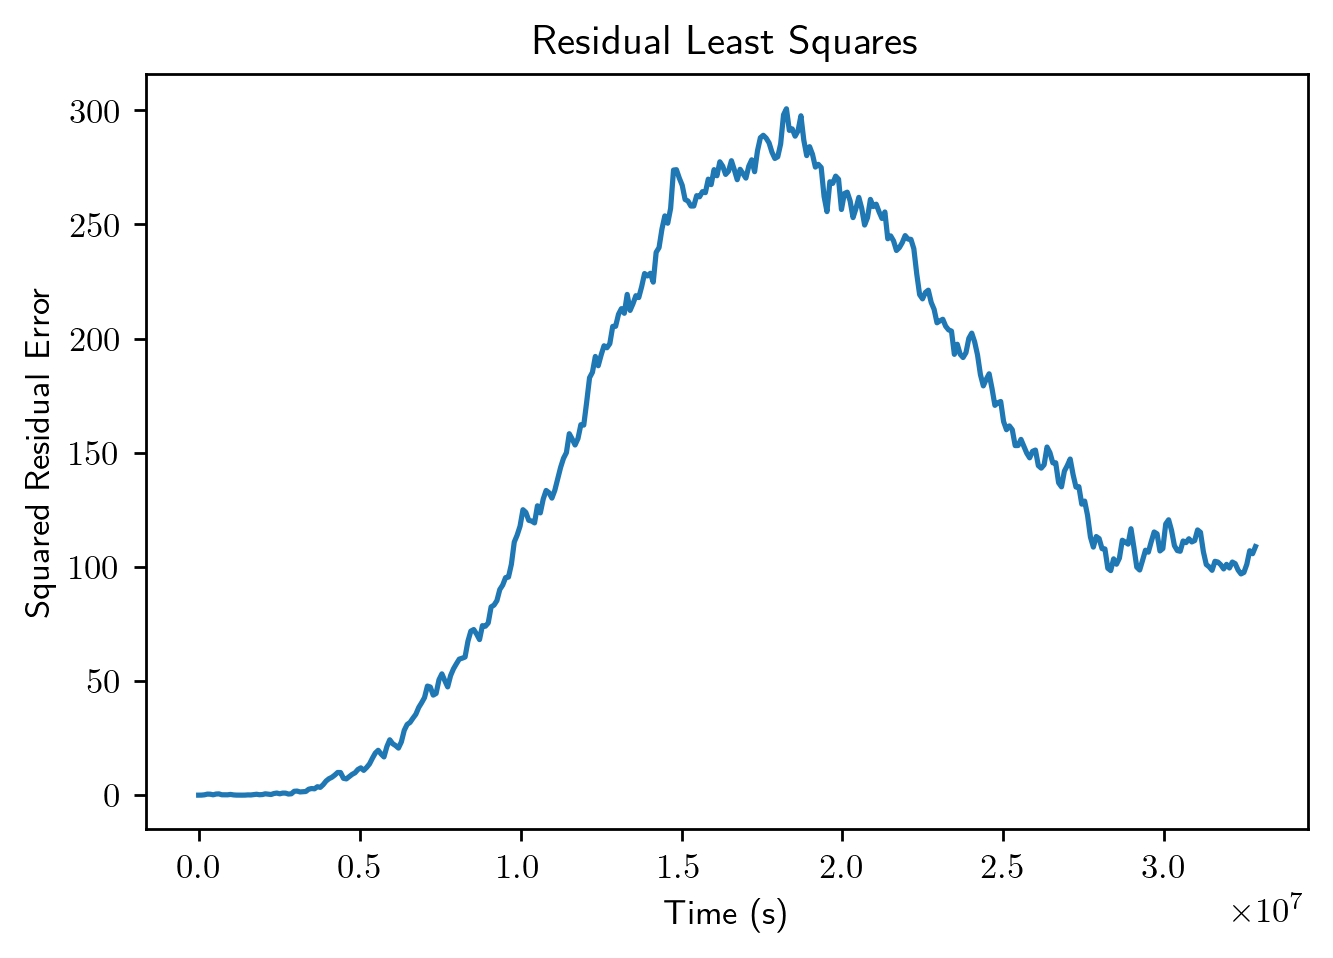

In [136]:
# Residuals

plt.plot(t, (T.reshape(366) - averageT_Kelvin)**2)
plt.title('Residual Least Squares')
plt.ylabel('Squared Residual Error')
plt.xlabel('Time (s)')

In [67]:
from scipy.optimize import minimize

def loss(args):
    alpha, beta = args
    
    t = np.linspace(0,380*24*3600,366)
    def dTdt(T,t):    
        return alpha*flux_spline(t) - beta*T**4
    T = odeint(dTdt, T0, t)
    cost = np.linalg.norm(T - averageT_Kelvin)**2
    print(cost)
    return cost

x0 = np.array([8e-10, 5.428675439323859e-24])
minimize(loss, x0, method='Nelder-Mead',options={'disp': True, 'maxiter':100000, 'adaptive': True})

3915173.0436459244
4610533.70033073
4066011.6058471785
4025520.655514295
3943718.993046939
3994728.108268532
3956878.1908710008
4057536.5526608
4020101.7706924
4038171.654176491
4001301.508229073
4108673.050600845
4037128.9874676177
5424176.756679089
4350802.551641721
4070134.392771753
4058140.337274254
4001317.909351818
4399394.292037744
4072460.266318176
4187402.4208501605
4085205.0978901116
5130151.649724821
6334909.021744226
4002868.583959893
4584451.1513823
3996537.847401375
4110675.5063383626
4004884.0198988225
3901055.497449921
4073917.842962602
4125638.4801248806
4172372.451698942
4049165.4306607153
3957157.6895442456
3975652.5466892803
4146432.233663747
4003676.582118679
4002726.5504207504
4024077.5880551725
4052552.2484895107
3970305.6652956894
4046321.1731409263
4105399.6110350867
4252766.612652939
3897348.024038012
4005657.9117940958
3858981.1719299774
3954106.3031205125
4145041.889120504
3946656.421143579
4157353.973855251
3954583.6072154026
4062509.7259577103
3918600.7755

 final_simplex: (array([[7.99731445e-10, 5.42450055e-24],
       [7.99731445e-10, 5.42450055e-24],
       [7.99731445e-10, 5.42450055e-24]]), array([3858981.17192998, 3858981.17192998, 3858981.17192998]))
           fun: 3858981.1719299774
       message: 'Optimization terminated successfully.'
          nfev: 249
           nit: 96
        status: 0
       success: True
             x: array([7.99731445e-10, 5.42450055e-24])

## Comments on the reasonableness of the fit.

Based on my analysis the model is not a good model. I brute forced searched through alpha and beta in logspace(-30, 6) and it seems that the minimum parameters are visually not a good fit. The model fails to predict the peak and troughs in the temperature. 

Furthermore, the loss function is very numerically unstable. This might be better improved by using a different loss function, but least squares is so standardized that it seems unlikely. The model could be improved by adding more complexity, however, I don't have the computing power to search through four parameters.

If we really cared more about getting the correct fit over testing the model, then we could opt for a machine learning solution: fit an n-th order polynormial, or fit a sinusoid.

(Optional) If you would like to experiment some more, we can add some elements to the model and see how the fit improves.  One can add 
feedback("clouds?") by making $\alpha$ and $\beta$ functions (first or second order polynomials) of T. You could also change $T^4$ to $(T-\Delta)^4$- basically saying the cooling infrared radiation doesn't come from the ground, but from higher in the atmosphere where the temperatures are colder.



In [77]:
def loss_2(args):
    alpha1, alpha2, beta1, beta2 ,delta = args
    
    
    alphafunc = lambda T: alpha1 + alpha2*T
    betafunc = lambda T: beta1 + beta2*T
    
    
    t = np.linspace(0,380*24*3600,366)
    def dTdt(T,t):    
        return alphafunc(T)*flux_spline(t) - betafunc(T - delta)*T**4
    T = odeint(dTdt, T0, t)
    cost = np.linalg.norm(T - averageT_Kelvin)**2
    print(cost)
    return cost

In [78]:
x0 = [8e-10, 0, 5.428675439323859e-24, 0, 0]


minimize(loss_2, x0, method='Nelder-Mead',options={'disp': True, 'maxiter':100000, 'adaptive': True})

# Seem like theres no improvement over current

3915173.0436459244
4610533.70033073
1.1580352473277165e+17
4066011.6058471785
1068376159234570.9
1068376159234956.6
1068376159234570.9
1068376159234956.6
4.8196903114497786e+19
4010054.887407917
6715129.783238566
1068376159234956.6
4.8196903114497786e+19
4.8196903114497786e+19
4.8196903114497786e+19
3962864.296205465
3972761.733191508
4.8196903114497786e+19
3.9558785698443757e+17
4.819690808034029e+19
4.8196903114497786e+19
4036243.2101712218
4031012.75150725
4.8196903114497786e+19
4.8196903114497786e+19
4.819690808034029e+19
4.8196903114497786e+19
4262798.886155238
4147817.857584198
4.8196903114497786e+19
4.8196903114497786e+19
4.819690808034029e+19
1068376159234656.8
4.819690808034029e+19
4.8196903114497786e+19
3851117.474794267
3989155.592954383
4.8196903114497786e+19
4.8196903114497786e+19
4.819690808034027e+19
4.8196903114497786e+19
4142531.531922234
4045880.1256087995
4.8196903114497786e+19
4.8196903114497786e+19
4.819690808034029e+19
3.9558785698443757e+17
3.955928228269374e+17


4.5402620350118765e+19
471430218.394418
3.95207945111744e+17
392293314.87877434
4.024118814299136e+19
321222235.3504493
3.950312985377102e+17
262798306.3059187
2.6649480651187786e+19
211369801.08138192
1.1583418183772914e+19
172965608.1824946
1050741668.1583587
134412399.20482123
378028026.0881385
105740788.14149232
210648652.68756604
83319832.57763694
118066276.98285621
69371585.8584425
64232310.86158017
773139091.8182038
28394366.237842597
62497125.42476164
36492779.92191312
18260869.78603797
82263849.39887355
14568907.090117266
27008681.351442285
6570317.400645748
20742676.846754026
7524540.746984163
10387400.320410082
5803475.444854329
12668047.0466986
4388094.2734693885
4861322.442249791
4027128.427901066
5005569.062857926
3958630.161087091
5206406.568932369
3851235.0180540327
3927446.921975839
4019101.4807408345
3881296.956220022
3878266.8141704616
6603892.785240095
3830920.198648265
3796239.0258999565
3816274.7638032422
3807306.7631732277
3827236.1702642147
4307281.819142058
431

3969598.51343781
3810802.5148754125
3945121.8768226895
3815051.2316140584
3902603.215948956
3846280.6567592714
3892686.1763298195
4075686.333883887
4135584.24012636
3810519.9330121884
3839953.3742309324
3856407.2754015913
3874361.067377601
3894192.7874687114
3968289.6133003854
3833965.6102899513
3819386.924894925
3804348.847733871
3958245.3387434995
3846828.3191866353
3813318.5933409994
3856276.2731993967
3817296.22708561
3824847.99756932
3848604.7635113336
3800701.276146654
3780452.542914259
3745127.92250079
3744879.093835613
3884256.1128565776
3790442.497655797
3765793.221918113
3787226.8591064103
3832588.3061414943
3911454.527550427
3835699.053037939
3883734.9387439145
3876523.832638993
3787898.6977427555
3912091.1351513905
3844471.392990953
3808135.625749795
3936454.0286581484
3776897.9042465226
3827353.13321555
3935192.1973847807
3786877.222954292
3804980.0635070056
4077449.7854242767
3829123.0306114084
3896311.3885750747
3887801.947096917
3846167.6349394345
3767098.2583582313
380

3831133.4264006587
3854751.7960207863
3816743.561171129
3843566.5680846577
3850924.2947757677
3757907.9822833524
3784435.89699479
3792097.9305842156
4016409.8249772703
3836697.9394537928
3792097.9305842156
3794262.8646312784
3775672.484516561
3794262.8646312784
3775672.484516561
4264532.928503175
3929014.615152711
4264532.928503175
3816743.561171129
3816743.561171129
3794262.8646312784
3774432.54989977
3774432.54989977
3785472.774408694
3747754.4387897244
3893984.775108457
3807067.15786926
3787547.872377836
3774883.850899255
3774883.850899255
3851047.481446079
3838169.396508247
3893984.775108457
3893984.775108457
3893984.775108457
3814115.3968732427
3848274.5469732913
3848274.5469732913
3851047.481446079
3848274.5469732913
3774432.54989977
3774432.54989977
3893984.775108457
3800523.9953689184
4016409.8249772703
3848274.5469732913
3774883.850899255
3774883.850899255
3774432.54989977
3848274.5469732913
3854751.7960207863
3800523.9953689184
3886070.4592630044
3774432.54989977
3774883.8508

3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.39

3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3838169.396508247
3832360.957161978
3838169.39

KeyboardInterrupt: 